# 0. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from prince import MCA
from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import xgboost as xgb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

from prince import MCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from statsmodels.stats.multitest import multipletests

from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from skmultilearn.adapt import MLkNN




# 1. Load, Transform, Prepare and explore the data
'productiveTime_Proposed_sport', 'productiveTime_Proposed_attitude, 'hobbies_mobilePhone', 'hobbies_Proposed_sport', 'alienPerson_Proposed_environment', 'vices_Proposed_leavingHome'

Group ['vices_Proposed_chocolate', 'vices_Proposed_sweet', 'vices_Proposed_eat']

In [2]:
# Load data
encuesta=pd.read_csv('encuesta_felicidad.csv')
# Change column names
columns = ['temporalMark','sex','age','size','weight','actualStatus','homeCompany','aboutYou','interestedApp','secondPart','topics','productiveTime','social','hobbies','sport','sleep','food','alienPerson','vices','whatExpect','otherTopics']
encuesta.columns = columns
# Drop some columns
encuesta.drop(['temporalMark','interestedApp','secondPart', 'whatExpect', 'otherTopics'], axis=1, inplace=True)
# Remove na
encuesta = encuesta.dropna()
print(encuesta.shape)
encuesta.head()

(153, 16)


sex    age           size      weight actualStatus homeCompany   
1   Mujer  46-65            169          65      Trabajo  En familia  \
2   Mujer  46-65  1,61 - 1,70 m  61 - 70 kg      Trabajo  En familia   
3   Mujer  18-25  1,61 - 1,70 m  61 - 70 kg      Estudio  Con amigos   
4  Hombre  46-65  1,71 - 1,80 m     > 80 kg      Trabajo  En familia   
5  Hombre  18-25  1,71 - 1,80 m   51 - 60kg      Estudio  Con amigos   

                                            aboutYou   
1  Tengo o dispongo de vehículo de transporte, Fu...  \
2  Tengo o dispongo de vehículo de transporte, Fu...   
3  Suelo pensar en mi felicidad, valorarla y pens...   
4  Tengo o dispongo de vehículo de transporte, Ac...   
5  Tengo o dispongo de vehículo de transporte, Su...   

                                              topics   
1  Horas productivas (estudio, trabajo, tareas......  \
2  Horas productivas (estudio, trabajo, tareas......   
3  Horas productivas (estudio, trabajo, tareas......   
4  Horas productivas (estudio, trabajo, tareas......   
5  Horas productivas (estudio, trabajo, tareas......   

                                      productiveTime   
1  El trabajo (tipo de trabajo, horas dedicadas, ...  \
2  El trabajo (tipo de trabajo, horas dedicadas, ...   
3  El trabajo (tipo de trabajo, horas dedicadas, ...   
4  El trabajo (tipo de trabajo, horas dedicadas, ...   
5  El trabajo (tipo de trabajo, horas dedicadas, ...   

                                              social   
1  Familia, Amigos (qué amigos), Fiesta: discotec...  \
2  Familia, Amigos, Fiesta: discoteca, tomar algo...   
3  Familia, Amigos, Fiesta: discoteca, tomar algo...   
4                    Familia, Amigos, Redes sociales   
5                             Familia, Amigos, Citas   

                                             hobbies   
1  Culturales: cine, teatro, conciertos... (tiemp...  \
2  Relajamiento: meditar, tomar el sol, Yoga, no ...   
3  Contenido audiovisual: TV, streaming, videojue...   
4  Lectura, Relajamiento: meditar, tomar el sol, ...   
5  Contenido audiovisual: TV, streaming, videojue...   

                                               sport   
1  ¿has salido de casa? (si/no), Tipo de deporte,...  \
2  Salir de casa, moverse un poco, pasear, despla...   
3  Tipo de deporte (quizás un partido de pádel te...   
4  Tipo de deporte (quizás un partido de pádel te...   
5  Salir de casa, moverse un poco, pasear, despla...   

                                               sleep   
1  Calidad de sueño, Cantidad de sueño, Siesta (s...  \
2  Calidad de sueño, Cantidad de sueño, Hora en l...   
3  Calidad de sueño, Cantidad de sueño, Pantallas...   
4  Calidad de sueño, Cantidad de sueño, Pantallas...   
5  Calidad de sueño, Cantidad de sueño, Pantallas...   

                                                food   
1  Tipo de comidas de hoy (sana, rápida, casera, ...  \
2  Tipo de comidas de hoy (sana, rápida, casera, ...   
3  Tipo de comidas de hoy (sana, rápida, casera, ...   
4  Tipo de comidas de hoy (sana, rápida, casera, ...   
5  Tipo de comidas de hoy (sana, rápida, casera, ...   

                                         alienPerson   
1  Clima (soleado, lluvioso...), ¿Has recibido bu...  \
2  Clima (soleado, lluvioso...), Recibir buenas o...   
3  Día de la semana, Recibir buenas o malas noticias   
4  Clima (soleado, lluvioso...), Recibir buenas o...   
5  Clima (soleado, lluvioso...), Nivel de estrés ...   

                       vices  
1            Alcohol, Tabaco  
2               Tabaco, Café  
3                 Café, Sexo  
4              Alcohol, Café  
5  Sexo, Azúcar (chocalate)

## 1.1. Home company

In [3]:
# Change home company to binary
encuesta.loc[encuesta['homeCompany']=="Con amigos",'homeCompany_friends']=1
encuesta['homeCompany_friends']=encuesta['homeCompany_friends'].fillna(0).astype(int)
encuesta.loc[encuesta['homeCompany']=="Solo",'homeCompany_alone']=1
encuesta['homeCompany_alone']=encuesta['homeCompany_alone'].fillna(0).astype(int)
encuesta.loc[encuesta['homeCompany']=="Con mis padres",'homeCompany_parents']=1
encuesta['homeCompany_parents']=encuesta['homeCompany_parents'].fillna(0).astype(int)
encuesta.loc[encuesta['homeCompany']=="En pareja",'homeCompany_couple']=1
encuesta['homeCompany_couple']=encuesta['homeCompany_couple'].fillna(0).astype(int)
encuesta.loc[encuesta['homeCompany']=="En familia",'homeCompany_family']=1
encuesta['homeCompany_family']=encuesta['homeCompany_family'].fillna(0).astype(int)

# Drop homeCompany
encuesta.drop(['homeCompany'], axis=1, inplace=True)
# Move 'homeCompany_friends', 'homeCompany_alone', 'homeCompany_parents', 'homeCompany_couple', 'homeCompany_family' at the beginning
encuesta = encuesta[['homeCompany_friends', 'homeCompany_alone', 'homeCompany_parents', 'homeCompany_couple', 'homeCompany_family'] + [col for col in encuesta.columns if col not in ['homeCompany_friends', 'homeCompany_alone', 'homeCompany_parents', 'homeCompany_couple', 'homeCompany_family']]]
print(encuesta.shape)

(153, 20)


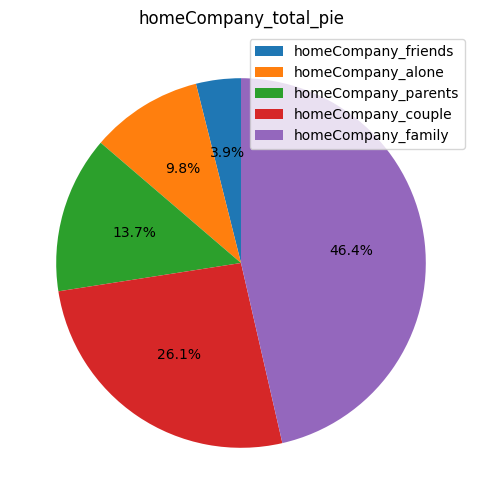

In [4]:
homeCompany=encuesta.filter(regex="^home")
homeCompany_total=homeCompany.T
homeCompany_total['total']=homeCompany_total.sum(axis=1)
homeCompany_total_pie=homeCompany_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='homeCompany_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.2. ActualStatus

In [5]:
# Change actualStatus to binari
encuesta.loc[encuesta['actualStatus']=="Vivo del cuento",'actualStatus_free']=1
encuesta['actualStatus_free']=encuesta['actualStatus_free'].fillna(0).astype(int)
encuesta.loc[encuesta['actualStatus']=="Estudio",'actualStatus_student']=1
encuesta['actualStatus_student']=encuesta['actualStatus_student'].fillna(0).astype(int)
encuesta.loc[encuesta['actualStatus']=="Trabajo",'actualStatus_work']=1
encuesta['actualStatus_work']=encuesta['actualStatus_work'].fillna(0).astype(int)

# Drop actualStatus
encuesta.drop(['actualStatus'], axis=1, inplace=True)
# Move 'actualStatus_free', 'actualStatus_student' y 'actualStatus_work' at the beginning
encuesta = encuesta[['actualStatus_free', 'actualStatus_student', 'actualStatus_work'] + [col for col in encuesta.columns if col not in ['actualStatus_free', 'actualStatus_student', 'actualStatus_work']]]
print(encuesta.shape)

(153, 22)


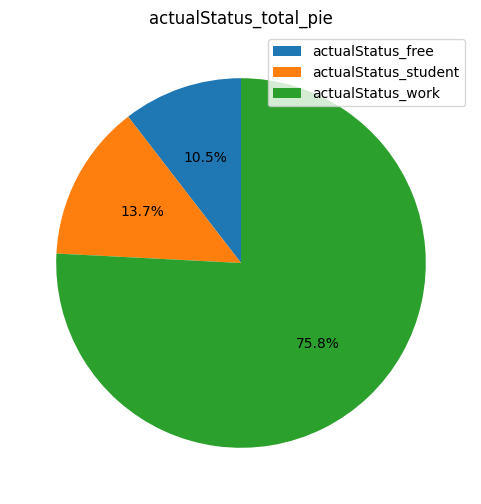

In [6]:
actualStatus=encuesta.filter(regex="^actual")
actualStatus_total=actualStatus.T
actualStatus_total['total']=actualStatus_total.sum(axis=1)
actualStatus_total_pie=actualStatus_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='actualStatus_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.3. Weight

In [7]:
# Change weight to numeric category
encuesta.loc[encuesta['weight']=='65','weight'] = '61 - 70 kg'
encuesta.loc[encuesta['weight']=="<40 kg",'weight']=1
encuesta.loc[encuesta['weight']=="40 - 50 kg",'weight']=2
encuesta.loc[encuesta['weight']=="51 - 60kg",'weight']=3
encuesta.loc[encuesta['weight']=="61 - 70 kg",'weight']=4
encuesta.loc[encuesta['weight']=="71 - 80 kg",'weight']=5
encuesta.loc[encuesta['weight']=="> 80 kg",'weight']=6

# Move 'weight' at the beginning
encuesta = encuesta[['weight'] + [col for col in encuesta.columns if col not in ['weight']]]
encuesta['weight']=encuesta['weight'].astype(int)
print(encuesta['weight'].value_counts())

weight
4    44
3    39
5    31
6    26
2    12
1     1
Name: count, dtype: int64


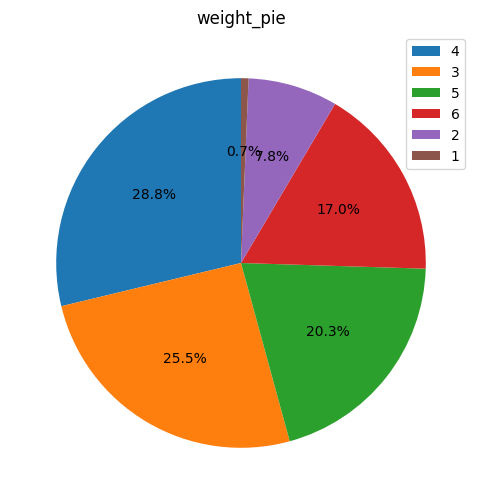

In [8]:
weight_pie=encuesta['weight'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='weight_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.4. Size

In [9]:
# Change size to numeric category
encuesta.loc[encuesta['size']=='169','size'] = '1,61 - 1,70 m'
encuesta.loc[encuesta['size']=="<1,5 m",'size']=1
encuesta.loc[encuesta['size']=="1,50 - 1,60 m",'size']=2
encuesta.loc[encuesta['size']=="1,61 - 1,70 m",'size']=3
encuesta.loc[encuesta['size']=="1,71 - 1,80 m",'size']=4
encuesta.loc[encuesta['size']=="1,81 - 1,90 m",'size']=5
encuesta.loc[encuesta['size']=="> 1,90 m",'size']=6

# Move 'size' at the beginning
encuesta = encuesta[['size'] + [col for col in encuesta.columns if col not in ['size']]]
encuesta['size']=encuesta['size'].astype(int)
print(encuesta['size'].value_counts())

size
3    64
4    36
2    30
5    21
1     1
6     1
Name: count, dtype: int64


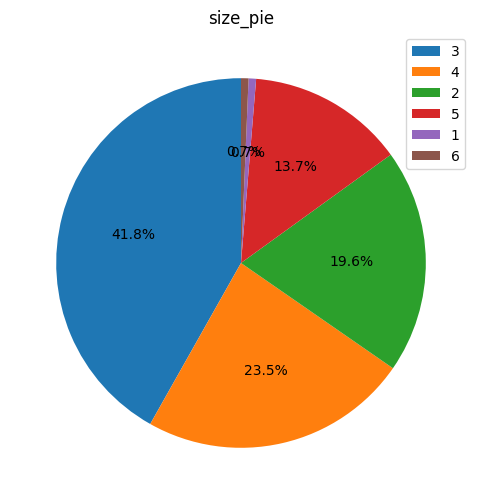

In [10]:
size_pie=encuesta['size'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='size_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.5. Age

In [11]:
# Change age to numeric
encuesta.loc[encuesta['age']=="<18",'age']=1
encuesta.loc[encuesta['age']=="18-25",'age']=2
encuesta.loc[encuesta['age']=="26-35",'age']=3
encuesta.loc[encuesta['age']=="36-45",'age']=4
encuesta.loc[encuesta['age']=="46-65",'age']=5
encuesta.loc[encuesta['age']==">65",'age']=6

# Move 'age' at the beginning
encuesta = encuesta[['age'] + [col for col in encuesta.columns if col not in ['age']]]
encuesta['age']=encuesta['age'].astype(int)
print(encuesta['age'].value_counts())

age
5    98
2    25
3    16
6     7
4     6
1     1
Name: count, dtype: int64


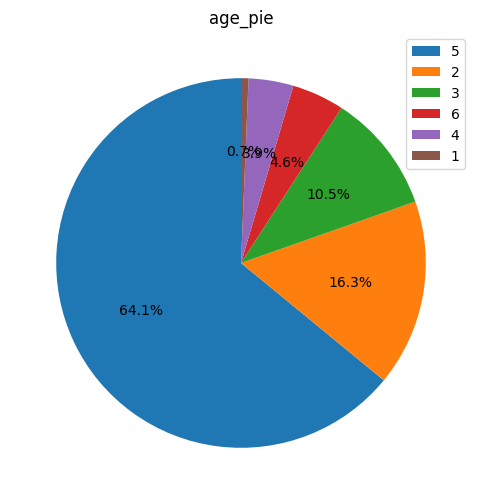

In [12]:
age_pie=encuesta['age'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='age_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.6. Sex

In [13]:
# Change sex to binary
encuesta.loc[encuesta['sex']=="Hombre",'sex_Man']=1
encuesta['sex_Man']=encuesta['sex_Man'].fillna(0).astype(int)
encuesta.loc[encuesta['sex']=="Mujer",'sex_Woman']=1
encuesta['sex_Woman']=encuesta['sex_Woman'].fillna(0).astype(int)
encuesta.loc[encuesta['sex']=="Otro",'sex_Other']=1
encuesta['sex_Other']=encuesta['sex_Other'].fillna(0).astype(int)

# Drop sex
encuesta.drop(['sex'], axis=1, inplace=True)
# Move 'sexMan', 'sexWoman' y 'sexOther' at the beginning
encuesta = encuesta[['sex_Man', 'sex_Woman', 'sex_Other'] + [col for col in encuesta.columns if col not in ['sex_Man', 'sex_Woman', 'sex_Other']]]
print(encuesta.shape)

(153, 24)


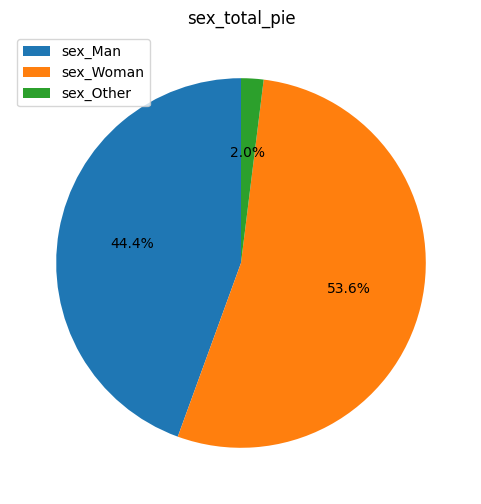

In [14]:
sex=encuesta.filter(regex="^sex")
sex_total=sex.T
sex_total['total']=sex_total.sum(axis=1)
sex_total_pie=sex_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='sex_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

## 1.7. AboutYou

In [15]:
# Change about_you to binary
encuesta.loc[encuesta['aboutYou'].str.contains('Tengo o dispongo de vehículo de transporte'),'aboutYou_car'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Fumo'),'aboutYou_smoke'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Me gusta salir de fiesta'),'aboutYou_party'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Sofá y manta'),'aboutYou_couch'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Activo en redes sociales'),'aboutYou_socialNet'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Suelo pensar en mi felicidad, valorarla y pensar en como mejorarla'),'aboutYou_thinkAboutHappiness'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('No estoy satisfecho si no he aprovechado el día'),'aboutYou_profitableDay'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Procuro comer sano'),'aboutYou_healthyFood'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Practico deporte'),'aboutYou_sport'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Muy Zen'),'aboutYou_yoga'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Duermo a pierna suelta'),'aboutYou_sleepWell'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Antes playa que montaña'),'aboutYou_mountain'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Me estreso fácilmente'),'aboutYou_stress'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Soy romántic@'),'aboutYou_romantic'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Espontáneo'),'aboutYou_spontaneous'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Antes dulce que salado'),'aboutYou_sweet'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Películas y series'),'aboutYou_audiovisual'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Videojuegos'),'aboutYou_videogames'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Lectura'),'aboutYou_read'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Dependo económicamente de alguien'),'aboutYou_dependent'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Soy mas de ciencias que de letras'),'aboutYou_sciences'] = 1
encuesta.loc[encuesta['aboutYou'].str.contains('Mascotas'),'aboutYou_pets'] = 1

# Drop about_you
encuesta.drop(['aboutYou'], axis=1, inplace=True)
# Fill na
about_you=encuesta.filter(regex='^aboutYou').fillna(0)
# Change about_you to int
about_you = about_you.astype(int)
# Add about_you to encuesta
encuesta[about_you.columns] = about_you
print(encuesta.shape)

(153, 45)


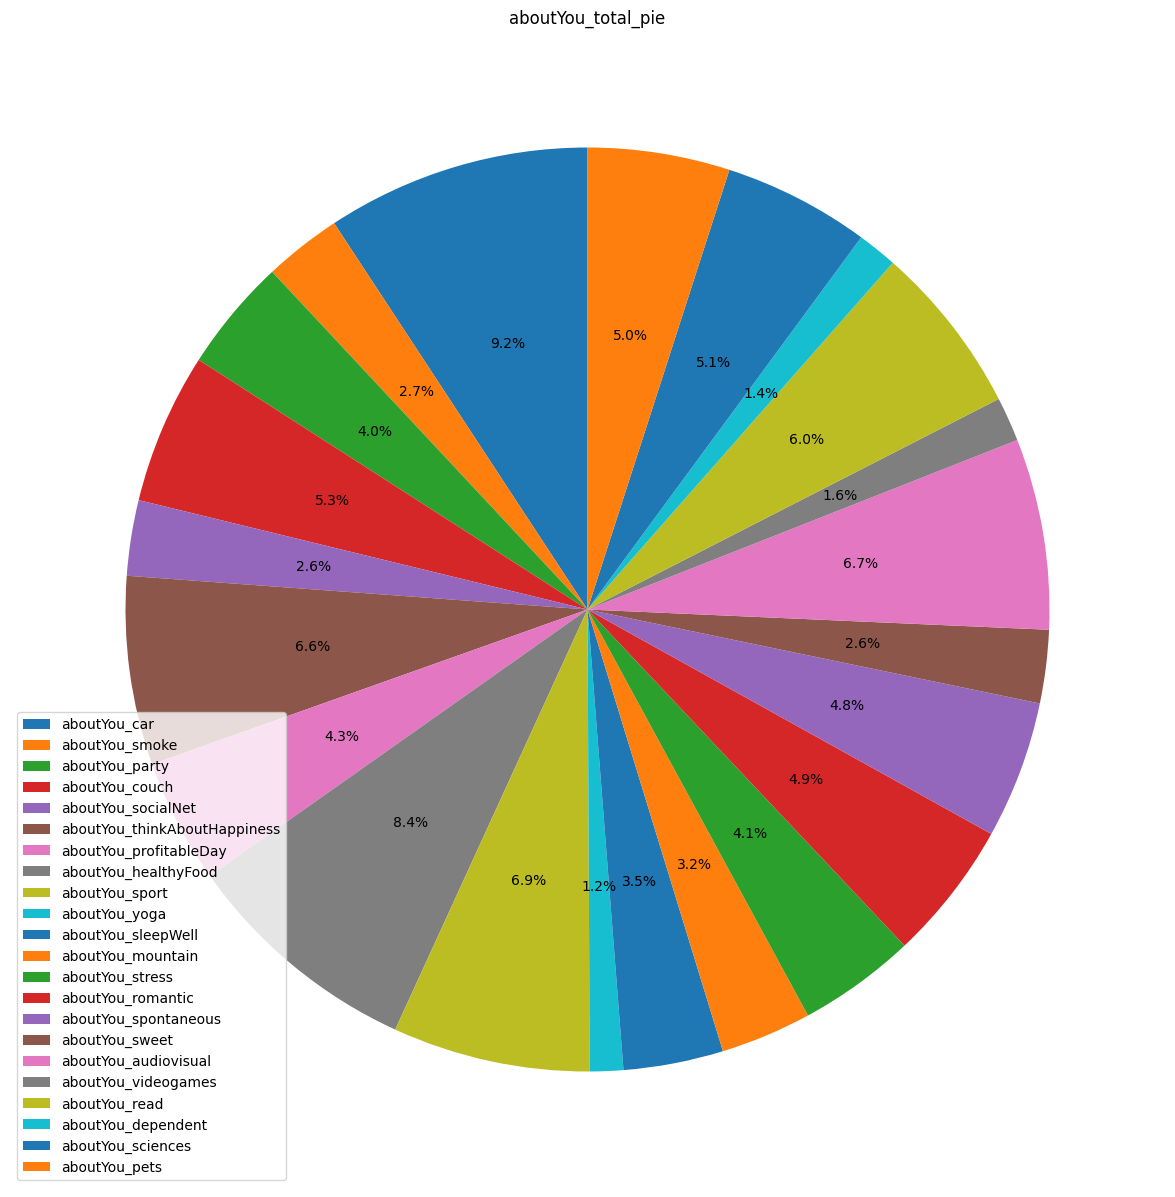

In [16]:
aboutYou=encuesta.filter(regex="^aboutYou")
aboutYou_total=aboutYou.T
aboutYou_total['total']=aboutYou_total.sum(axis=1)
aboutYou_total_pie=aboutYou_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='aboutYou_total_pie',figsize=(15, 15))
plt.ylabel('')
plt.show()

aboutYou_healthyFood  aboutYou_car                    0.276026
                      aboutYou_profitableDay          0.252236
aboutYou_sport        aboutYou_healthyFood            0.295928
aboutYou_romantic     aboutYou_couch                  0.267261
                      aboutYou_thinkAboutHappiness    0.267261
aboutYou_audiovisual  aboutYou_mountain               0.325827
aboutYou_videogames   aboutYou_smoke                  0.250416
aboutYou_dependent    aboutYou_socialNet              0.292770
                      aboutYou_videogames             0.279657
dtype: float64


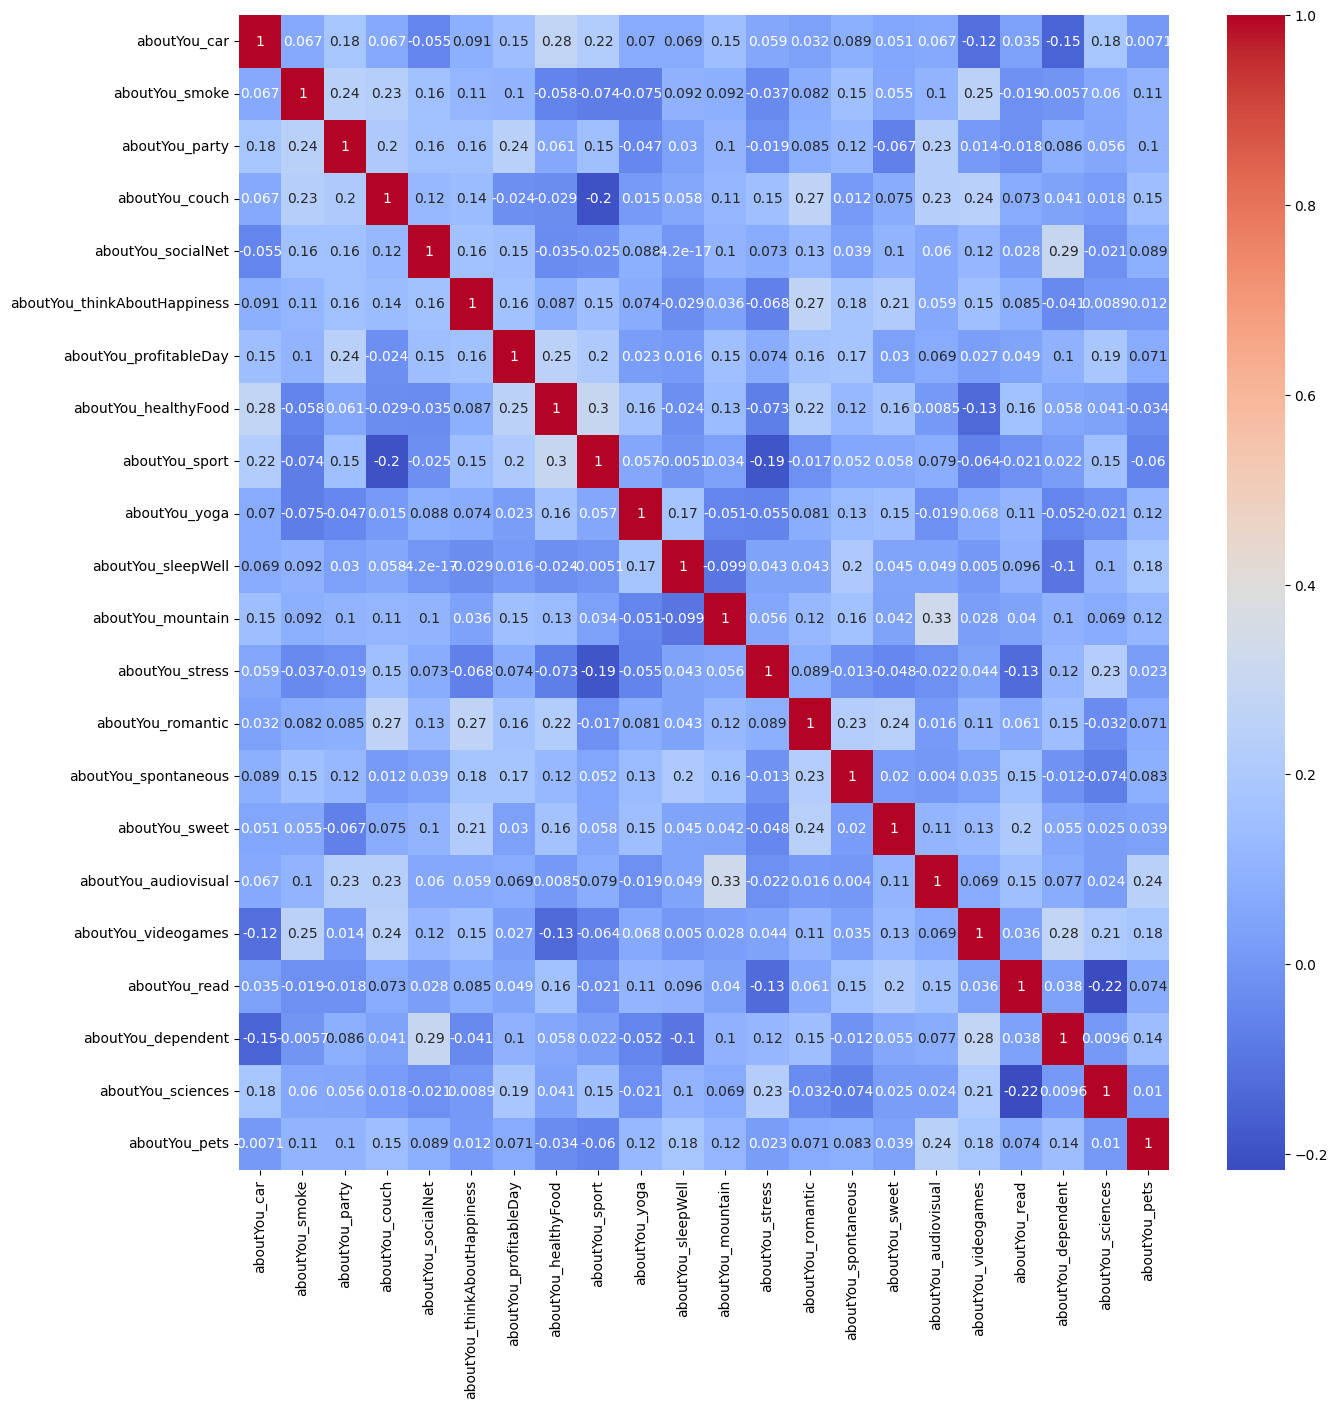

In [17]:
aboutYou_corr = aboutYou.corr()
aboutYou_corr.loc[:,:] = np.tril(aboutYou_corr, k=-1)
aboutYou_corr = aboutYou_corr.stack()
print(aboutYou_corr[(aboutYou_corr > 0.25) | (aboutYou_corr < -0.25)])

aboutYou_corr = aboutYou.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(aboutYou_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.8. Topics

In [18]:
# Change topics to binary (select 5)
encuesta.loc[encuesta['topics'].str.contains('Deporte'),'topics_sport'] = 1
encuesta.loc[encuesta['topics'].str.contains('Sueño'),'topics_sleep'] = 1
encuesta.loc[encuesta['topics'].str.contains('Alimentación'),'topics_food'] = 1
encuesta.loc[encuesta['topics'].str.contains('Vicios'),'topics_vices'] = 1
encuesta.loc[(encuesta['topics'].str.contains('Social'))|(encuesta['topics'].str.contains('familiar')),'topics_social'] = 1
encuesta.loc[(encuesta['topics'].str.contains('Ajenos a la persona'))|(encuesta['topics'].str.contains('bondad')),'topics_alienPerson'] = 1

topics_productiveTime = ['Horas productivas', 'inversiones', 'económico', 'Estres', 'Util']
encuesta['topics_productiveTime'] = encuesta['topics'].apply(lambda x: 1 if any(word in x for word in topics_productiveTime) else 0)

topics_hobbies = ['Ocio/Hobbies', 'animales', 'moda', 'aparells']
encuesta['topics_hobbies'] = encuesta['topics'].apply(lambda x: 1 if any(word in x for word in topics_hobbies) else 0)

# Drop topic
encuesta.drop(['topics'], axis=1, inplace=True)
# Fill na
topics=encuesta.filter(regex='^topics').fillna(0)
# Change topics to int
topics = topics.astype(int)
# Add topics to encuesta
encuesta[topics.columns] = topics
print(encuesta.shape)

(153, 52)


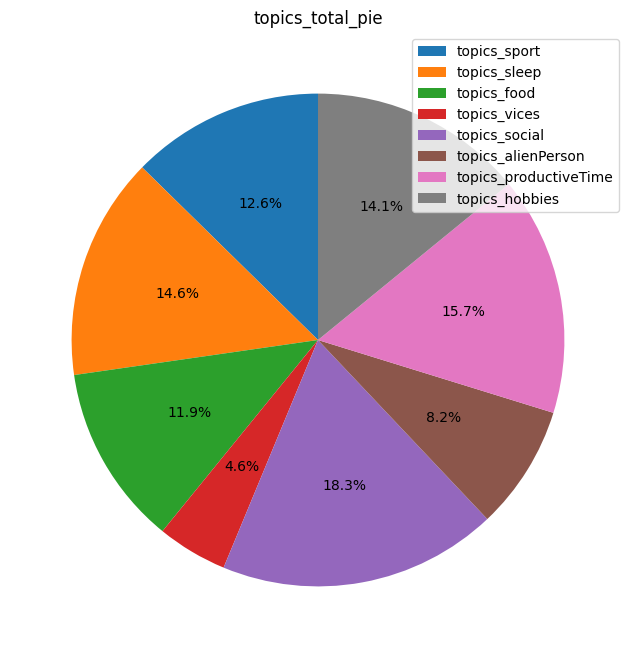

In [19]:
topics=encuesta.filter(regex="^topics")
topics_total=topics.T
topics_total['total']=topics_total.sum(axis=1)
topics_total_pie=topics_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='topics_total_pie',figsize=(8,8))
plt.ylabel('')
plt.show()

topics_vices        topics_sleep   -0.397225
topics_alienPerson  topics_sport   -0.272661
                    topics_food    -0.310291
topics_hobbies      topics_sport   -0.328341
                    topics_food    -0.258955
dtype: float64


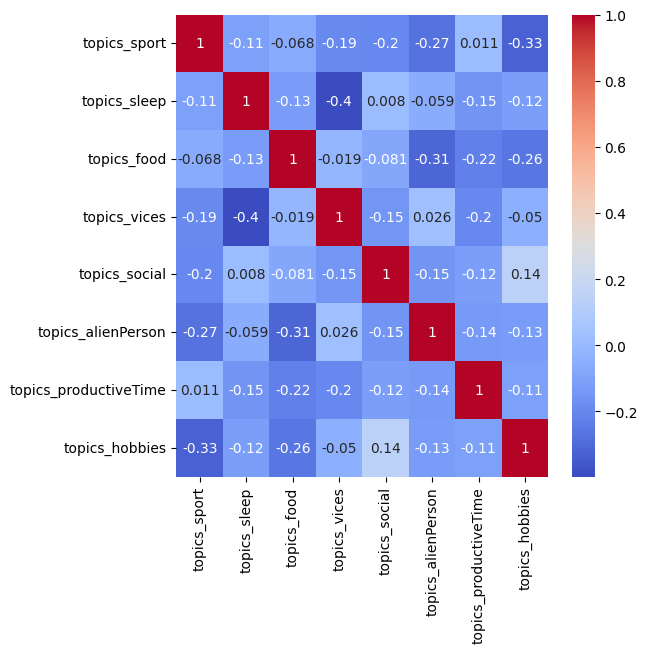

In [20]:
topics_corr = topics.corr()
topics_corr.loc[:,:] = np.tril(topics_corr, k=-1)
topics_corr = topics_corr.stack()
print(topics_corr[(topics_corr > 0.25) | (topics_corr < -0.25)])

topics_corr = topics.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(topics_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.9. Productive time

In [21]:
# Change productiveTime to binary (select 4)
encuesta.loc[encuesta['productiveTime'].str.contains('trabajo'),'productiveTime_work'] = 1
encuesta.loc[encuesta['productiveTime'].str.contains('estudio'),'productiveTime_study'] = 1
encuesta.loc[encuesta['productiveTime'].str.contains('mental'),'productiveTime_mental'] = 1
encuesta.loc[encuesta['productiveTime'].str.contains('ectura'),'productiveTime_reading'] = 1
encuesta.loc[(encuesta['productiveTime'].str.contains('domésticas'))|(encuesta['productiveTime'].str.contains('Tejer')),'productiveTime_housework'] = 1

productive_time_compliance = ['umplimiento', 'aprovech', 'invertido']
encuesta['productiveTime_compliance'] = encuesta['productiveTime'].apply(lambda x: 1 if any(word in x for word in productive_time_compliance) else 0)

productive_time_Proposed_sport = ['eporte', 'ioga', 'Golf']
encuesta['productiveTime_Proposed_sport'] = encuesta['productiveTime'].apply(lambda x: 1 if any(word in x for word in productive_time_Proposed_sport) else 0)

productive_time_Proposed_attitude = ['Que em senti bè quan em pregunto', 'feliz', 'Actitut','personales','Eficiencia','coche','Mascota','mateix','pensar']
encuesta['productiveTime_Proposed_attitude'] = encuesta['productiveTime'].apply(lambda x: 1 if any(word in x for word in productive_time_Proposed_attitude) else 0)

# Drop productive_time
encuesta.drop(['productiveTime'], axis=1, inplace=True)
# Fill na
productive_time=encuesta.filter(regex='^productiveTime').fillna(0)
# Change productive_time to int
productive_time = productive_time.astype(int)
# Add productive_time to encuesta
encuesta[productive_time.columns] = productive_time
print(encuesta.shape)
print("\nproductiveTime_Proposed_sport sum =",encuesta['productiveTime_Proposed_sport'].sum())
print("\nproductiveTime_Proposed_attitude sum =",encuesta['productiveTime_Proposed_attitude'].sum())

(153, 59)

productiveTime_Proposed_sport sum = 5

productiveTime_Proposed_attitude sum = 9


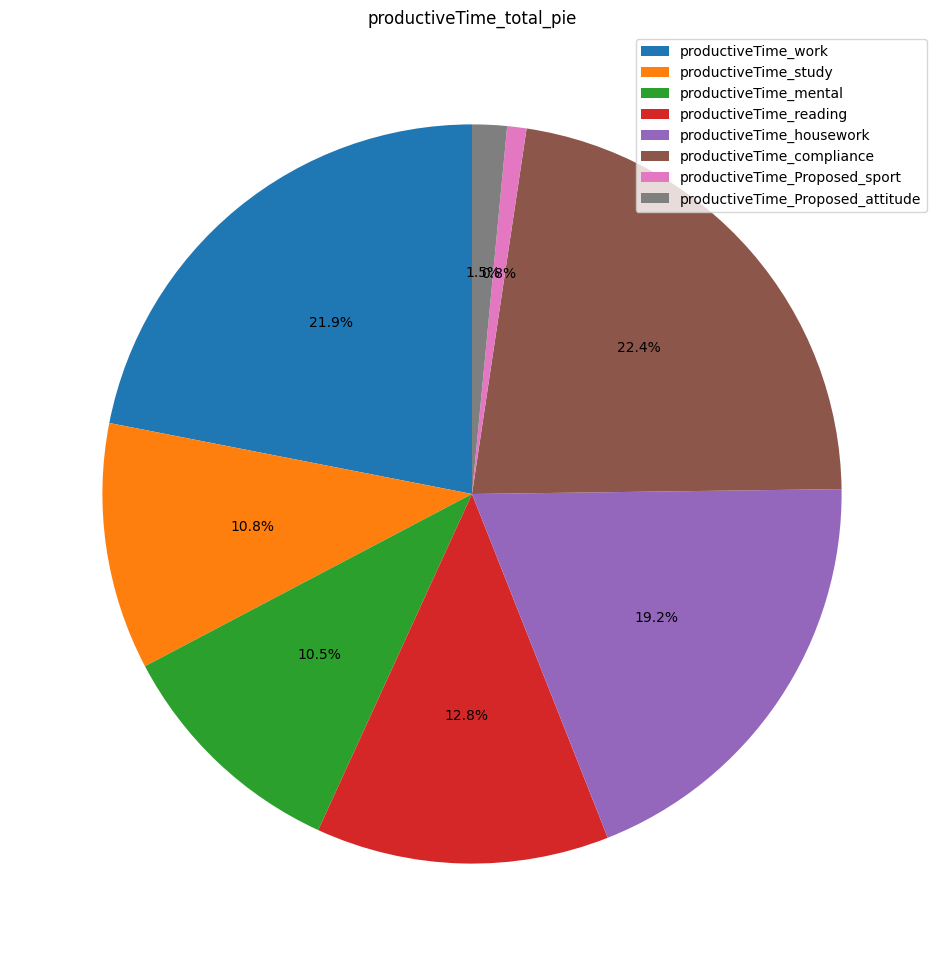

In [22]:
productiveTime=encuesta.filter(regex="^productiveTime")
productiveTime_total=productiveTime.T
productiveTime_total['total']=productiveTime_total.sum(axis=1)
productiveTime_total_pie=productiveTime_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='productiveTime_total_pie',figsize=(12, 12))
plt.ylabel('')
plt.show()

productiveTime_housework   productiveTime_study     -0.294495
                           productiveTime_reading   -0.258784
productiveTime_compliance  productiveTime_mental    -0.272330
dtype: float64


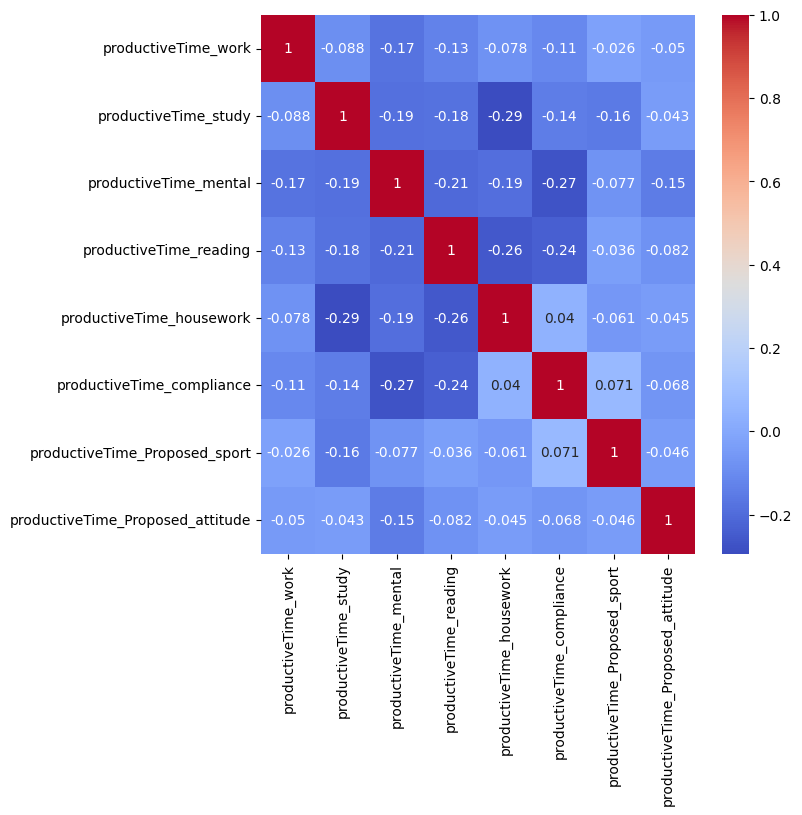

In [23]:
productiveTime_corr = productiveTime.corr()
productiveTime_corr.loc[:,:] = np.tril(productiveTime_corr, k=-1)
productiveTime_corr = productiveTime_corr.stack()
print(productiveTime_corr[(productiveTime_corr > 0.25) | (productiveTime_corr < -0.25)])

productiveTime_corr = productiveTime.corr()
plt.figure(figsize=(7,7))
sns.heatmap(productiveTime_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.10. Social

In [24]:
# Change social to binary (select 3)
encuesta.loc[encuesta['social'].str.contains('Familia'),'social_family'] = 1
encuesta.loc[(encuesta['social'].str.contains('Citas'))|(encuesta['social'].str.contains('areja')),'social_couple'] = 1
encuesta.loc[encuesta['social'].str.contains('Redes'),'social_networks'] = 1

social_friends = ['Amigos', 'Compañeros', 'Grupo']
encuesta['social_friends'] = encuesta['social'].apply(lambda x: 1 if any(word in x for word in social_friends) else 0)

social_party = ['Fiesta', 'Musica', 'Comidas', 'estaurantes']
encuesta['social_party'] = encuesta['social'].apply(lambda x: 1 if any(word in x for word in social_party) else 0)

# Drop social
encuesta.drop(['social'], axis=1, inplace=True)
# Fill na
social=encuesta.filter(regex='^social').fillna(0)
# Change social to int
social = social.astype(int)
# Add social to encuesta
encuesta[social.columns] = social
print(encuesta.shape)

(153, 63)


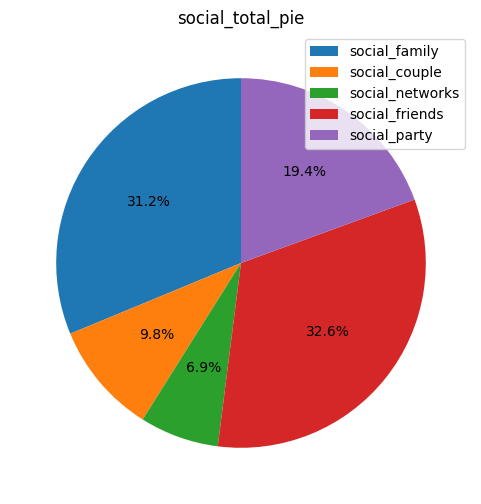

In [25]:
social=encuesta.filter(regex="^social")
social_total=social.T
social_total['total']=social_total.sum(axis=1)
social_total_pie=social_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='social_total_pie',figsize=(6,6))
plt.ylabel('')
plt.show()

social_networks  social_family     -0.254613
social_friends   social_couple     -0.344635
social_party     social_couple     -0.437904
                 social_networks   -0.414586
dtype: float64


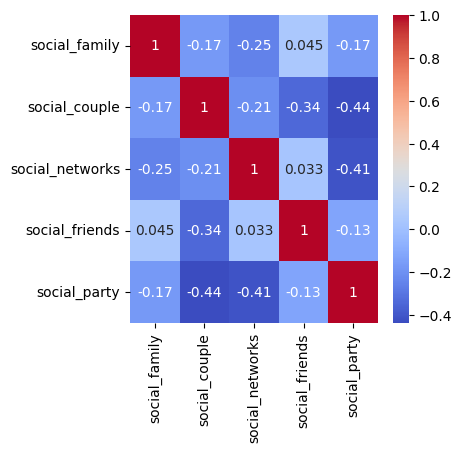

In [26]:
social_corr = social.corr()
social_corr.loc[:,:] = np.tril(social_corr, k=-1)
social_corr = social_corr.stack()
print(social_corr[(social_corr > 0.25) | (social_corr < -0.25)])

social_corr = social.corr()
plt.figure(figsize=(4,4))
sns.heatmap(social_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.11. Hobbies

In [27]:
# Change hobbies to binary (select 4)
encuesta.loc[encuesta['hobbies'].str.contains('Contenido'),'hobbies_audiovisual'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Lectura'),'hobbies_reading'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Relajamiento'),'hobbies_relax'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Cultural'),'hobbies_culture'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Naturaleza'),'hobbies_nature'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Viajes'),'hobbies_travel'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('confort'),'hobbies_outConfort'] = 1
encuesta.loc[encuesta['hobbies'].str.contains('Música'),'hobbies_music'] = 1
encuesta.loc[(encuesta['hobbies'].str.contains('teléfono'))|(encuesta['hobbies'].str.contains('redes')),'hobbies_mobilePhone'] = 1
encuesta.loc[(encuesta['hobbies'].str.contains('deporte'))|(encuesta['hobbies'].str.contains('esport')),'hobbies_Proposed_sport'] = 1

# Drop hobbies
encuesta.drop(['hobbies'], axis=1, inplace=True)
# Fill na
hobbies=encuesta.filter(regex='^hobbies').fillna(0)
# Change hobbies to int
hobbies = hobbies.astype(int)
# Add hobbies to encuesta
encuesta[hobbies.columns] = hobbies
print(encuesta.shape)
print("\nhobbies_Proposed_sport sum =",encuesta['hobbies_Proposed_sport'].sum())

(153, 72)

hobbies_Proposed_sport sum = 2


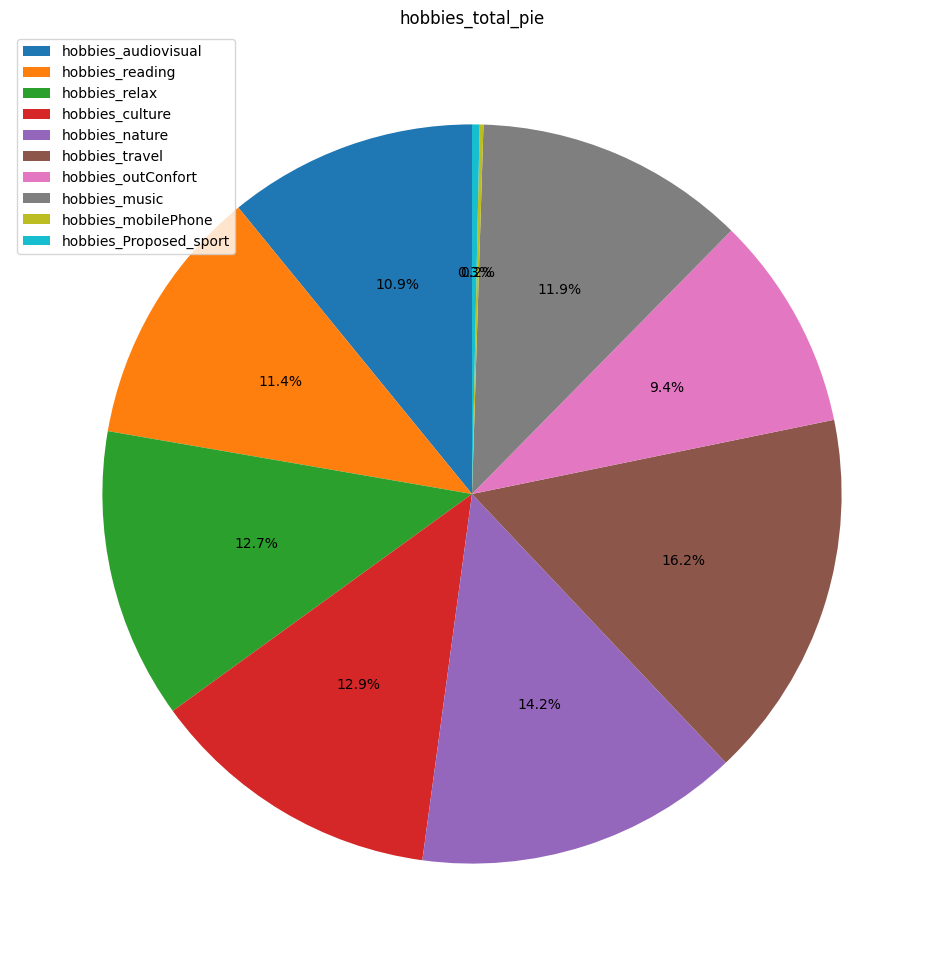

In [28]:
hobbies=encuesta.filter(regex="^hobbies")
hobbies_total=hobbies.T
hobbies_total['total']=hobbies_total.sum(axis=1)
hobbies_total_pie=hobbies_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='hobbies_total_pie',figsize=(12,12))
plt.ylabel('')
plt.show()

hobbies_nature  hobbies_culture   -0.3121
dtype: float64


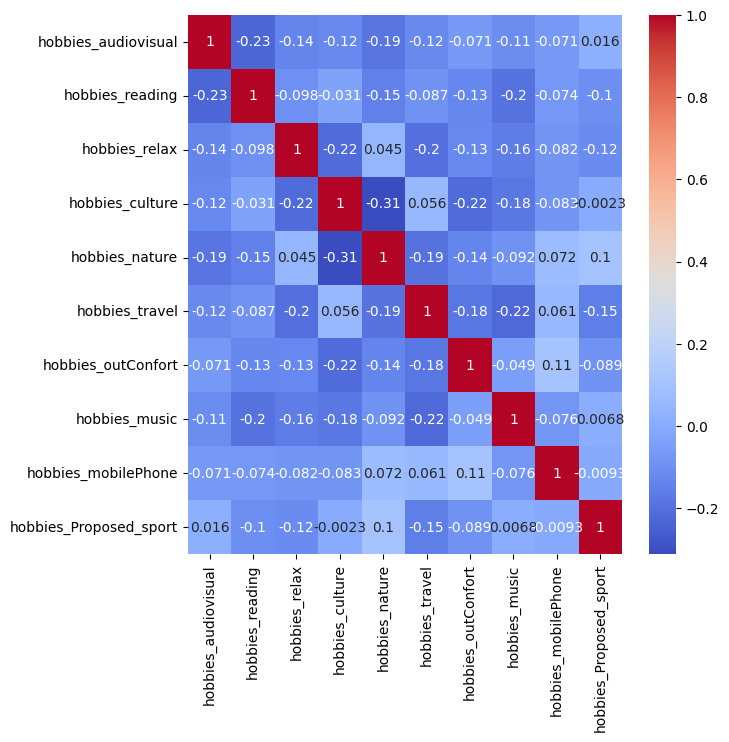

In [29]:
hobbies_corr = hobbies.corr()
hobbies_corr.loc[:,:] = np.tril(hobbies_corr, k=-1)
hobbies_corr = hobbies_corr.stack()
print(hobbies_corr[(hobbies_corr > 0.25) | (hobbies_corr < -0.25)])

hobbies_corr = hobbies.corr()
plt.figure(figsize=(7,7))
sns.heatmap(hobbies_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.12. Sport

In [30]:
# Change sport to binary (select 2)
encuesta.loc[encuesta['sport'].str.contains('casa'),'sport_leavingHome'] = 1
encuesta.loc[encuesta['sport'].str.contains('Intensidad'),'sport_intensity'] = 1
encuesta.loc[(encuesta['sport'].str.contains('pasivo'))|(encuesta['sport'].str.contains('Desplazam')),'sport_passive'] = 1

sport_type = ['Tipo', 'Bailar', 'Natación', 'Trekking', 'aire', 'Córrer', 'Golf']
encuesta['sport_type'] = encuesta['sport'].apply(lambda x: 1 if any(word in x for word in sport_type) else 0)

# Drop sport
encuesta.drop(['sport'], axis=1, inplace=True)
# Fill na
sport=encuesta.filter(regex='^sport').fillna(0)
# Change sport to int
sport = sport.astype(int)
# Add sport to encuesta
encuesta[sport.columns] = sport
print(encuesta.shape)

(153, 75)


Text(0, 0.5, '')

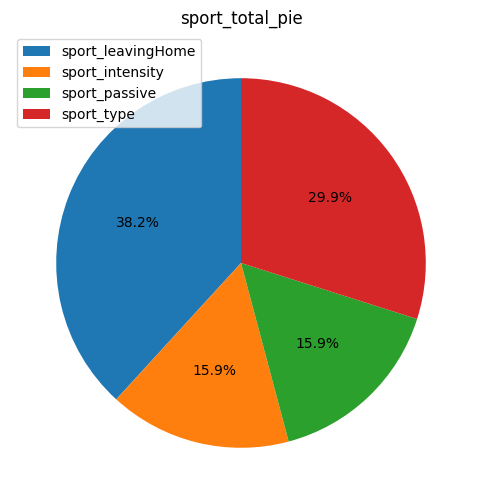

In [31]:
sport=encuesta.filter(regex="^sport")
sport_total=sport.T
sport_total['total']=sport_total.sum(axis=1)
sport_total_pie=sport_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='sport_total_pie',figsize=(6,6))
plt.ylabel('')

sport_intensity  sport_leavingHome   -0.654584
sport_passive    sport_intensity     -0.396429
sport_type       sport_leavingHome   -0.357994
                 sport_passive       -0.665017
dtype: float64


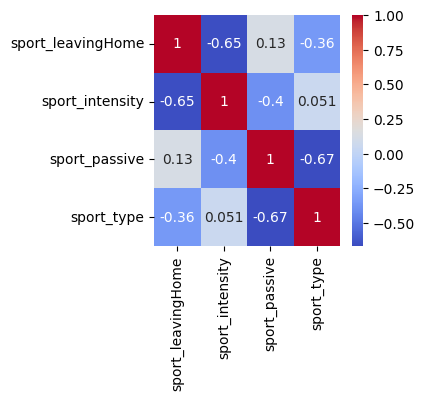

In [32]:
sport_corr = sport.corr()
sport_corr.loc[:,:] = np.tril(sport_corr, k=-1)
sport_corr = sport_corr.stack()
print(sport_corr[(sport_corr > 0.25) | (sport_corr < -0.25)])

sport_corr = sport.corr()
plt.figure(figsize=(3,3))
sns.heatmap(sport_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.13. Sleep

In [33]:
# Change sleep to binary (select 3)
encuesta.loc[encuesta['sleep'].str.contains('Calidad'),'sleep_quality'] = 1
encuesta.loc[encuesta['sleep'].str.contains('Cantidad'),'sleep_quantity'] = 1
encuesta.loc[encuesta['sleep'].str.contains('levanta'),'sleep_timeGetUp'] = 1
encuesta.loc[encuesta['sleep'].str.contains('Siesta'),'sleep_nap'] = 1
encuesta.loc[encuesta['sleep'].str.contains('Pantallas'),'sleep_screens'] = 1
encuesta.loc[encuesta['sleep'].str.contains('onírico'),'sleep_oneiric'] = 1

# Drop sleep
encuesta.drop(['sleep'], axis=1, inplace=True)
# Fill na
sleep=encuesta.filter(regex='^sleep').fillna(0)
# Change sleep to int
sleep = sleep.astype(int)
# Add sleep to encuesta
encuesta[sleep.columns] = sleep
print(encuesta.shape)

(153, 80)


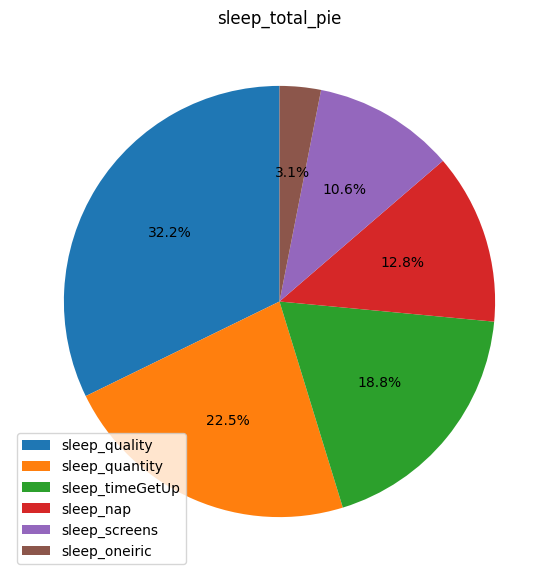

In [34]:
sleep=encuesta.filter(regex="^sleep")
sleep_total=sleep.T
sleep_total['total']=sleep_total.sum(axis=1)
sleep_total_pie=sleep_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='sleep_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

sleep_nap      sleep_timeGetUp   -0.521141
sleep_screens  sleep_quantity    -0.418330
               sleep_nap         -0.266995
dtype: float64


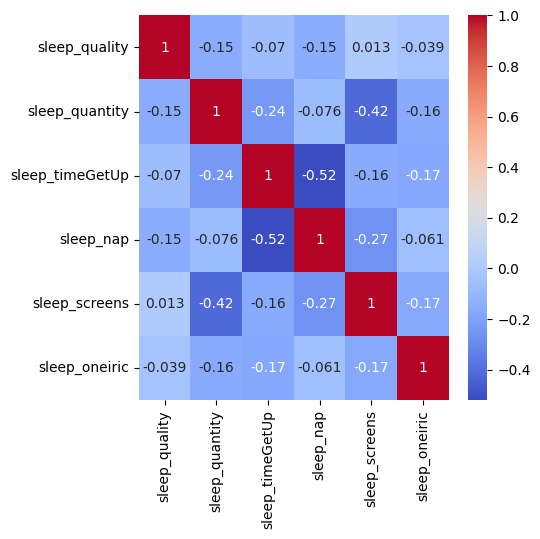

In [35]:
sleep_corr = sleep.corr()
sleep_corr.loc[:,:] = np.tril(sleep_corr, k=-1)
sleep_corr = sleep_corr.stack()
print(sleep_corr[(sleep_corr > 0.25) | (sleep_corr < -0.25)])

sleep_corr = sleep.corr()
plt.figure(figsize=(5,5))
sns.heatmap(sleep_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.14. Food

In [36]:
# Change food to binary (select 2)
encuesta.loc[(encuesta['food'].str.contains('Tipo'))|(encuesta['food'].str.contains('filete')),'food_type'] = 1#sana, rápida, casera, reparto, restaurante
encuesta.loc[(encuesta['food'].str.contains('Que'))|(encuesta['food'].str.contains('Mediterránea')),'food_watHaveIEaten'] = 1#pollo, ternera, legumbres, ensalada, verduras
encuesta.loc[encuesta['food'].str.contains('Dieta'),'food_diet'] = 1#sin carne, azúcar, refrescos
encuesta.loc[encuesta['food'].str.contains('Cantidad'),'food_quantity'] = 1#sin carne, azúcar, refrescos

# Drop food
encuesta.drop(['food'], axis=1, inplace=True)
# Fill na
food=encuesta.filter(regex='^food').fillna(0)
# Change food to int
food = food.astype(int)
# Add food to encuesta
encuesta[food.columns] = food
print(encuesta.shape)

(153, 83)


Text(0, 0.5, '')

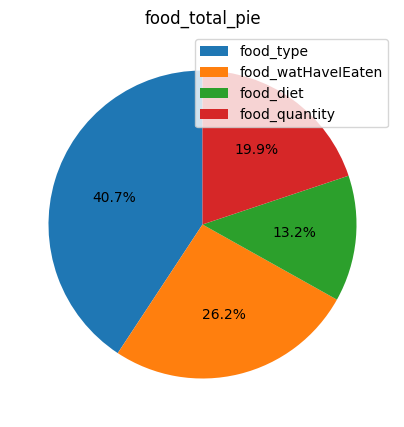

In [37]:
food=encuesta.filter(regex="^food")
food_total=food.T
food_total['total']=food_total.sum(axis=1)
food_total_pie=food_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='food_total_pie',figsize=(5,5))
plt.ylabel('')

food_watHaveIEaten  food_type            -0.346213
food_diet           food_type            -0.305585
                    food_watHaveIEaten   -0.257566
food_quantity       food_watHaveIEaten   -0.481664
                    food_diet            -0.356026
dtype: float64


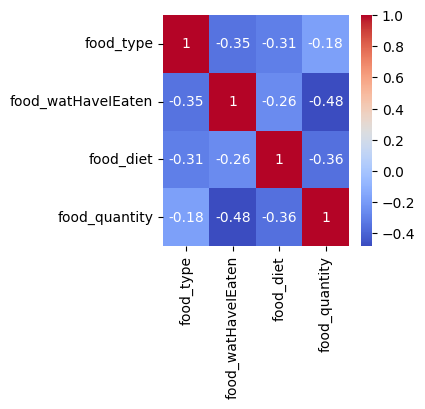

In [38]:
food_corr = food.corr()
food_corr.loc[:,:] = np.tril(food_corr, k=-1)
food_corr = food_corr.stack()
print(food_corr[(food_corr > 0.25) | (food_corr < -0.25)])

food_corr = food.corr()
plt.figure(figsize=(3,3))
sns.heatmap(food_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.15. AlienPerson

In [39]:
# Change alienPerson to binary (select 2)
encuesta.loc[(encuesta['alienPerson'].str.contains('Clima'))|(encuesta['alienPerson'].str.contains('Tiempo')),'alienPerson_climate'] = 1#sunny, rainy
encuesta.loc[encuesta['alienPerson'].str.contains('Día'),'alienPerson_weekDay'] = 1#Day of the week
encuesta.loc[encuesta['alienPerson'].str.contains('buenas'),'alienPerson_goodBadNews'] = 1
encuesta.loc[encuesta['alienPerson'].str.contains('equipo'),'alienPerson_sportsTeam'] = 1#Has your favorite team won?

alienPerson_Proposed_environment = ['Entorno', 'fluya', 'estrés', 'gente']
encuesta['alienPerson_Proposed_environment'] = encuesta['alienPerson'].apply(lambda x: 1 if any(word in x for word in alienPerson_Proposed_environment) else 0)

# Drop alienPerson
encuesta.drop(['alienPerson'], axis=1, inplace=True)
# Fill na
alienPerson=encuesta.filter(regex='^alienPerson').fillna(0)
# Change alienPerson to int
alienPerson = alienPerson.astype(int)
# Add alienPerson to encuesta
encuesta[alienPerson.columns] = alienPerson
print(encuesta.shape)
print("\nalienPerson_Proposed_environment sum =",encuesta['alienPerson_Proposed_environment'].sum())

(153, 87)

alienPerson_Proposed_environment sum = 4


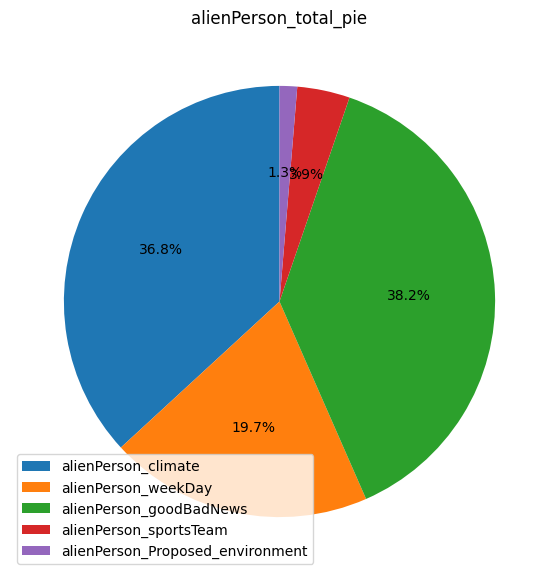

In [40]:
alienPerson=encuesta.filter(regex="^alienPerson")
alienPerson_total=alienPerson.T
alienPerson_total['total']=alienPerson_total.sum(axis=1)
alienPerson_total_pie=alienPerson_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='alienPerson_total_pie',figsize=(7,7))
plt.ylabel('')
plt.show()

alienPerson_weekDay      alienPerson_climate       -0.541688
alienPerson_goodBadNews  alienPerson_climate       -0.272781
                         alienPerson_weekDay       -0.421757
alienPerson_sportsTeam   alienPerson_goodBadNews   -0.289444
dtype: float64


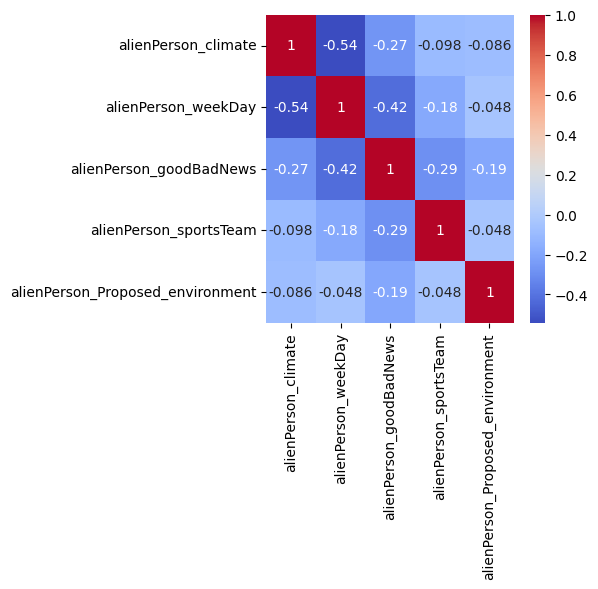

In [41]:
alienPerson_corr = alienPerson.corr()
alienPerson_corr.loc[:,:] = np.tril(alienPerson_corr, k=-1)
alienPerson_corr = alienPerson_corr.stack()
print(alienPerson_corr[(alienPerson_corr > 0.25) | (alienPerson_corr < -0.25)])

alienPerson_corr = alienPerson.corr()
plt.figure(figsize=(4, 4))
sns.heatmap(alienPerson_corr, annot=True, cmap='coolwarm')
plt.show()

## 1.16. Vices

In [42]:
# Change vices to binary (select 2)
encuesta.loc[encuesta['vices'].str.contains('Alcohol'),'vices_alcohol'] = 1
encuesta.loc[encuesta['vices'].str.contains('Tabaco'),'vices_tobacco'] = 1
encuesta.loc[encuesta['vices'].str.contains('Sexo'),'vices_sex'] = 1
encuesta.loc[(encuesta['vices'].str.contains('Café'))|(encuesta['vices'].str.contains('cafe')),'vices_coffee'] = 1
encuesta.loc[(encuesta['vices'].str.contains('Drogas'))|(encuesta['vices'].str.contains('Weed')),'vices_drugs'] = 1
encuesta.loc[(encuesta['vices'].str.contains('Salir'))|(encuesta['vices'].str.contains('casa')),'vices_Proposed_leavingHome'] = 1

vices_Proposed_noVice = ['vicios', 'bec', 'nada', 'Ninguno']
encuesta['vices_Proposed_noVice'] = encuesta['vices'].apply(lambda x: 1 if any(word in x for word in vices_Proposed_noVice) else 0)

vices_Proposed_chocolate = ['hocolate', 'Cacao', 'choca']
encuesta['vices_Proposed_chocolate'] = encuesta['vices'].apply(lambda x: 1 if any(word in x for word in vices_Proposed_chocolate) else 0)

vices_Proposed_sweet = ['sucre', 'dulces', 'Coca-cola']
encuesta['vices_Proposed_sweet'] = encuesta['vices'].apply(lambda x: 1 if any(word in x for word in vices_Proposed_sweet) else 0)

vices_Proposed_eat = ['alimentos', 'fruta', 'Comer']
encuesta['vices_Proposed_eat'] = encuesta['vices'].apply(lambda x: 1 if any(word in x for word in vices_Proposed_eat) else 0)

# Drop vices
encuesta.drop(['vices'], axis=1, inplace=True)
# Fill na
vices=encuesta.filter(regex='^vices').fillna(0)
# Change vices to int
vices = vices.astype(int)
# Add vices to encuesta
encuesta[vices.columns] = vices
print(encuesta.shape)
print("\nvices_Proposed_leavingHome sum =",encuesta['vices_Proposed_leavingHome'].sum())
print("\nvices_Proposed_noVice sum =",encuesta['vices_Proposed_noVice'].sum())
print("\nvices_Proposed_chocolate sum =",encuesta['vices_Proposed_chocolate'].sum())
print("\nvvices_Proposed_sweet sum =",encuesta['vices_Proposed_sweet'].sum())
print("\nvices_Proposed_eat sum =",encuesta['vices_Proposed_eat'].sum())

(153, 96)

vices_Proposed_leavingHome sum = 2

vices_Proposed_noVice sum = 8

vices_Proposed_chocolate sum = 4

vvices_Proposed_sweet sum = 3

vices_Proposed_eat sum = 3


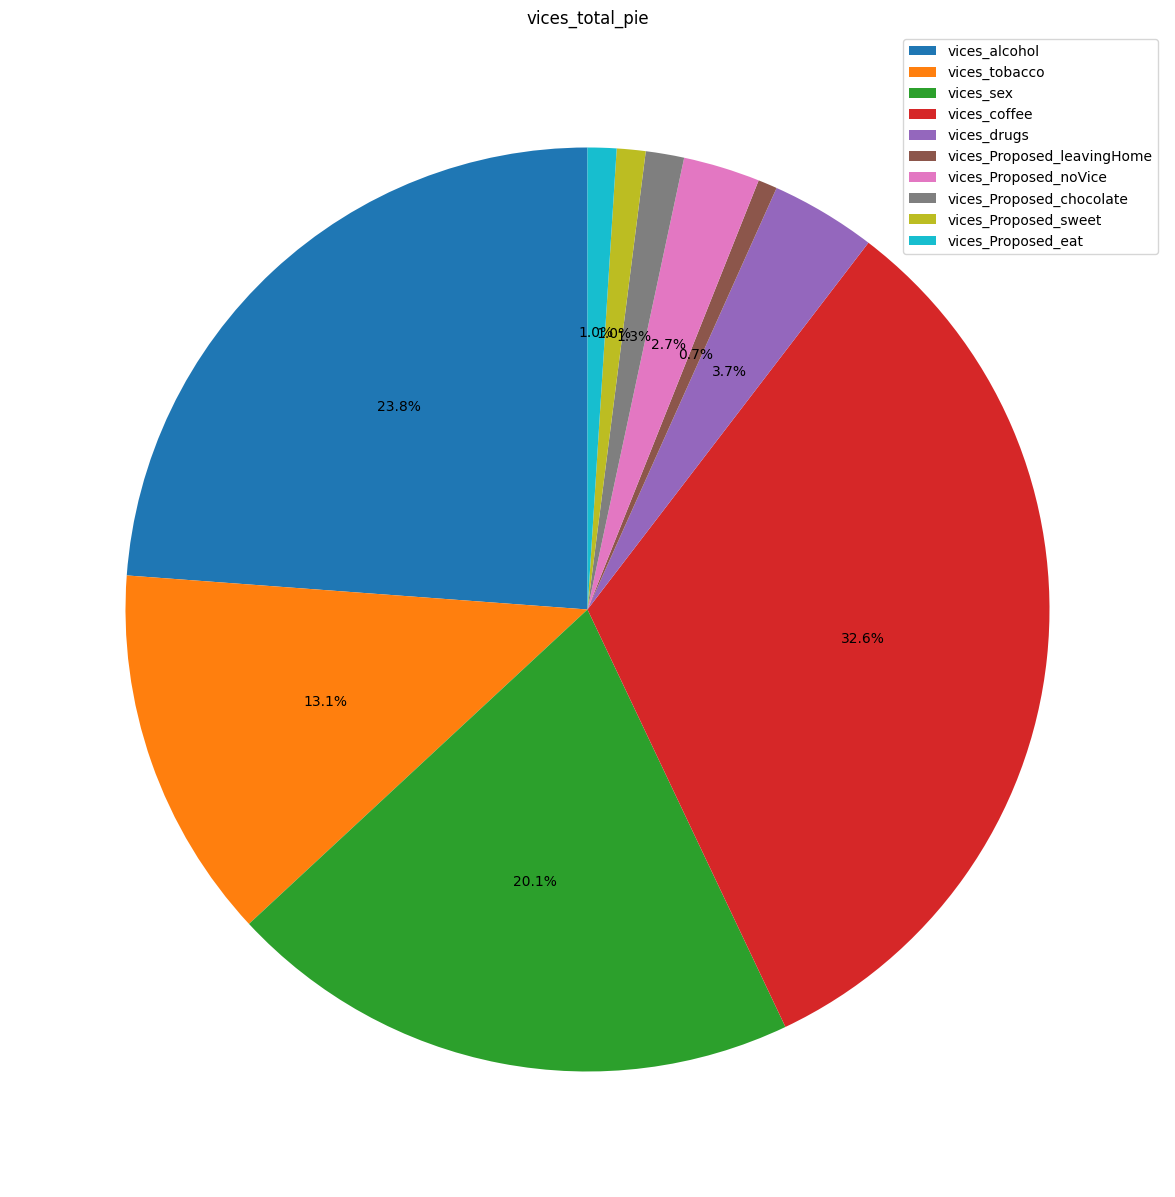

In [43]:
vices=encuesta.filter(regex="^vices")
vices_total=vices.T
vices_total['total']=vices_total.sum(axis=1)
vices_total_pie=vices_total['total'].plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='vices_total_pie',figsize=(15, 15))
plt.ylabel('')
plt.show()

vices_sex     vices_tobacco   -0.439083
vices_coffee  vices_alcohol   -0.354042
              vices_sex       -0.390155
vices_drugs   vices_coffee    -0.313780
dtype: float64


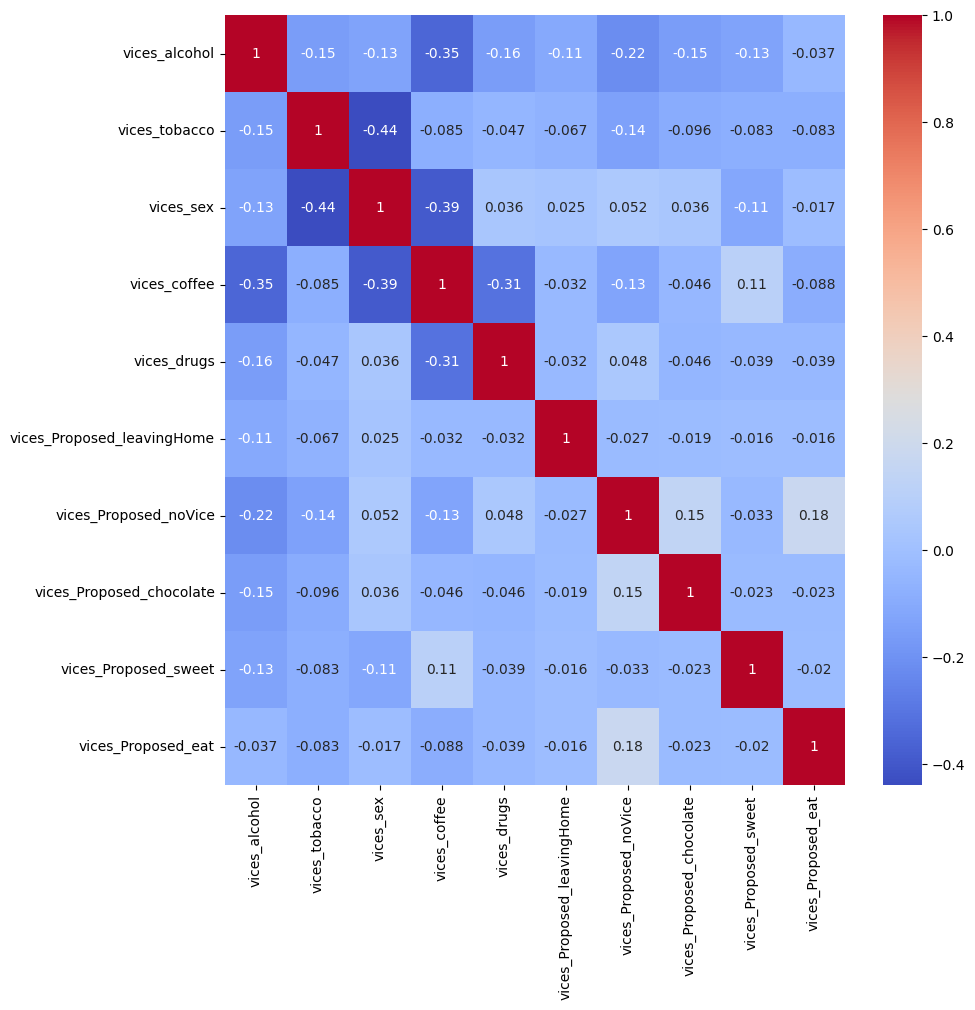

In [44]:
vices_corr = vices.corr()
vices_corr.loc[:,:] = np.tril(vices_corr, k=-1)
vices_corr = vices_corr.stack()
print(vices_corr[(vices_corr > 0.25) | (vices_corr < -0.25)])

vices_corr = vices.corr()
plt.figure(figsize=(10,10))
sns.heatmap(vices_corr, annot=True, cmap='coolwarm')
plt.show()

# 2. Adapt dataframe

In [45]:
# Normalize the selected numeric columns
columns_to_normalize = ['age', 'size', 'weight']
scaler = StandardScaler()
encuesta[columns_to_normalize] = scaler.fit_transform(encuesta[columns_to_normalize])
print(encuesta.shape)
encuesta.head()

(153, 96)


sex_Man  sex_Woman  sex_Other       age      size    weight   
1        0          1          0  0.575341 -0.326391 -0.090799  \
2        0          1          0  0.575341 -0.326391 -0.090799   
3        0          1          0 -1.825400 -0.326391 -0.090799   
4        1          0          0  0.575341  0.692749  1.543580   
5        1          0          0 -1.825400  0.692749 -0.907988   

   actualStatus_free  actualStatus_student  actualStatus_work   
1                  0                     0                  1  \
2                  0                     0                  1   
3                  0                     1                  0   
4                  0                     0                  1   
5                  0                     1                  0   

   homeCompany_friends  ...  vices_alcohol  vices_tobacco  vices_sex   
1                    0  ...              1              1          0  \
2                    0  ...              0              1          0   
3                    1  ...              0              0          1   
4                    0  ...              1              0          0   
5                    1  ...              0              0          1   

   vices_coffee  vices_drugs  vices_Proposed_leavingHome   
1             0            0                           0  \
2             1            0                           0   
3             1            0                           0   
4             1            0                           0   
5             0            0                           0   

   vices_Proposed_noVice  vices_Proposed_chocolate  vices_Proposed_sweet   
1                      0                         0                     0  \
2                      0                         0                     0   
3                      0                         0                     0   
4                      0                         0                     0   
5                      0                         1                     0   

   vices_Proposed_eat  
1                   0  
2                   0  
3                   0  
4                   0  
5                   0  

[5 rows x 96 columns]

In [46]:
# Obtain the columns of the personal profile
personalProfile_columns=encuesta.iloc[:,0:36].columns
personalProfile=encuesta[personalProfile_columns]
print(personalProfile.shape)
personalProfile.head()

(153, 36)


sex_Man  sex_Woman  sex_Other       age      size    weight   
1        0          1          0  0.575341 -0.326391 -0.090799  \
2        0          1          0  0.575341 -0.326391 -0.090799   
3        0          1          0 -1.825400 -0.326391 -0.090799   
4        1          0          0  0.575341  0.692749  1.543580   
5        1          0          0 -1.825400  0.692749 -0.907988   

   actualStatus_free  actualStatus_student  actualStatus_work   
1                  0                     0                  1  \
2                  0                     0                  1   
3                  0                     1                  0   
4                  0                     0                  1   
5                  0                     1                  0   

   homeCompany_friends  ...  aboutYou_stress  aboutYou_romantic   
1                    0  ...                0                  1  \
2                    0  ...                0                  1   
3                    1  ...                0                  1   
4                    0  ...                0                  1   
5                    1  ...                1                  1   

   aboutYou_spontaneous  aboutYou_sweet  aboutYou_audiovisual   
1                     1               0                     1  \
2                     1               0                     0   
3                     0               1                     0   
4                     1               0                     0   
5                     1               0                     0   

   aboutYou_videogames  aboutYou_read  aboutYou_dependent  aboutYou_sciences   
1                    0              0                   0                  0  \
2                    0              0                   0                  1   
3                    1              1                   1                  1   
4                    0              1                   0                  0   
5                    0              0                   0                  1   

   aboutYou_pets  
1              0  
2              0  
3              0  
4              0  
5              0  

[5 rows x 36 columns]

In [47]:
# Obtain the columns of the topics
print(topics.shape)
topics.head()

(153, 8)


topics_sport  topics_sleep  topics_food  topics_vices  topics_social   
1             1             0            0             0              1  \
2             1             1            0             0              1   
3             1             1            0             0              1   
4             1             1            1             1              0   
5             1             1            0             0              1   

   topics_alienPerson  topics_productiveTime  topics_hobbies  
1                   0                      1               0  
2                   0                      1               1  
3                   0                      1               1  
4                   0                      1               0  
5                   0                      1               1

In [48]:
# Obtain the columns of the subtopics
subtopics_columns=encuesta.iloc[:,44:].columns
subtopics=encuesta[subtopics_columns]
print(subtopics.shape)
subtopics.head()

(153, 52)


productiveTime_work  productiveTime_study  productiveTime_mental   
1                    1                     0                      0  \
2                    1                     1                      0   
3                    1                     1                      1   
4                    1                     0                      0   
5                    1                     1                      0   

   productiveTime_reading  productiveTime_housework   
1                       0                         1  \
2                       0                         1   
3                       0                         0   
4                       1                         1   
5                       0                         0   

   productiveTime_compliance  productiveTime_Proposed_sport   
1                          1                              1  \
2                          1                              0   
3                          1                              0   
4                          1                              0   
5                          1                              0   

   productiveTime_Proposed_attitude  social_family  social_couple  ...   
1                                 0              1              0  ...  \
2                                 0              1              0  ...   
3                                 0              1              0  ...   
4                                 0              1              0  ...   
5                                 1              1              1  ...   

   vices_alcohol  vices_tobacco  vices_sex  vices_coffee  vices_drugs   
1              1              1          0             0            0  \
2              0              1          0             1            0   
3              0              0          1             1            0   
4              1              0          0             1            0   
5              0              0          1             0            0   

   vices_Proposed_leavingHome  vices_Proposed_noVice   
1                           0                      0  \
2                           0                      0   
3                           0                      0   
4                           0                      0   
5                           0                      0   

   vices_Proposed_chocolate  vices_Proposed_sweet  vices_Proposed_eat  
1                         0                     0                   0  
2                         0                     0                   0  
3                         0                     0                   0  
4                         0                     0                   0  
5                         1                     0                   0  

[5 rows x 52 columns]

# 3. Subtopics

## 3.1. Find k (for k-means) and best parameter combination
- Best K with Elbow Method = (2>3>4)
- Best K with Silhouette Method = (2>>3>>4>5)
- Best K with GridSearchCV = 8

Los distintos métodos (elbow, silhouette, índice Davies-Bouldin y índice Calinski-Harabasz) se basan en diferentes criterios y métricas para evaluar la calidad de los clusters obtenidos con diferentes valores de K:

- ***3.Elbow method***: Inercia o **suma de cuadrados dentro del cluster**.
    - **Ventajas**: Es un método sencillo y fácil de implementar. Ayuda a identificar un punto de inflexión en la inercia, lo que puede proporcionar una estimación inicial del número óptimo de clusters.
    - **Aplicabilidad**: Es adecuado cuando se requiere una evaluación rápida del número de clusters, pero puede ser menos preciso en la determinación del K óptimo.
    - Criterio: Busca el punto en el gráfico donde la inercia comienza a aplanarse, formando un "codo".
    - Interpretación: El K óptimo es aquel que se encuentra en el punto del "codo" donde añadir más clusters no proporciona una reducción significativa de la inercia.
    - Fijarte en: La ubicación del "codo" en el gráfico para determinar el K óptimo.
- ***1.Silhouette method***: Coeficiente de silueta que mide **cuán similar es un punto a su propio cluster en comparación con los otros clusters** más cercanos.
    - **Ventajas**: Es ampliamente utilizado y proporciona una medida directa de la calidad de los clusters, teniendo en cuenta la separación y la cohesión. Es especialmente útil cuando se desea una evaluación más detallada de la estructura de los clusters y su interpretabilidad.
    - **Aplicabilidad**: Es adecuado para una variedad de conjuntos de datos y se utiliza ampliamente en problemas de agrupación.
    - Criterio: Busca el valor de K que maximiza el coeficiente de silueta promedio.
    - Interpretación: El K óptimo es aquel que proporciona la máxima separación entre los clusters y la máxima cohesión dentro de cada cluster.
    - Fijarte en: El valor de K que produce el coeficiente de silueta promedio más alto.
- ***4.Índice Davies-Bouldin***: Mide la **compacidad dentro de los clusters y la separación entre los clusters**.
    - **Ventajas**: Proporciona una medida de la compacidad y la separación de los clusters, ayudando a evaluar la calidad de la agrupación.
    - **Aplicabilidad**: Puede ser útil cuando se desea una medida más detallada de la estructura de los clusters, pero puede ser menos utilizado en comparación con los otros métodos mencionados anteriormente.
    - Criterio: Busca minimizar el valor del índice Davies-Bouldin.
    - Interpretación: El K óptimo es aquel que minimiza el índice Davies-Bouldin, lo que indica clusters bien separados y bien definidos.
    - Fijarte en: El valor de K que produce el índice Davies-Bouldin más bajo.
- ***2.Índice Calinski-Harabasz***: Mide la **relación entre la dispersión dentro de los clusters y la dispersión entre los clusters**.
    - **Ventajas**: Proporciona una medida de la dispersión entre los clusters y la dispersión dentro de los clusters, lo que ayuda a evaluar la compacidad y separación de los clusters.
    - **Aplicabilidad**: Es adecuado para datos con clusters bien definidos y separados, y se utiliza en problemas donde la interpretación de los clusters es importante.
    - Criterio: Busca maximizar el valor del índice Calinski-Harabasz.
    - Interpretación: El K óptimo es aquel que maximiza el índice Calinski-Harabasz, lo que indica clusters bien definidos y separados.
    - Fijarte en: El valor de K que produce el índice Calinski-Harabasz más alto.

### ELBOW - Best k = (2>3>4)

"El método Elbow nos permite identificar el punto de inflexión en la curva de la suma de las distancias al cuadrado (inercia) en el algoritmo K-means. Este punto de inflexión indica un equilibrio entre la capacidad de explicar la varianza de los datos y el número de clústeres, lo que nos ayuda a seleccionar un número óptimo de clústeres para nuestros datos."

***ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS***
- **BUCLE FOR** para realizar el procedimiento de K-means con cross-validation <**num_iterations**> veces. En cada iteración, se crea un objeto KMeans con **max_clusters** y **random_state**.
    - **BUCLE FOR** para realizar el procedimiento de cross-validation <**num_splits**> veces. En cada iteración del bucle, se realizará una partición diferente de los datos de entrada en conjuntos de entrenamiento y prueba.
        - **BUCLE FOR**: en cada partición, se ajusta el modelo K-means para cada valor de K en el rango de 1 a max_clusters. [*np.linspace es una función de NumPy que genera una secuencia de números espaciados uniformemente entre dos valores dados*]
            - Se almacenan las **inercias** resultantes para cada valor de **K** [en 1 partición], en una lista llamada **inertia_k**.
        - Después de completar las particiones, se almacena la lista inertia_k en la lista **inertia_iteration**, lo que representa las inercias de K-means para cada valor de K y partición, en una sola iteración.
    - Después de completar todas las iteraciones de cross-validation, la lista inertia_iteration con las inercias de cada valor de K se almacena en la lista **inertia_iterations**, que contendrá las inercias de K-means para cada valor de K en todas las iteraciones.
- Se calcula la media de las inercias para cada valor de K a través de todas las iteraciones utilizando np.mean y axis=0. Esto resulta en una lista llamada **inertia_mean** que contiene la inercia promedio para cada valor de K.
- Finalmente, se grafica la curva de la inercia promedio versus el número de clusters K utilizando plt.plot. La variable np.linspace(1, max_clusters, max_clusters, dtype=int) genera una secuencia de enteros de **1 a max_clusters**, que se utiliza en el eje x del gráfico, mientras que la lista **inertia_mean** se utiliza en el eje y.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

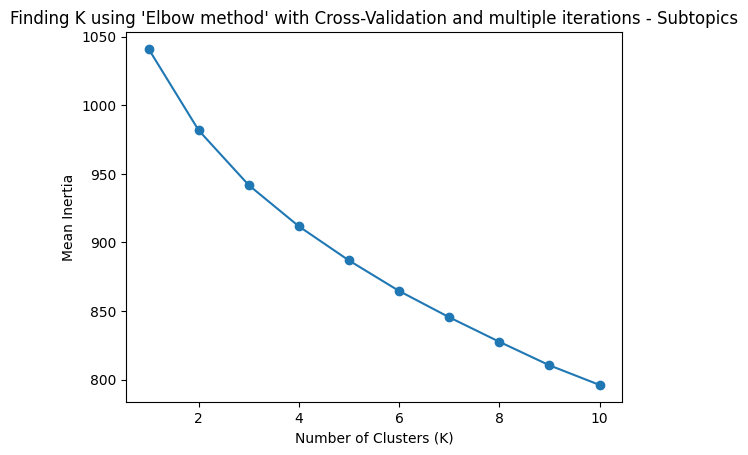

In [49]:
# ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of inertia for each K in each iteration
inertia_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # Create a KMeans object
    kmeans = KMeans(n_clusters=max_clusters, random_state=random_state)
    
    # List to store the inertia for each K in this iteration
    inertia_iteration = []
    
    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(subtopics):# Loop over each split
        X_train = subtopics.iloc[train_index] # Get the training data for this split
        
        # Find the inertia of each K [for this split]
        inertia_k = [] # List to store the inertia of each K [for this split]
        for k in np.linspace(1, max_clusters, max_clusters, dtype=int): # Loop over each K
            kmeans.n_clusters = k # Actualize the number of clusters in the KMeans object
            kmeans.fit(X_train) # Fit the KMeans object with the training data
            inertia_k.append(kmeans.inertia_) # Store the inertia of each K [for this split]
        
        # Store the inertia results of each K, each split [for this iteration]
        inertia_iteration.append(inertia_k)
    
    # Store the inertia results of each K, each split, each iteration
    inertia_iterations.append(inertia_iteration)

# Calculate the mean inertia for each K across all iterations and splits
inertia_mean = np.mean(inertia_iterations, axis=0) # Calculate the mean inertia across all iterations
inertia_mean = np.mean(inertia_mean, axis=0) # Calculate the mean inertia across all splits

# Plot the curve of mean inertia vs K
plt.plot(np.linspace(1, max_clusters, max_clusters, dtype=int), inertia_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia')
plt.title("Finding K using 'Elbow method' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

### SILHOUETTE - Best k = (2>>3>>4>5)

El coeficiente de silueta mide la cohesión y la separación de los clusters en relación con otros clusters. Un valor de coeficiente de silueta más cercano a 1 indica que las muestras están bien agrupadas en sus respectivos clusters, mientras que un valor más cercano a -1 indica que las muestras están mal agrupadas y pertenecen a clusters incorrectos. Un valor cercano a 0 indica superposición de clusters o clusters que están muy cerca uno del otro.

"El método Silhouette es una técnica de evaluación para medir la calidad de un agrupamiento (clustering) en ciencia de datos. La métrica de Silhouette se basa en la comparación de la distancia promedio del punto con su propio clúster y la distancia promedio del punto con los otros clústeres. El valor de Silhouette varía entre -1 y 1, donde valores más cercanos a 1 indican una mejor separación entre clústeres y una agrupación más adecuada de los datos."

***SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS***
- **BUCLE FOR** para realizar el procedimiento de K-means con cross-validation <**num_iterations**> veces. Recorre cada iteración; en cada iteración, se realizará la validación cruzada para calcular los coeficientes de silueta.
    - **BUCLE FOR** para realizar el procedimiento de cross-validation <**num_splits**> veces. En cada iteración del bucle, se realizará una partición diferente de los datos de entrada en conjuntos de entrenamiento y prueba.
        - **BUCLE FOR**: en cada partición, se ajusta el modelo K-means para cada valor de K en el rango de 2 a max_clusters.
            - Se calculan y almacenan los **coeficientes de silueta** para cada valor de **k** [en 1 partición], en una lista llamada **silhouette_k**.
        - Después de completar las particiones, se almacena la lista silhouette_k en la lista **silhouette_iteration**, lo que representa los silhouette score de K-means para cada valor de K y partición [en una sola iteración].
    - Después de completar todas las iteraciones de cross-validation, la lista silhouette_iteration con los score de cada valor de K se almacena en la lista **silhouette_iterations**, which store the silhouette scores of each K, each split, each iteration
- Se calcula la media de los silhouette score para cada valor de K a través de todas las iteraciones y splits. Esto resulta en una lista llamada **inertia_mean** que contiene el score promedio para cada valor de K.
- Finalmente, se grafica la curva del score promedio versus el número de clusters K utilizando.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

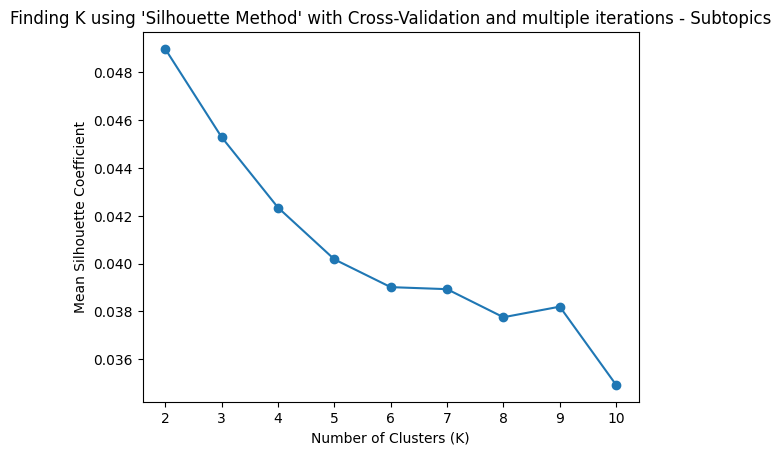

In [50]:
# SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of silhouette scores for each K in each iteration
silhouette_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the silhouette scores for each K in this iteration
    silhouette_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(subtopics):# Loop over each split
        X_train = subtopics.iloc[train_index] # Get the training data for this split

        # Calculate the silhouette scores of each K [for this split]
        silhouette_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = silhouette_score(X_train, labels) # Calculate the silhouette score of this K [for this split]
            silhouette_k.append(score) # Store the silhouette scores of each K [for this split]
        
        # Store the silhouette scores of each K, each split [for this iteration]
        silhouette_iteration.append(silhouette_k) 
    
    # Store the silhouette scores of each K, each split, each iteration
    silhouette_iterations.append(silhouette_iteration)

# Calculate the mean silhouette scores for each K across all iterations and splits
silhouette_mean = np.mean(silhouette_iterations, axis=0) # Calculate the mean silhouette scores across all iterations
silhouette_mean = np.mean(silhouette_mean, axis=0) # Calculate the mean silhouette scores across all splits

# Plot the silhouette coefficient curve
plt.plot(range(2, max_clusters + 1), silhouette_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Coefficient')
plt.title("Finding K using 'Silhouette Method' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

### DAVIES-BOULDIN INDEX - Best k = (10 > 8 >> 5)?

En el gráfico del Índice Davies-Bouldin, buscamos el valor de K que minimiza el índice, es decir, donde la curva alcanza su valor más bajo. El índice Davies-Bouldin mide la similitud promedio entre cada cluster y su cluster más cercano. Un valor más bajo del índice indica una mejor separación entre los clusters. Por lo tanto, el valor de K que minimiza el Índice Davies-Bouldin es el que proporciona una mejor estructura de clustering.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

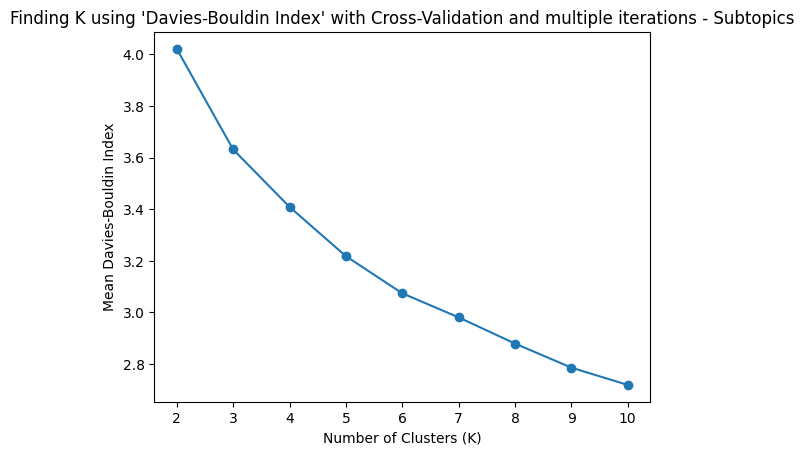

In [51]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Davies-Bouldin index for each K in each iteration
davies_bouldin_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Davies-Bouldin index for each K in this iteration
    davies_bouldin_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(subtopics): # Loop over each split
        X_train = subtopics.iloc[train_index] # Get the training data for this split

        # Calculate the Davies-Bouldin index of each K [for this split]
        davies_bouldin_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = davies_bouldin_score(X_train, labels) # Calculate the Davies-Bouldin index of this K [for this split]
            davies_bouldin_k.append(score) # Store the Davies-Bouldin index of each K [for this split]

        # Store the Davies-Bouldin index of each K, each split [for this iteration]
        davies_bouldin_iteration.append(davies_bouldin_k) 

    # Store the Davies-Bouldin index of each K, each split, each iteration
    davies_bouldin_iterations.append(davies_bouldin_iteration)

# Calculate the mean Davies-Bouldin index for each K across all iterations and splits
davies_bouldin_mean = np.mean(davies_bouldin_iterations, axis=0) # Calculate the mean Davies-Bouldin index across all iterations
davies_bouldin_mean = np.mean(davies_bouldin_mean, axis=0) # Calculate the mean Davies-Bouldin index across all splits

# Plot the Davies-Bouldin index curve
plt.plot(range(2, max_clusters + 1), davies_bouldin_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Davies-Bouldin Index')
plt.title("Finding K using 'Davies-Bouldin Index' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

### CALINSKI-HARABASZ INDEX - Best k = (2 > 3 > 4 > 5)

La interpretación del gráfico es similar al método del codo, pero en lugar de buscar el "codo" o la curva donde la inercia comienza a aplanarse, en el índice Calinski-Harabasz buscamos el punto donde el índice alcanza su máximo. En otras palabras, buscamos el "codo" en el gráfico que indica el número óptimo de clusters.

Por lo tanto, debes buscar el punto en el gráfico donde el índice Calinski-Harabasz alcanza su máximo. Ese será el valor óptimo de K que proporciona una buena separación entre los clusters y una agrupación significativa de los datos. Es decir, es el punto en el que se obtiene el mejor equilibrio entre la compactación de los clusters y la separación entre ellos.

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

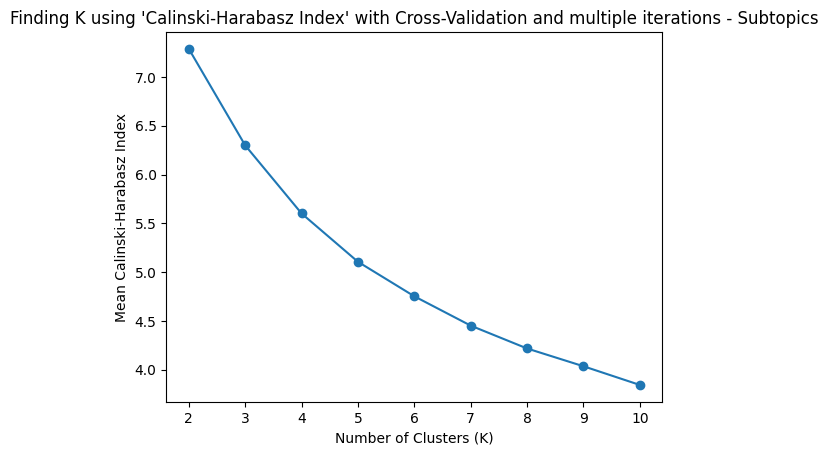

In [52]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Calinski-Harabasz index for each K in each iteration
calinski_harabasz_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Calinski-Harabasz index for each K in this iteration
    calinski_harabasz_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(subtopics): # Loop over each split
        X_train = subtopics.iloc[train_index] # Get the training data for this split

        # Calculate the Calinski-Harabasz index of each K [for this split]
        calinski_harabasz_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = calinski_harabasz_score(X_train, labels) # Calculate the Calinski-Harabasz index of this K [for this split]
            calinski_harabasz_k.append(score) # Store the Calinski-Harabasz index of each K [for this split]

        # Store the Calinski-Harabasz index of each K, each split [for this iteration]
        calinski_harabasz_iteration.append(calinski_harabasz_k) 

    # Store the Calinski-Harabasz index of each K, each split, each iteration
    calinski_harabasz_iterations.append(calinski_harabasz_iteration)

# Calculate the mean Calinski-Harabasz index for each K across all iterations and splits
calinski_harabasz_mean = np.mean(calinski_harabasz_iterations, axis=0) # Calculate the mean Calinski-Harabasz index across all iterations
calinski_harabasz_mean = np.mean(calinski_harabasz_mean, axis=0) # Calculate the mean Calinski-Harabasz index across all splits

# Plot the Calinski-Harabasz index curve
plt.plot(range(2, max_clusters + 1), calinski_harabasz_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Calinski-Harabasz Index')
plt.title("Finding K using 'Calinski-Harabasz Index' with Cross-Validation and multiple iterations - Subtopics")
plt.show()

### GridSearchCV (8)

In [53]:
#Define the parameter values to search
#param_grid = {
#    'n_clusters': [3],  # Número de clústeres
#    'init': ['k-means++', 'random'],  # Método de inicialización de centroides
#    'n_init': ['auto', 'warn', 5, 10, 20, 50],  # Número de veces que se ejecuta el algoritmo con diferentes centroides
#    'max_iter': [150, 250, 300, 350, 450],  # Número máximo de iteraciones
#    'tol': [0.001, 0.0001, 0.00001],  # Tolerancia para el criterio de parada
#    'random_state': [42],  # Semilla para el generador de números aleatorios
#    'copy_x': [True, False],  # Si se copian los datos de entrada
#    'algorithm': ['elkan', 'lloyd']  # Algoritmo utilizado para el cálculo de los centroides
#}

In [54]:
# Build a instance of K-means
#kmeans = KMeans()
#
## Build a GridSearchCV instance with the model, the dictionary of parameters and the cross-validation strategy
#cv = KFold(n_splits=15, shuffle=True, random_state=42)  # Ejemplo de validación cruzada con 5 divisiones
#grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=cv)
## Adjust the model using GridSearch
#grid_search.fit(subtopics)
#
## Obtain the best parameters and the best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

###########################################################################################

#Best Parameters: {'algorithm': 'elkan', 'init': 'random', 'max_iter': 180, 'n_clusters': 8, 'n_init': 30}
#Best Score: -121.18898777041359

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 150, 'n_clusters': 3, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -83.54060493253198

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 3, 'n_init': 'auto', 'random_state': 42, 'tol': 1e-05}
#Best Score: -83.54060493253198

#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 180, 'n_clusters': 3, 'n_init': 'auto', 'random_state': 42, 'tol': 0.0}
#Best Score: -84.01042029590806

## 3.2. Fit K-means

En el caso del algoritmo K-means, no es necesario realizar validación cruzada o múltiples iteraciones, ya que el K-means es un algoritmo de aprendizaje no supervisado que busca agrupar los datos en K grupos predefinidos. A diferencia de los modelos supervisados como XGBoost o SVM, el K-means no tiene parámetros que se ajusten durante el entrenamiento y, por lo tanto, no necesita validación cruzada ni múltiples iteraciones.

El K-means es un algoritmo determinístico y, dado un número de clusters K y unas condiciones iniciales, siempre convergerá al mismo resultado. La inicialización de los centroides puede afectar los resultados, pero una vez que se fijan los centroides iniciales, el algoritmo encontrará los clusters correspondientes.

cluster_labels
1    56
2    49
0    48
Name: count, dtype: int64

Inertia: 1184.6683673469388

N_iter: 7


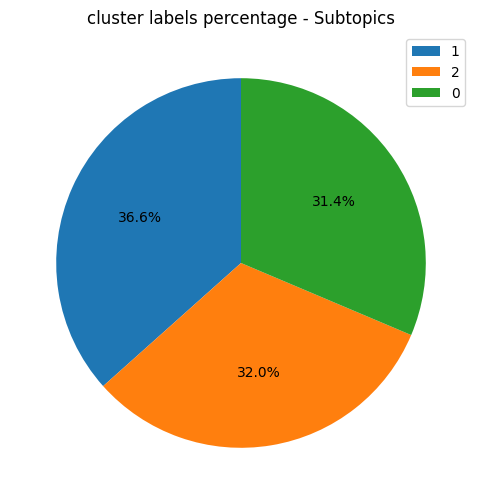

In [55]:
# Make the clusterization with the optimal number of clusters and the best parameters
kmeans = KMeans(algorithm='elkan', init='random', max_iter=180, n_clusters=3, n_init=30, random_state=42)
kmeans.fit(subtopics)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['cluster_labels'] = cluster_labels
# subtopics
subtopics_=subtopics.copy()
subtopics_['cluster_labels'] = cluster_labels
# topics
topics_=topics.copy()
topics_['cluster_labels'] = cluster_labels
# personalProfile
personalProfile_=personalProfile.copy()
personalProfile_['cluster_labels'] = cluster_labels
# save labels
labels_subtopics=encuesta_.copy()
labels_subtopics['cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster labels percentage - Subtopics',figsize=(6,6))
plt.ylabel('')
plt.show()

## 3.3. Analysis

Corrección de Bonferroni:
- Es una corrección conservadora que ajusta el valor crítico para cada prueba individual dividiendo el nivel de significancia original (α) por el número total de pruebas (m).
- Asegura que la probabilidad global de cometer un error de tipo I (rechazar incorrectamente la hipótesis nula) se mantenga bajo control, pero puede ser demasiado estricta y resultar en una pérdida de poder estadístico.

Corrección de Holm-Bonferroni:
- Es una corrección secuencial que ordena los p-valores de menor a mayor.
- Luego, se compara cada p-valor con su correspondiente nivel de significancia ajustado según el orden, siendo el nivel de significancia ajustado para el i-ésimo p-valor igual a α/(m - i + 1), donde m es el número total de pruebas y i es el índice del p-valor en la lista ordenada.
- Detiene el procedimiento de ajuste en el primer p-valor que no cumple con la condición para rechazar la hipótesis nula, manteniendo el control del error de tipo I.

Corrección de Benjamini-Hochberg:
- Es una corrección menos conservadora que la corrección de Bonferroni y Holm-Bonferroni.
- Ordena los p-valores de menor a mayor al igual que la corrección de Holm-Bonferroni.
- Luego, se compara cada p-valor con su correspondiente nivel de significancia ajustado según el orden, siendo el nivel de significancia ajustado para el i-ésimo p-valor igual a (i/m) * α, donde m es el número total de pruebas y i es el índice del p-valor en la lista ordenada.
- A diferencia de Holm-Bonferroni, no detiene el procedimiento en el primer p-valor que no cumple con la condición. En cambio, aplica el ajuste a todos los p-valores y controla el error de tipo I de manera más flexible.

En resumen, las tres correcciones son métodos para controlar el error de tipo I en el contexto de múltiples pruebas de hipótesis, pero difieren en su enfoque y grado de conservatismo. La corrección de Bonferroni es más conservadora, mientras que las correcciones de Holm-Bonferroni y Benjamini-Hochberg son menos conservadoras y se ajustan de manera secuencial y flexible, respectivamente. La elección de una corrección dependerá del contexto y del equilibrio entre el control del error y el poder estadístico deseado.

### Sutopics

#### Bonferroni --> "subtopics_analysis_bonferroni"

Al establecer el parámetro correction=True en la función chi2_contingency, se aplicará la corrección de Yates automáticamente. Esto ajustará los p-valores para tener en cuenta los valores cero en las tablas de contingencia.

#If correction=True, and the degrees of freedom is 1, apply Yates’ correction for continuity. The effect of the correction is to adjust each observed value by 0.5 towards the corresponding expected value.

In [56]:
# Prepare the data for the hipotesis test
X = subtopics_.drop('cluster_labels', axis=1)  # P redictor variables
y = subtopics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [57]:
contingency_table

cluster_labels       0   1   2
vices_Proposed_eat            
0                   48  54  48
1                    0   2   1

Cuando se realizan múltiples pruebas de hipótesis simultáneamente, existe una mayor probabilidad de obtener falsos positivos (errores de tipo I), es decir, concluir incorrectamente que hay una diferencia significativa cuando en realidad no la hay.

Así que a continuación corregimos los valores p. La corrección de valores p ayuda a controlar este problema al ajustar los valores p para tener en cuenta el número de pruebas realizadas. Uno de los métodos comunes para la corrección es el método de Bonferroni. La corrección de Bonferroni es una técnica que ayuda a controlar este problema ajustando el valor crítico para cada prueba individual para mantener el nivel global de significancia

El método de Bonferroni establece un umbral de significancia más estricto dividiendo el umbral original (por ejemplo, 0.05) por el número de pruebas realizadas. Esto reduce el riesgo de obtener falsos positivos y ayuda a garantizar que las diferencias significativas observadas sean más confiables.

En el código, la función multipletests() de la biblioteca statsmodels se utiliza para aplicar la corrección de Bonferroni a los valores p obtenidos en las pruebas de hipótesis. Devuelve los valores p corregidos en p_values_corrected y las decisiones de rechazo (True o False) en reject.

El valor de "rejectionsH0" representa la fracción esperada de hipótesis nulas que se rechazarían por azar cuando se utiliza el método de corrección. En tu caso, el valor de 0.0009859231655185985 indica que aproximadamente el 0.0986% de las hipótesis nulas se rechazarían por azar. Esto significa que, en general, el método de corrección de Bonferroni utilizado es bastante conservador y controla de manera efectiva la tasa global de error tipo I.

El valor de "upperlLimitCI" se refiere al límite superior del intervalo de confianza de Benjamini-Hochberg para los p-valores corregidos. En tu caso, el valor de 0.0009615384615384616 indica el límite superior de este intervalo. Este valor puede ser útil si deseas tener una idea del rango de los p-valores corregidos después de la corrección de múltiples pruebas.

In [58]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False False False False False False False False False False  True False
  True False False False  True False False  True False False False  True
  True  True  True False False  True  True False False False  True False
 False False  True False  True False False False  True  True False False
 False False False False]

p_values_corrected: [1.00000000e+00 1.05575771e-01 1.00000000e+00 1.00000000e+00
 1.10341391e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.34935822e-03 1.00000000e+00
 9.17049962e-06 1.00000000e+00 8.86516797e-01 2.99265865e-01
 8.66876242e-03 1.00000000e+00 1.00000000e+00 5.83612798e-04
 6.32343818e-01 1.00000000e+00 1.00000000e+00 1.84060053e-13
 2.05841218e-06 1.04356108e-08 8.77961271e-09 1.00000000e+00
 1.00000000e+00 2.99423310e-02 1.26027446e-02 3.53239508e-01
 1.00000000e+00 1.00000000e+00 3.08791540e-05 1.00000000e+00
 7.64348541e-01 7.24235929e-01 4.09373453e-02 6.20038183e-02
 1.47813442e-02 1.00000000e+00 1.00000000e+

In [59]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Bonferroni correction
subtopics_analysis_bonferroni=subtopics_significance.drop(['p-value','Significant'], axis=1)
subtopics_analysis_bonferroni.rename(columns={'p-value_corrected':'p_value'}, inplace=True)

# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\4154452213.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable       p-value  p-value_corrected
10         social_networks  2.594920e-05       1.349358e-03
12            social_party  1.763558e-07       9.170500e-06
16         hobbies_culture  1.667070e-04       8.668762e-03
19      hobbies_outConfort  1.122332e-05       5.836128e-04
23       sport_leavingHome  3.539616e-15       1.840601e-13
24         sport_intensity  3.958485e-08       2.058412e-06
25           sport_passive  2.006848e-10       1.043561e-08
26              sport_type  1.688387e-10       8.779613e-09
29         sleep_timeGetUp  5.758141e-04       2.994233e-02
30               sleep_nap  2.423605e-04       1.260274e-02
34      food_watHaveIEaten  5.938299e-07       3.087915e-05
38     alienPerson_weekDay  7.872566e-04       4.093735e-02
40  alienPerson_sportsTeam  2.842566e-04       1.478134e-02
44               vices_sex  2.547777e-04       1.324844e-02
45            vices_coffee  1.202477e-05       6.252881e-04

Primero, se define la lista significant_variables que contiene los nombres de las variables que han mostrado diferencias significativas.

A continuación, se inicia un bucle for para iterar sobre cada variable en significant_variables.

Para cada variable, se crea una tabla de contingencia utilizando la función pd.crosstab(), que muestra la distribución de frecuencia de los grupos de la variable en relación con los clústeres.

Se obtiene una lista de los grupos presentes en la variable utilizando contingency_table.columns.tolist().

Se anidan dos bucles for para comparar cada par de grupos. El primer bucle itera sobre el índice i, que representa el grupo 1, y el segundo bucle itera sobre el índice j, que representa el grupo 2. Esto garantiza que se comparen todos los pares únicos de grupos.

Dentro de los bucles anidados, se seleccionan los nombres de los grupos group1 y group2 correspondientes a los índices i y j, respectivamente.

Se crea una nueva tabla de contingencia contingency_table_group que contiene solo los dos grupos seleccionados.

Se realiza la prueba de Chi-cuadrado utilizando chi2_contingency(). El resultado es el estadístico de Chi-cuadrado chi2, el p-valor p y otros valores relacionados que no son necesarios en este caso.

Se verifica si el p-valor es significativo, es decir, si es menor que el umbral de significancia establecido. Si lo es, se considera que hay diferencias significativas entre los grupos y se guarda la información de la variable, los dos grupos y el p-valor en la lista group_differences.

Después de finalizar los bucles, se crea un DataFrame group_differences_df a partir de la lista group_differences y se asignan nombres de columnas adecuados.

Finalmente, se imprime el DataFrame group_differences_df, que muestra las diferencias significativas entre grupos para cada variable.

In [60]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
#group_differences_df.to_excel("group_differences_subtopics.xlsx", index=False)
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
                  Variable  Group X  Group Y       p-value
0          social_networks        0        2  4.792920e-05
1          social_networks        1        2  9.058326e-03
2             social_party        0        2  1.836745e-06
3             social_party        1        2  9.785914e-06
4          hobbies_culture        0        2  3.721385e-04
5          hobbies_culture        1        2  9.100482e-04
6       hobbies_outConfort        0        1  2.382292e-02
7       hobbies_outConfort        0        2  3.291980e-02
8       hobbies_outConfort        1        2  4.789491e-06
9        sport_leavingHome        0        1  6.239844e-12
10       sport_leavingHome        0        2  3.516597e-08
11         sport_intensity        0        1  2.064261e-08
12         sport_intensity        0        2  6.080208e-03
13         sport_intensity        1        2  4.218749e-03
14           sport_passive        0        1  8.210230e-07
15           sp

In [61]:
# Define a list to store the aggregation results
aggregation_results = []

# Iterate over the columns and apply the aggregation functions separately
for column in encuesta_.columns:
    column_aggregations = encuesta_.groupby('cluster_labels')[column].agg([
        ('sum', 'sum'),
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ])
    column_aggregations.columns = [f"{column}_{agg}" for agg in column_aggregations.columns]
    aggregation_results.append(column_aggregations)

# Concatenate the results into a single DataFrame
cluster_agg = pd.concat(aggregation_results, axis=1)

El código recorre las variables significativas, extrae el género de cada variable y luego genera gráficos de barras para las medias de las variables de cada género en el DataFrame cluster_agg. Esto automatiza el proceso de generación de gráficos para los géneros cuyas variables están marcadas como significativas.

Se define una lista llamada significant_variables para almacenar las variables significativas extraídas de subtopics_significance_true['Variable'].

Se crea un conjunto (genres) para almacenar los géneros únicos presentes en las variables significativas.

Se itera sobre cada variable en significant_variables.

Dentro del bucle, se divide el nombre de la variable usando _ como separador, y se extrae el género utilizando variable.split('_')[0]. Esto se hace para obtener el género de cada variable.

El género se agrega al conjunto genres utilizando genres.add(genre). Esto asegura que solo se almacenen géneros únicos en el conjunto.

Después del bucle, se itera sobre cada género en genres.

Dentro del bucle, se filtran las columnas en el DataFrame cluster_agg utilizando cluster_agg.filter(regex=f'^{genre}'). Esto selecciona todas las columnas que comienzan con el nombre del género.

Luego, se filtran las columnas resultantes para seleccionar solo aquellas que tienen "mean" al final del nombre utilizando genre_columns.filter(regex='mean$'). Estas columnas representan las medias de las variables para cada clúster dentro de ese género.

Se verifica si hay columnas seleccionadas en el paso anterior utilizando genre_mean_columns.shape[1] > 0.

Si hay columnas seleccionadas, se genera un gráfico de barras utilizando genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6)). Esto muestra las medias de las variables para cada clúster en forma de gráfico de barras.

Finalmente, se agrega el título del gráfico, las etiquetas de los ejes x e y, y se muestra el gráfico utilizando plt.show().

In [62]:
# Make a table with the conclusions
results_S_subtopics=[
    ['0', '39.2', '<2', '>2', '>1', '<(1,2)', '<(1,2)', '>1', '<(1,2)', '>(1,2)', '<(1,2)', '>2', '>2', '<1','>1'],
    ['1', '32', '<2', '>2', '<0', '>0', '>0', '<(0,2)', '>(0,2)', '<0', '>(0,2)', '>2', '>2', '>(0,2)','<0'],
    ['2', '28.8', '>(0,1)', '<(0,1)', '', '>0', '>0', '>1', '>0, <1', '<0', '>0, <1', '<(0,1)', '<(0,1)', '<1', ''],
]
results_S_subtopics_columns=['k', 'proportion', 'social_networks', 'social_party', 'hobbies_reading', 'hobbies_nature', 'hobbies_outConfort', 'sport_leavingHome', 'sport_intensity', 'sport_passive', 'sport_type', 'sleep_screens', 'food_watHaveIEaten', 'vices_sex', 'vices_coffee']
results_S_subtopics=pd.DataFrame(results_S_subtopics, columns=results_S_subtopics_columns)
results_S_subtopics

k proportion social_networks social_party hobbies_reading hobbies_nature   
0  0       39.2              <2           >2              >1         <(1,2)  \
1  1         32              <2           >2              <0             >0   
2  2       28.8          >(0,1)       <(0,1)                             >0   

  hobbies_outConfort sport_leavingHome sport_intensity sport_passive   
0             <(1,2)                >1          <(1,2)        >(1,2)  \
1                 >0            <(0,2)          >(0,2)            <0   
2                 >0                >1          >0, <1            <0   

  sport_type sleep_screens food_watHaveIEaten vices_sex vices_coffee  
0     <(1,2)            >2                 >2        <1           >1  
1     >(0,2)            >2                 >2    >(0,2)           <0  
2     >0, <1        <(0,1)             <(0,1)        <1

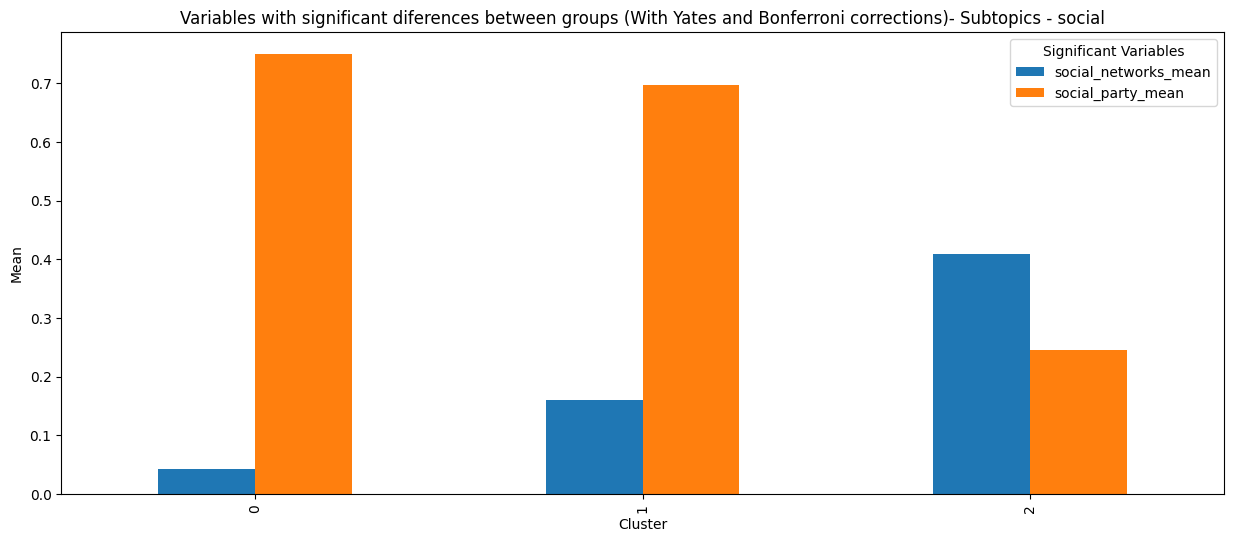

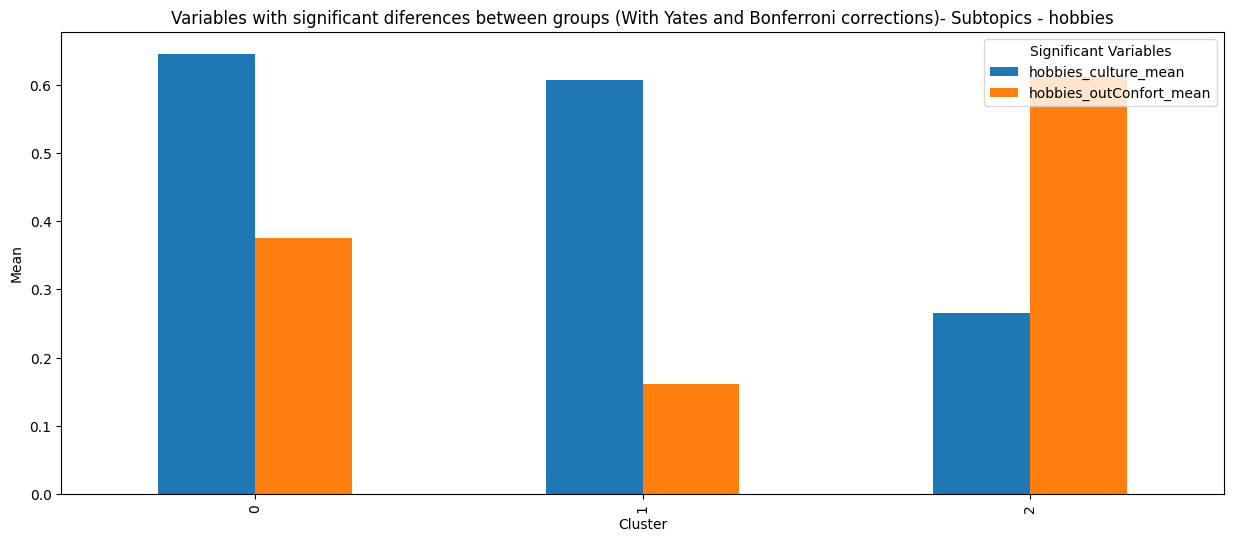

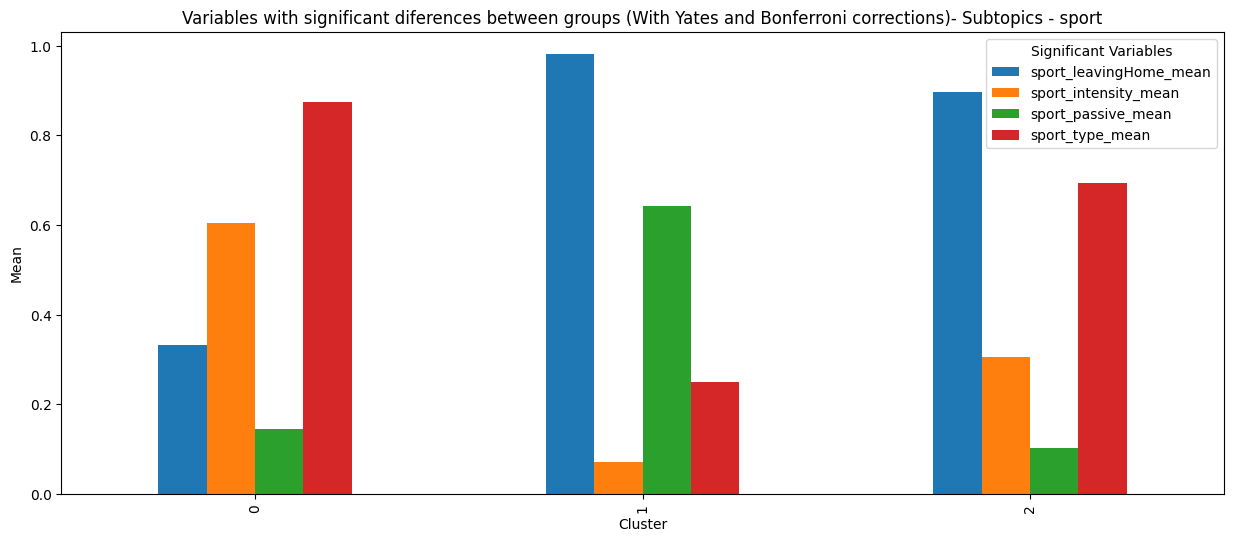

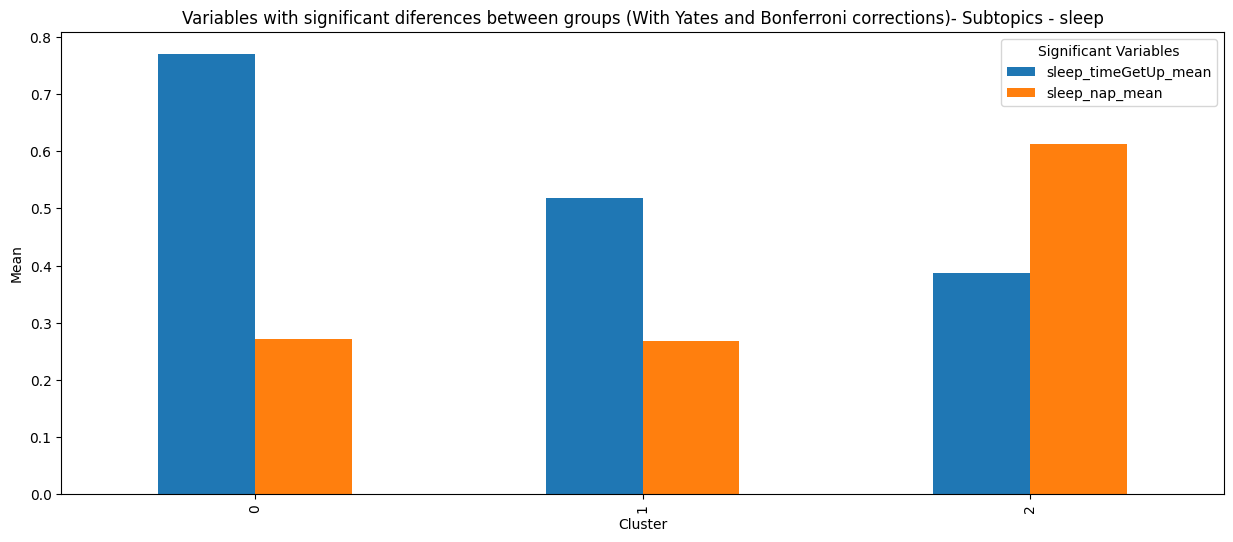

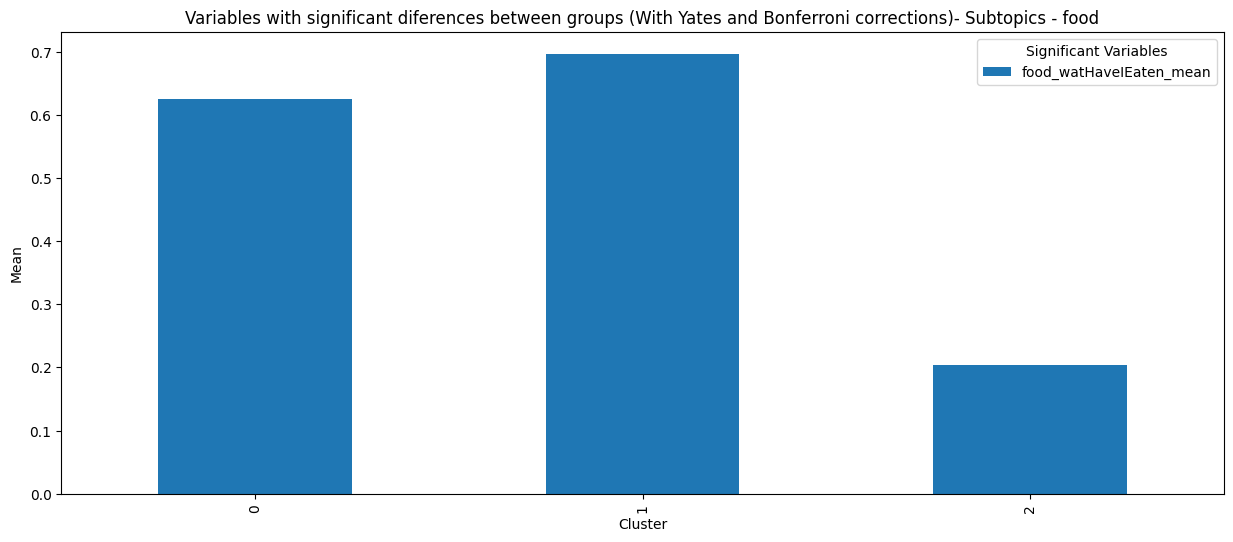

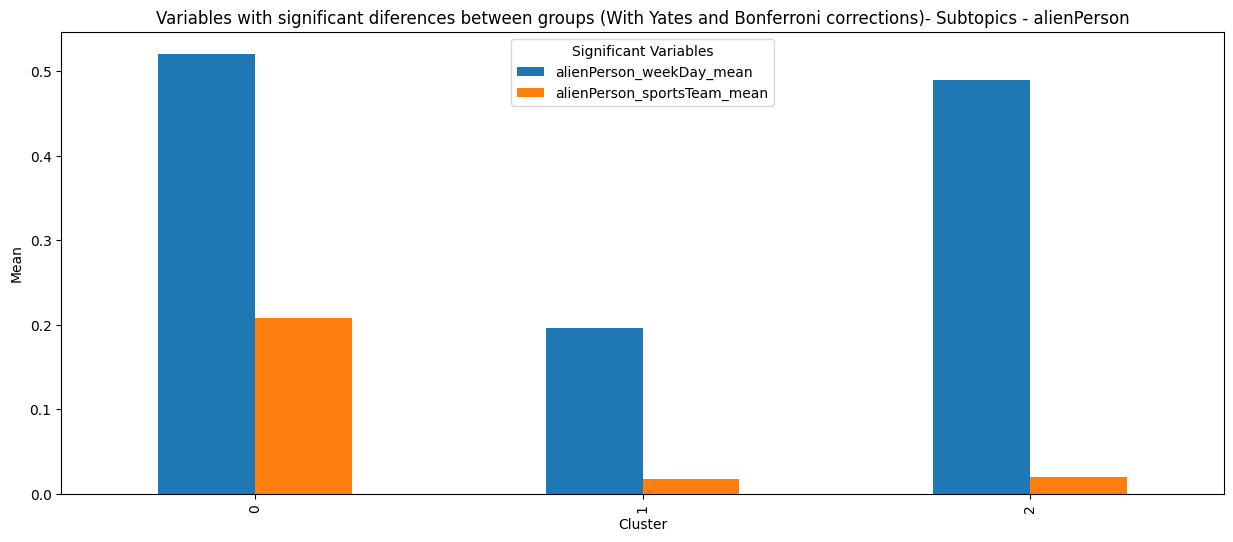

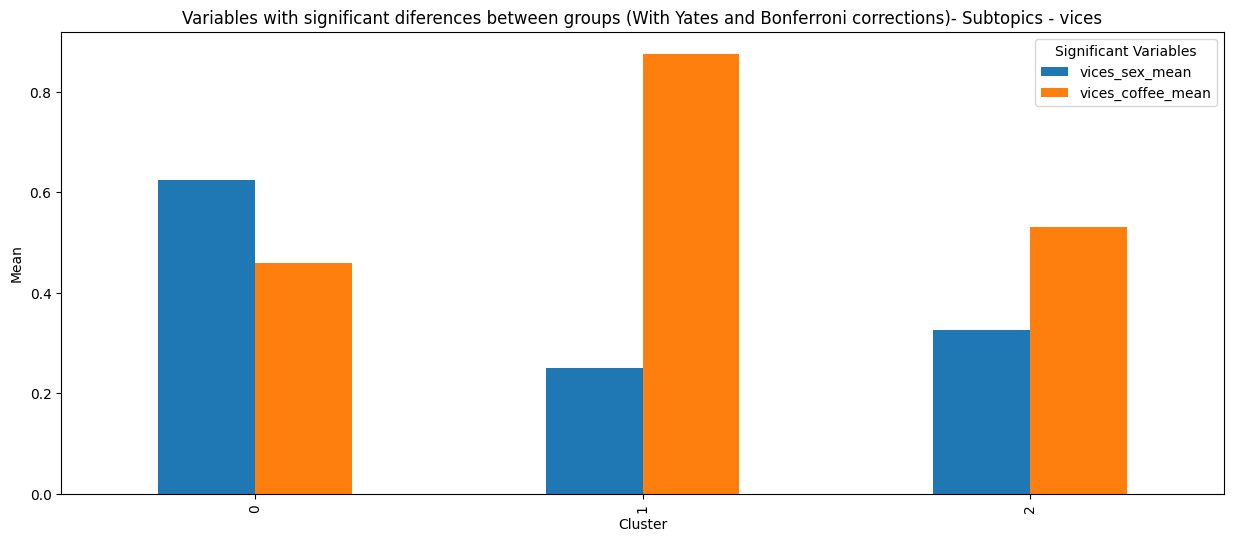

In [63]:
# Obtain the list of significant variables
#significant_variables = subtopics_significance_true['Variable'].tolist()

# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title=f'Variables with significant diferences between groups (With Yates and Bonferroni corrections)- Subtopics - {genre}', figsize=(15, 6))
            plt.xlabel('Cluster')
            plt.ylabel('Mean')
            plt.legend(title='Significant Variables')
            plt.show()

#### Holm-Bonferroni --> "subtopics_analysis_HBonferroni"

In [64]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='holm')

# Identification of significant variables
subtopics_significance_HBonferroni = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Holm-Bonferroni correction
subtopics_analysis_HBonferroni = subtopics_significance_HBonferroni.drop(['p-value', 'Significant'], axis=1)
subtopics_analysis_HBonferroni.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Benjamini-Hochberg --> "subtopics_analysis_bHochberg"

In [65]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')

# Identification of significant variables
subtopics_significance_bHochberg = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Benjamini-Hochberg correction
subtopics_analysis_bHochberg = subtopics_significance_bHochberg.drop(['p-value', 'Significant'], axis=1)
subtopics_analysis_bHochberg.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Mean 3 corrections --> "subtopics_analysis"

In [66]:
# Merge the results of the three corrections
subtopics_analysis=pd.merge(subtopics_analysis_bonferroni, subtopics_analysis_HBonferroni, on='Variable')
subtopics_analysis=pd.merge(subtopics_analysis, subtopics_analysis_bHochberg, on='Variable')

# Obtain the mean of significance of the three corrections
subtopics_analysis['p_value_mean'] = subtopics_analysis[['p_value_x', 'p_value_y', 'p_value']].mean(axis=1)

# Save the results
subtopics_analysis_=subtopics_analysis.copy()
subtopics_analysis_.sort_values(by='p_value_mean', inplace=True)
subtopics_analysis_.to_excel('subtopics_analysis_.xlsx', index=False)

# Drop the columns of the three corrections
subtopics_analysis.drop(['p_value_x', 'p_value_y', 'p_value'], axis=1, inplace=True)
print(subtopics_analysis.shape)
subtopics_analysis.head()

(52, 2)


Variable  p_value_mean
0       productiveTime_work      0.869281
1      productiveTime_study      0.061599
2     productiveTime_mental      0.724949
3    productiveTime_reading      0.905769
4  productiveTime_housework      0.063580

### Topics

In [67]:
# Prepare the data for the hipotesis test
X = topics_.drop('cluster_labels', axis=1)  # Predictor variables
y = topics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [68]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [ True False False False False False False False]

p_values_corrected: [8.89737395e-05 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 5.81142610e-01 1.00000000e+00 1.00000000e+00]

rejectionsH0: 0.006391150954545011

upperlLimitCI: 0.00625


In [69]:
# Identification of significant variables
topics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
topics_significance_true = topics_significance[topics_significance['Significant']]
topics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
topics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\4040270214.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topics_significance_true.drop('Significant', axis=1, inplace=True)


Variable   p-value  p-value_corrected
0  topics_sport  0.000011           0.000089

In [70]:
significant_variables = topics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
       Variable  Group X  Group Y   p-value
0  topics_sport        0        1  0.000013
1  topics_sport        1        2  0.003871


In [71]:
# Create a table with the conclusions
results_S_topics=[
    ['0', '39.2', '<(1,2)'],
    ['1', '32', '<0'],
    ['2', '28.8', '>0'],
]
results_S_topics_columns=['k', 'proportion', 'topics_sport']
results_S_topics=pd.DataFrame(results_S_topics, columns=results_S_topics_columns)
results_S_topics

k proportion topics_sport
0  0       39.2       <(1,2)
1  1         32           <0
2  2       28.8           >0

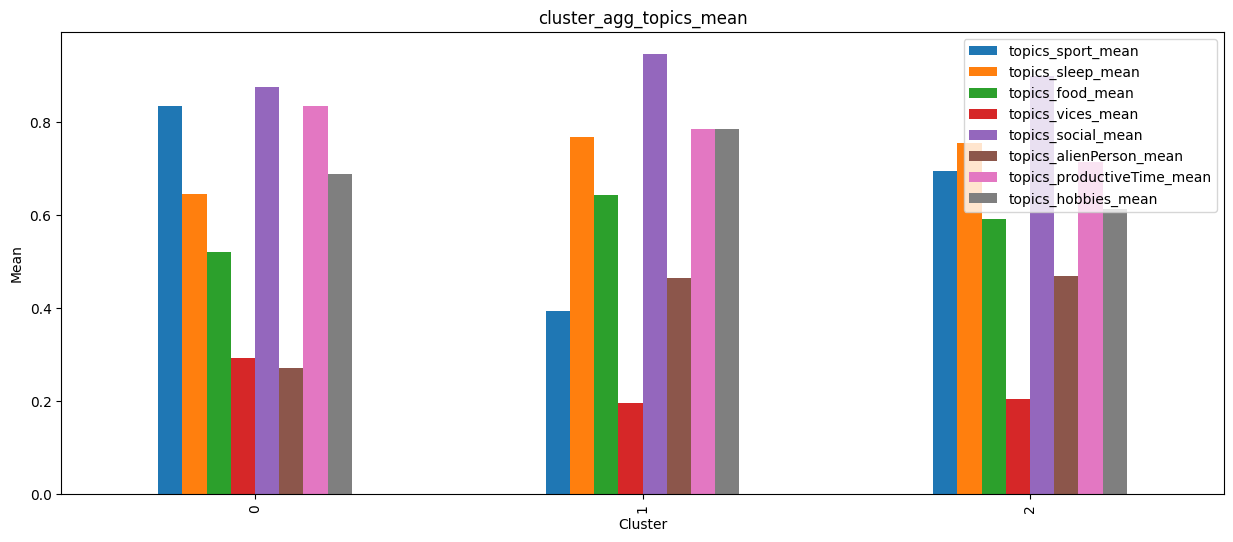

In [72]:
# Obtain the "genres" present in the significant variables
significant_variables = topics_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

### Personal Profile

In [73]:
# Prepare the data for the hipotesis test
X = personalProfile_.drop('cluster_labels', axis=1)  # Predictor variables
y = personalProfile_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [74]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [ True  True False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False]

p_values_corrected: [1.07840985e-02 1.00012099e-02 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 8.37797233e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 8.77142641e-01 3.28737706e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 7.17675495e-04 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]

rejectionsH0: 0.0014237991678133222

upperlLimitCI: 0.001388888888888889


In [75]:
# Identification of significant variables
personalProfile_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
personalProfile_significance_true = personalProfile_significance[personalProfile_significance['Significant']]
personalProfile_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
personalProfile_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\1804238380.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personalProfile_significance_true.drop('Significant', axis=1, inplace=True)


Variable   p-value  p-value_corrected
0          sex_Man  0.000300           0.010784
1        sex_Woman  0.000278           0.010001
22  aboutYou_sport  0.000020           0.000718

In [76]:
significant_variables = personalProfile_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
         Variable  Group X  Group Y   p-value
0         sex_Man        0        1  0.000556
1         sex_Man        1        2  0.001603
2       sex_Woman        0        1  0.000547
3       sex_Woman        1        2  0.001608
4  aboutYou_sport        0        1  0.000067
5  aboutYou_sport        1        2  0.000604


In [77]:
# Create a table with the conclusions
results_S_pprofile=[
    ['0', '39.2', '<(1,2)'],
    ['1', '32', '<0'],
    ['2', '28.8', '>0'],
]
results_S_pprofilepprofile_columns=['k', 'proportion', 'aboutYou_sport']
results_S_pprofile=pd.DataFrame(results_S_pprofile, columns=results_S_pprofilepprofile_columns)
results_S_pprofile

k proportion aboutYou_sport
0  0       39.2         <(1,2)
1  1         32             <0
2  2       28.8             >0

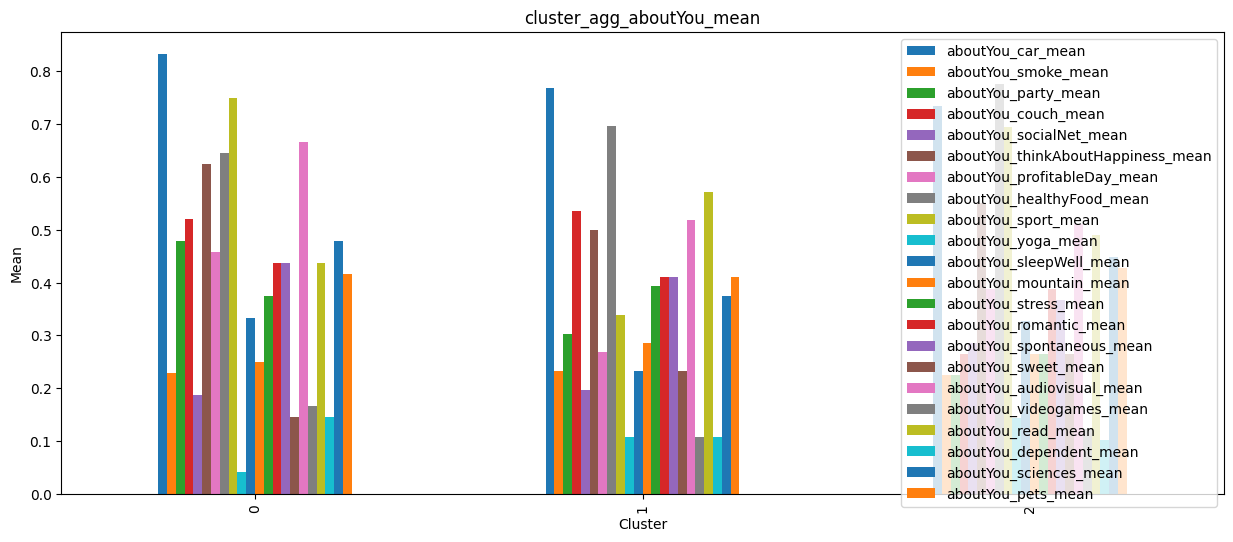

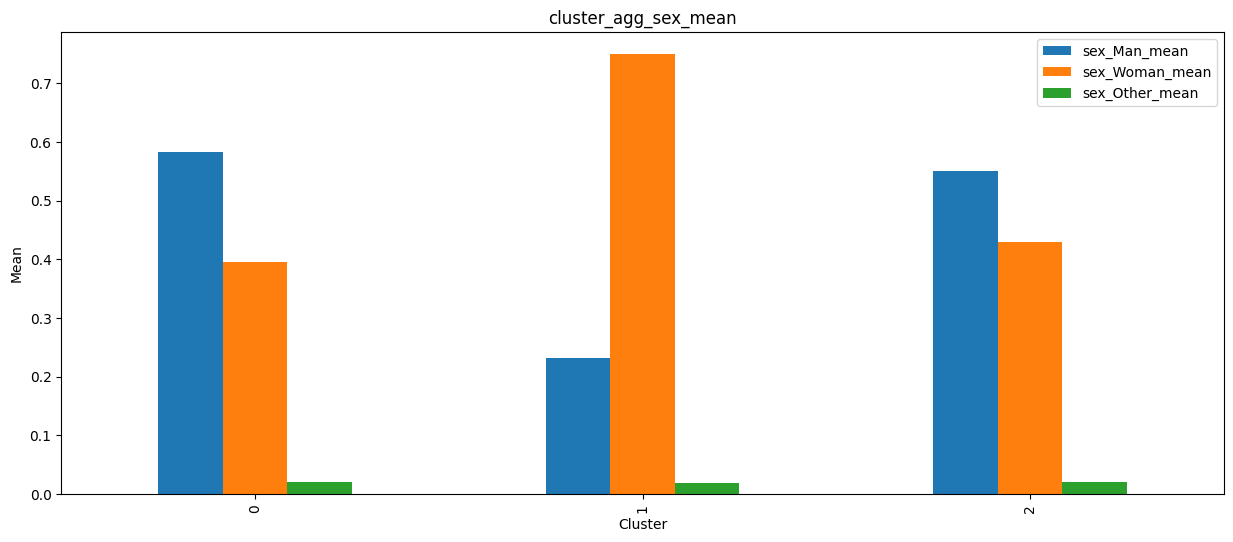

In [78]:
# Obtain the "genres" present in the significant variables
significant_variables = personalProfile_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

## 3.4. Random forest [0.8868258064516131 - 50 Iterations - 58s]

### Finding best parameters

En el código que proporcionaste, los "cv_scores" representan los 5 scores obtenidos en cada iteración de la validación cruzada para la mejor combinación de parámetros. Estos scores corresponden a la métrica de evaluación (en este caso, la precisión "accuracy") para cada fold.

La línea cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5) realiza la validación cruzada con el modelo entrenado utilizando la mejor combinación de parámetros encontrada por GridSearchCV. Aquí, grid_search.best_estimator_ representa el estimador (modelo) con los mejores parámetros encontrados.

Luego, cv_scores almacena los 5 scores obtenidos en cada iteración de la validación cruzada. La media de estos scores se calcula con mean_cv_score = cv_scores.mean(), lo que da como resultado el promedio de los scores.

Por lo tanto, en tu caso, el "Best score" impreso (0.8886021505376345) es el promedio de los 5 scores obtenidos en la validación cruzada para la mejor combinación de parámetros.

Si deseas encontrar la mejor combinación de parámetros para tu modelo, debes mirar el best_score, ya que este valor representa el promedio de los puntajes obtenidos durante la validación cruzada para la mejor combinación de parámetros.

El best_score te indica qué tan bien se desempeña el modelo utilizando la mejor combinación de parámetros encontrada en promedio a lo largo de todas las iteraciones de la validación cruzada. Es una medida del rendimiento general del modelo.

Por otro lado, el mean_cv_score es útil para tener una idea de cómo se desempeña el modelo en promedio en cada fold de la validación cruzada, pero no necesariamente indica cuál es la mejor combinación de parámetros.

En resumen, para encontrar la mejor combinación de parámetros, debes considerar el best_score, ya que refleja el rendimiento promedio del modelo con esa configuración específica de parámetros.

############################################################

In [79]:
# Split the data into training (X) and test (y) sets
X = subtopics_.drop('cluster_labels', axis=1)  # Eliminar la columna de etiquetas
y = subtopics_['cluster_labels']

In [80]:
#param_grid = {
#    'n_estimators': [50, 60, 70, 80, 100, 120],#The number of trees in the forest
#    'criterion': ['gini', 'entropy'],#The function to measure the quality of a split
#    'max_depth': [None],#The maximum depth of the tree
#    'min_samples_split': [2],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [3],#The minimum number of samples required to be at a leaf node
#    'max_features': ['log2'],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None],#Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
#    'min_impurity_decrease': [0.0, 0.001, 0.005],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
#    'bootstrap': [True],#If False, the whole dataset is used to build each tree.
#    'oob_score': [True, False],#Whether to use out-of-bag samples to estimate the generalization accuracy.
#    'n_jobs': [-1],#The number of jobs to run in parallel for both fit and predict.
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced_subsample'],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [81]:
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.93548387 0.83870968 0.96774194 0.83333333 0.9       ]
#Mean cross-validation score: 0.8950537634408603
#Best parameters: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
#Best score: 0.8950537634408603

#[0.93548387 0.90322581 1.         0.86666667 0.93333333]
#Mean cross-validation score: 0.927741935483871
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.927741935483871

#[0.93548387 0.90322581 1.         0.86666667 0.93333333]
#Mean cross-validation score: 0.927741935483871
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.927741935483871

#############################################################################################################

#[0.96774194 0.83870968 0.93548387 0.96666667 0.83333333]
#Mean cross-validation score: 0.9083870967741936
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9083870967741936

#[0.96774194 0.90322581 0.93548387 0.96666667 0.8       ]
#Mean cross-validation score: 0.9146236559139785
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 150, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9146236559139785

#[0.96774194 0.87096774 0.93548387 1.         0.86666667]
#Mean cross-validation score: 0.9281720430107526
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 125, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9281720430107526

#[0.96774194 0.87096774 0.93548387 1.         0.86666667]
#Mean cross-validation score: 0.9281720430107526
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 125, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9281720430107526

### Fitting and analyzing the model

En este código, se realiza un bucle para repetir el proceso de entrenamiento y evaluación en cada iteración. Dentro de ese bucle, se realiza una validación cruzada utilizando KFold para dividir los datos en conjuntos de entrenamiento y prueba en cada iteración. Luego, se entrena el modelo en el conjunto de entrenamiento, se obtiene la importancia de características y se realiza la predicción en el conjunto de prueba para calcular la precisión del modelo.

Después de completar todas las iteraciones, se calcula la media de la importancia de características y de la precisión del modelo en cada iteración. ("feature_importances_mean = np.mean(feature_importances_iteration, axis=0)" y "accuracy_mean = np.mean(accuracy_iteration)"). Luego, se calculan los pesos según la precisión del modelo y se utiliza np.average para calcular la importancia de características ponderada.

Finalmente, se crea el DataFrame "subtopics_RF" que contiene las características y su importancia ponderada.

Recuerda ajustar los parámetros num_iterations y num_splits según tus necesidades y preferencias. Además, puedes adaptar el código para utilizar otros algoritmos de clasificación si lo deseas.

In [82]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 15
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Random Forest model with the best parameters found
        rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)

        # Train the model
        rf.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(rf.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = rf.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)


# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
subtopics_RF = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_subtopics_RF = np.mean(accuracy_list)
accuracy_std_mean_subtopics_RF = np.mean(accuracy_std_list)
print("accuracy_mean_subtopics_RF:", accuracy_mean_subtopics_RF)
print("subtopics_RF.shape:",subtopics_RF.shape)
print("sum importance:",subtopics_RF['importance'].sum())
subtopics_RF.head()

#rf=RandomForestClassifier(class_weight='balanced', criterion='gini', max_depth=4, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.01, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_subtopics_RF x 50: 0.8632430107526882

#rf = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_subtopics_RF: 0.881741935483871
#accuracy_mean_subtopics_RF x 15: 0.8859498207885306
#accuracy_mean_subtopics_RF x 50: 0.8868258064516131

accuracy_mean_subtopics_RF: 0.8817204301075269
subtopics_RF.shape: (52, 2)
sum importance: 0.9999999999999998


characteristics  importance
0       productiveTime_work    0.005487
1      productiveTime_study    0.028470
2     productiveTime_mental    0.014532
3    productiveTime_reading    0.011829
4  productiveTime_housework    0.020856

In [83]:
accuracy_std

0.08292379422127161

In [84]:
accuracy_std_list

[0.03827956989247308,
 0.04313959197632632,
 0.05926282411137427,
 0.034793545662205064,
 0.042989241932794006,
 0.0633135226514655,
 0.04462352636333051,
 0.04396574203200212,
 0.025430959998442124,
 0.09839878889337379,
 0.06771428006917123,
 0.052560301273617195,
 0.0678923062249099,
 0.05926282411137427,
 0.08292379422127161]

In [85]:
accuracy_std_mean_subtopics_RF

0.05497005462760873

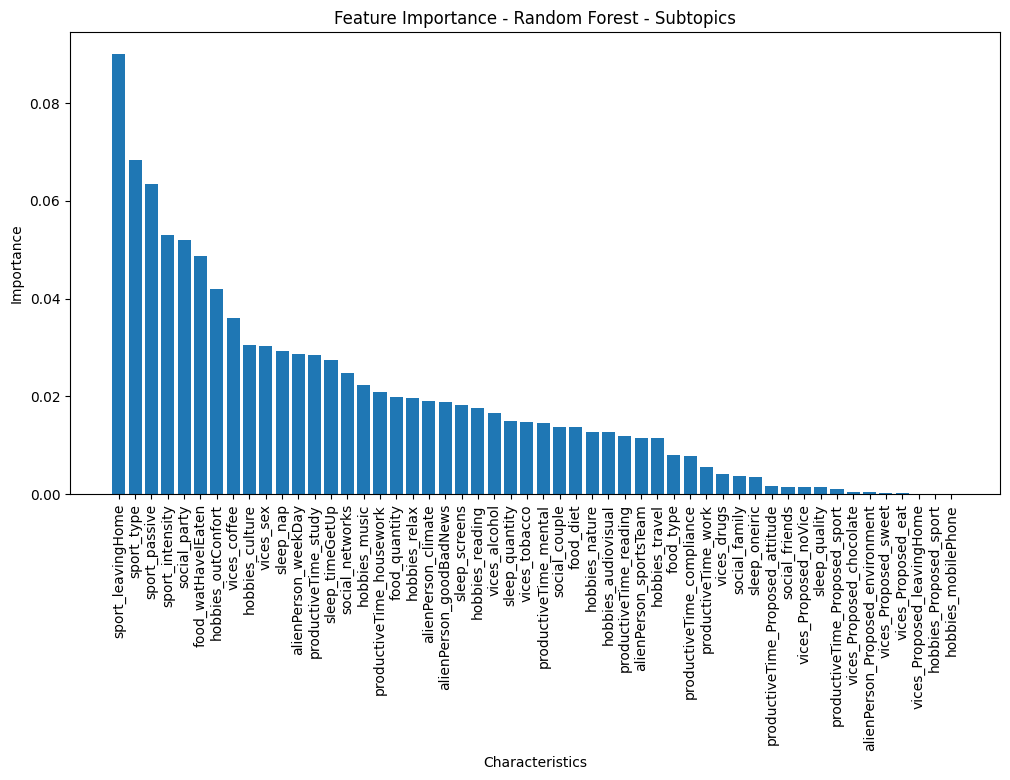

In [86]:
# Sort the DataFrame by descending importance
subtopics_RF_sorted = subtopics_RF.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(subtopics_RF_sorted['characteristics'], subtopics_RF_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest - Subtopics')
plt.show()

In [87]:
# Select the most important features
subtopics_RF_top = subtopics_RF_sorted.head(6)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
subtopics_RF_groupValues = subtopics_[['cluster_labels'] + subtopics_RF_top]

# Group by cluster and get feature values for each group
subtopics_RF_groupedValues = subtopics_RF_groupValues.groupby('cluster_labels').mean().reset_index()
subtopics_RF_groupedValues

cluster_labels  sport_leavingHome  sport_type  sport_passive   
0               0           0.333333    0.875000       0.145833  \
1               1           0.982143    0.250000       0.642857   
2               2           0.897959    0.693878       0.102041   

   sport_intensity  social_party  food_watHaveIEaten  
0         0.604167      0.750000            0.625000  
1         0.071429      0.696429            0.696429  
2         0.306122      0.244898            0.204082

### DecisionTreeClassifier

In [88]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],# The function to measure the quality of a split
#    'splitter': ['best', 'random'],# The strategy used to choose the split at each node
#    'max_depth': [None, 3, 5],# The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],# The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5],# The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.05, 0.01, 0.1],# The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],# The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],# Grow trees with max_leaf_nodes in best-first fashion
#    'min_impurity_decrease': [0.0, 0.05, 0.01, 0.1],# A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],# Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],# Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [89]:
#tree_model = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.90322581 0.64516129 0.90322581 0.7        0.8       ]
#Mean cross-validation score: 0.7903225806451613
#Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.01, 'random_state': 42, 'splitter': 'random'}
#Best score: 0.7903225806451613

#[0.87096774 0.70967742 0.90322581 0.73333333 0.8       ]
#Mean cross-validation score: 0.8034408602150538
#Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.005, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.005, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.8034408602150538

#x2 (another exact copy of combination params found)


- Se define el número de iteraciones (num_iterations) y el número de splits en la validación cruzada (num_splits). Estos parámetros te permiten controlar cuántas veces se repetirá el proceso de entrenamiento y evaluación.
- Se inicializan tres listas vacías: feature_importances_list, accuracy_list, y models_list. Estas listas se utilizarán para almacenar los resultados de importancia de características, precisión del modelo y los modelos generados en cada iteración, respectivamente.
- Se inicia un ciclo for que se repetirá num_iterations veces. Dentro de este ciclo, se realiza el proceso de entrenamiento y evaluación en cada iteración.
- Se utiliza KFold para dividir los datos en num_splits conjuntos de entrenamiento y prueba en cada iteración. Esto asegura que los modelos se entrenen y evalúen en diferentes particiones de los datos.
- Dentro del bucle KFold, se inicia otro ciclo for para iterar a través de las particiones de entrenamiento y prueba. En cada iteración, se entrena un modelo de árbol de decisión con los mejores hiperparámetros encontrados.
- Se almacenan las importancias de características y la precisión del modelo en listas temporales (feature_importances_iteration y accuracy_iteration, respectivamente) para cada partición.
- Se almacena el modelo entrenado en la lista models_iteration en cada partición.
- Después de completar todas las particiones de entrenamiento y prueba, se calcula la media de las importancias de características y la precisión del modelo para esta iteración y se almacenan en las listas principales (feature_importances_list y accuracy_list, respectivamente).
- Se almacenan los modelos generados en cada iteración en la lista models_list.
- Una vez que se completan todas las iteraciones, se encuentra el índice del mejor modelo basado en la mayor precisión utilizando np.argmax(accuracy_list).
- Se selecciona el mejor modelo utilizando el índice encontrado en el paso anterior y se almacena en la variable best_tree_model.
- Se exporta el mejor modelo de árbol de decisión en formato DOT utilizando export_graphviz y se crea el gráfico del árbol utilizando la biblioteca graphviz.
- Finalmente, se muestra el gráfico del árbol utilizando graph.view(), lo que abre una ventana emergente con la visualización del árbol.

En resumen, el código realiza múltiples iteraciones del proceso de entrenamiento y evaluación utilizando la validación cruzada y almacena los resultados de importancia de características y precisión del modelo en listas. Luego, selecciona el mejor modelo basado en la mayor precisión y grafica el árbol de decisión resultante de ese modelo. Esto te permite visualizar el mejor árbol de decisión entre todas las iteraciones realizadas.

In [90]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        tree_model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.005, min_samples_leaf=1, min_samples_split=6, min_weight_fraction_leaf=0.005, random_state=42, splitter='best')

        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Transformar los valores de y a strings
y_str = y.astype(str)

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("decision_tree_subtopics")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

'decision_tree_subtopics.pdf'

Cómo se interpreta el gráfico: importante saber que se trata de 1 arbol como los que ha heco rf, pero no son las conclusiones de entre todos ellos

sport_leavingHome ≤ 0.5: Esta es la condición que se evalúa en este nodo del árbol. Significa que si el valor de la característica "sport_leavingHome" es menor o igual a 0.5, se sigue por el camino izquierdo (hijo izquierdo), de lo contrario, se sigue por el camino derecho (hijo derecho) del árbol.

gini = 0.661: El índice de impureza de Gini es una medida de qué tan mezclados están los registros en el nodo. En este caso, el valor de Gini es 0.661, lo que indica una cierta impureza en el nodo, es decir, los registros no están completamente homogéneos en términos de su clasificación en los grupos/clústeres.

samples = 153: Este es el número de registros de la muestra que llegan a este nodo en particular.

value = [60, 44, 49]: Esta es la distribución de las clases o grupos en el nodo. Los valores [60, 44, 49] indican la cantidad de registros pertenecientes a cada grupo/clúster. En este caso, hay 60 registros en el grupo 0, 44 registros en el grupo 1 y 49 registros en el grupo 2.

class = 2: Esta es la clase mayoritaria en el nodo, es decir, el grupo/clúster al que pertenecen la mayoría de los registros en este nodo. En este caso, la clase mayoritaria es el grupo 2.

En resumen, este nodo del árbol de decisión divide los registros según la característica "sport_leavingHome" y proporciona información sobre la impureza de los registros en el nodo, el número de registros en el nodo, la distribución de las clases y la clase mayoritaria en el nodo.

## 3.5. GradientBoosting [0.9404587813620073 - 15 Iterations - 41s]

### Finding best parameters

In [91]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.2, 0.3],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [200, 500],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [4, 5, 7],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.05, 0.01],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_depth': [3, None],  # The maximum depth of the tree
#    'min_impurity_decrease': [0.0, 0.05, 0.01],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': ['log2'],  # The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],  # Grow trees with max_leaf_nodes in best-first fashion
#}

In [92]:
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 0.90322581 0.96774194 0.9        1.        ]
#Mean cross-validation score: 0.9477419354838709
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_features': 'log2', 'n_estimators': 50, 'random_state': 42, 'subsample': 0.5}
#Best score: 0.9477419354838709

#[0.96774194 0.93548387 1.         0.9        1.        ]
#Mean cross-validation score: 0.9606451612903225
#Best parameters: {'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9606451612903225

#[0.93548387 0.96774194 1.         0.93333333 0.96666667]
#Mean cross-validation score: 0.9606451612903226
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9606451612903226

#############################################################################################################

#[1.         0.90322581 0.87096774 0.93333333 0.93333333]
#Mean cross-validation score: 0.9281720430107528
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}
#Best score: 0.9281720430107528

#[1.         0.90322581 0.90322581 0.93333333 0.93333333]
#Mean cross-validation score: 0.9346236559139787
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}
#Best score: 0.9346236559139787

#[1.         0.90322581 0.90322581 0.93333333 0.93333333]
#Mean cross-validation score: 0.9346236559139787
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.9}
#Best score: 0.9346236559139787

### Fitting and analyzing the model

In [93]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 15
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Gradient Boosting model with the best parameters found
        gb= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=0.75)

        # Train the model
        gb.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(gb.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = gb.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
subtopics_GB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_subtopics_GB = np.mean(accuracy_list)
accuracy_std_mean_subtopics_GB = np.mean(accuracy_std_list)
print("accuracy_mean_subtopics_GB:", accuracy_mean_subtopics_GB)
print("subtopics_GB.shape:",subtopics_GB.shape)
print("sum importance:",subtopics_GB['importance'].sum())
subtopics_GB.head()

#gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
#accuracy_mean_subtopics_GB: 0.8310107526881719

#gb= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05, loss='log_loss', max_depth=3, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=34, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=0.9)
#accuracy_mean_subtopics_GB: 0.890258064516129

#gb= GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42, subsample=0.75)
#accuracy_mean_subtopics_GB: 0.9380860215053766

#gb= GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=500, random_state=42, subsample=0.75)
#accuracy_mean_subtopics_GB: 0.9406881720430109
#accuracy_mean_subtopics_GB x 15: 0.9404587813620073

accuracy_mean_subtopics_GB: 0.9042580645161291
subtopics_GB.shape: (52, 2)
sum importance: 1.0


characteristics  importance
0       productiveTime_work    0.004864
1      productiveTime_study    0.024137
2     productiveTime_mental    0.008944
3    productiveTime_reading    0.005297
4  productiveTime_housework    0.012815

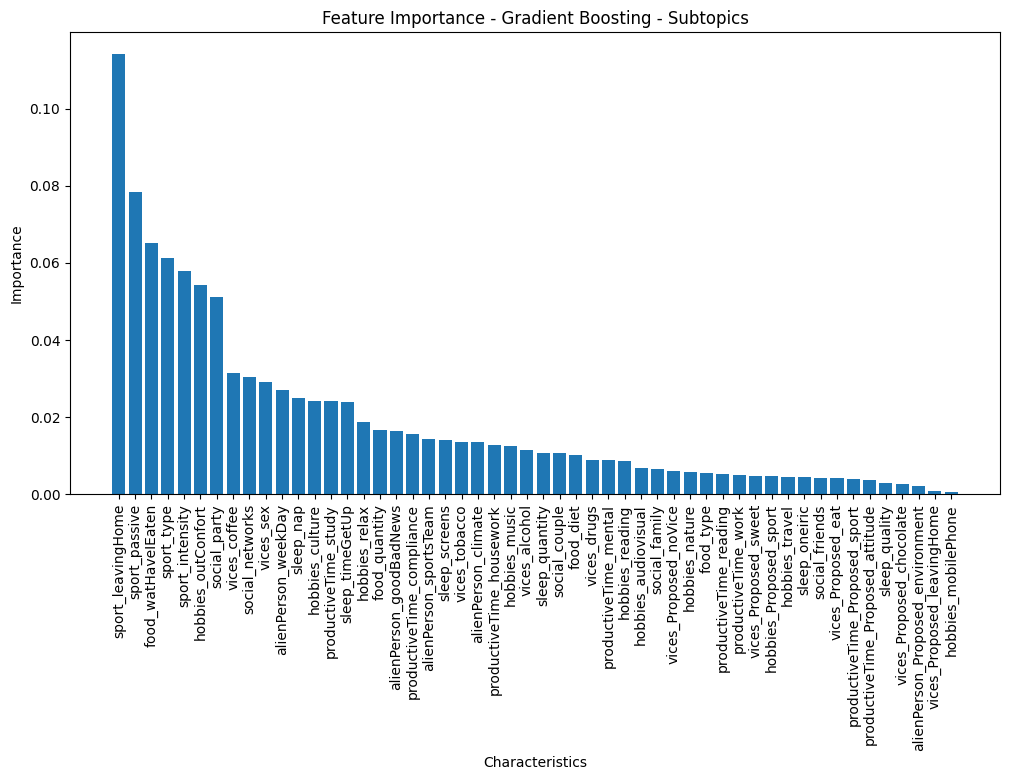

In [94]:
# Sort the DataFrame by descending importance
subtopics_GB_sorted = subtopics_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(subtopics_GB_sorted['characteristics'], subtopics_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting - Subtopics')
plt.show()

In [95]:
# Select the most important features
subtopics_GB_top = subtopics_GB_sorted.head(6)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
subtopics_GB_groupValues = subtopics_[['cluster_labels'] + subtopics_GB_top]

# Group by cluster and get feature values for each group
subtopics_GB_groupedValues = subtopics_GB_groupValues.groupby('cluster_labels').mean().reset_index()
subtopics_GB_groupedValues

cluster_labels  sport_leavingHome  sport_passive  food_watHaveIEaten   
0               0           0.333333       0.145833            0.625000  \
1               1           0.982143       0.642857            0.696429   
2               2           0.897959       0.102041            0.204082   

   sport_type  sport_intensity  hobbies_outConfort  
0    0.875000         0.604167            0.375000  
1    0.250000         0.071429            0.160714  
2    0.693878         0.306122            0.612245

## 3.6. SVM [0.9486917204301076 - 2000 Iterations - 28s]
Best model, with less computational cost, able to handle 2000 iterations with similar time as other models with 10 iterations. By the way, its accuracy for 10 Iterations = [0.954967741935484]

### Finding best parameters

In [96]:
#param_grid = {
#    'C': [1, 2, 5],  # Inverse of regularization strength
#    'kernel': ['linear'],  # Specifies the kernel type to be used in the algorithm
#    'degree': [2, 3, 5],  # Degree of the polynomial kernel function ('poly')
#    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#    'coef0': [0.0, 0.05, 0.1],  # Independent term in kernel function
#    'shrinking': [True, False],  # Whether to use the shrinking heuristic
#    'probability': [True, False],  # Whether to enable probability estimates
#    'tol': [0.00001, 0.0001, 0.001],  # Tolerance for stopping criterion
#    'cache_size': [200],  # Specify the size of the kernel cache (in MB)
#    'class_weight': ['balanced', None],  # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#    'max_iter': [-1],  # Hard limit on iterations within solver, or -1 for no limit
#    'decision_function_shape': ['ovo', 'ovr'],  # Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one ('ovo') decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)
#    'break_ties': [False],  # If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned
#    'random_state': [42],  # Controls the pseudo random number generation for shuffling the data for probability estimates
#}

In [97]:
#svc = SVC()
#grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 0.87096774 1.         0.96666667 0.9       ]
#Mean cross-validation score: 0.9410752688172044
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 1000, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.0001}
#Best score: 0.9410752688172044

#[0.96774194 0.87096774 1.         0.96666667 0.9       ]
#Mean cross-validation score: 0.9410752688172044
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#Best score: 0.9410752688172044

#############################################################################################################

#[0.90322581 0.77419355 0.77419355 0.8        0.83333333]
#Mean cross-validation score: 0.8169892473118278
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.0001}
#Best score: 0.8169892473118278

#[0.90322581 0.77419355 0.77419355 0.8        0.83333333]
#Mean cross-validation score: 0.8169892473118278
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#Best score: 0.8169892473118278

### Fitting and analyzing the model

In [98]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 2000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a SVM model with the best parameters found
        svm = SVC(kernel='linear', C=1, random_state=42)

        # Train the model
        svm.fit(X_train, y_train)
        
        # Obtaining the coefficients of the characteristics as a measure of importance
        feature_importances_iteration.append(np.abs(svm.coef_[0]))
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = svm.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)

    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Normalize the weighted feature importances to sum up to 1
feature_importances_normalized = feature_importances_weighted / np.sum(np.abs(feature_importances_weighted))

# Build the final dataset with the features and their importance
subtopics_SVM = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_normalized})

# Results
accuracy_mean_subtopics_SVM = np.mean(accuracy_list)
accuracy_std_mean_subtopics_SVM = np.mean(accuracy_std_list)
print("accuracy_mean_subtopics_SVM:", accuracy_mean_subtopics_SVM)
print("subtopics_SVM.shape:",subtopics_SVM.shape)
print("sum importance:",subtopics_SVM['importance'].sum())
subtopics_SVM.head()

#svm= SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=1000, probability=True, random_state=42, shrinking=True, tol=0.0001)
#accuracy_mean_subtopics_SVM: 0.954967741935484

#svm= SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.00001)
#accuracy_mean_subtopics_SVM: 0.954967741935484
#accuracy_mean_subtopics_SVM x 500: 0.9480593548387097
#accuracy_mean_subtopics_SVM x 750: 0.9486904659498209
#accuracy_mean_subtopics_SVM x 1000: 0.9481877419354839

#svm = SVC(kernel='linear', C=1.0, random_state=42)
#accuracy_mean_subtopics_SVM: 0.954967741935484
#accuracy_mean_subtopics_SVM x 1000: 0.9482475268817204
#accuracy_mean_subtopics_SVM x 2000: 0.9486917204301076


accuracy_mean_subtopics_SVM: 0.8891262365591398
subtopics_SVM.shape: (52, 2)
sum importance: 1.0


characteristics  importance
0       productiveTime_work    0.013023
1      productiveTime_study    0.023221
2     productiveTime_mental    0.027770
3    productiveTime_reading    0.016244
4  productiveTime_housework    0.028357

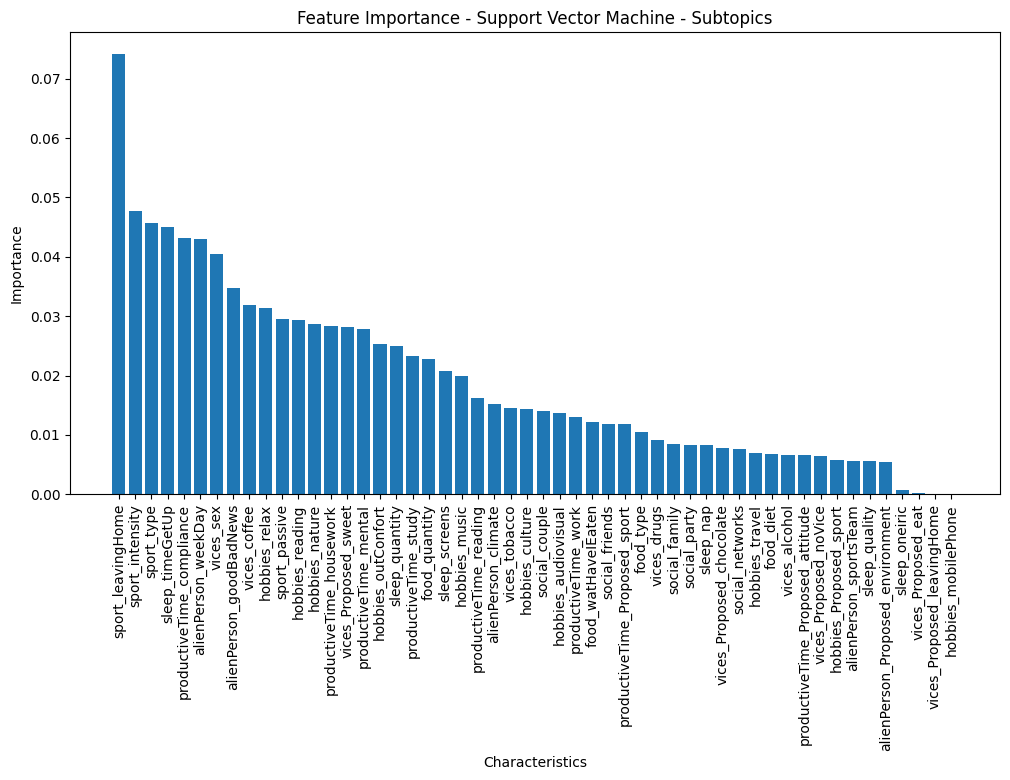

In [99]:
# Sort the DataFrame by descending importance
subtopics_SVM_sorted = subtopics_SVM.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(subtopics_SVM_sorted['characteristics'], subtopics_SVM_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Support Vector Machine - Subtopics')
plt.show()

In [100]:
# Select the most important features
subtopics_SVM_top = subtopics_SVM_sorted.head(4)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
subtopics_SVM_groupValues = subtopics_[['cluster_labels'] + subtopics_SVM_top]

# Group by cluster and get feature values for each group
subtopics_SVM_groupedValues = subtopics_SVM_groupValues.groupby('cluster_labels').mean().reset_index()
subtopics_SVM_groupedValues

cluster_labels  sport_leavingHome  sport_intensity  sport_type   
0               0           0.333333         0.604167    0.875000  \
1               1           0.982143         0.071429    0.250000   
2               2           0.897959         0.306122    0.693878   

   sleep_timeGetUp  
0         0.770833  
1         0.517857  
2         0.387755

## 3.7. XGBOOST [0.9264946236559141 - 20 Iterations - 31s]

### Finding best parameters

In [101]:
#param_grid = {
#    'learning_rate': [0.2, 0.25],
#    'n_estimators': [500],
#    'max_depth': [2, 3, None],
#    'min_child_weight': [1],
#    'subsample': [0.6, 0.7, 0.8],
#    'colsample_bytree': [0.8, 0.9, 0.95],
#    'gamma': [0, 0.0001, 0.001],
#    'reg_alpha': [0.1],
#    'reg_lambda': [0.005, 0.01, 0.02]
#}

In [102]:
#xgb_model = xgb.XGBClassifier()
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)
#
#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)
#
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 0.93548387 1.         0.9        0.9       ]
#Mean cross-validation score: 0.9406451612903226
#Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'subsample': 0.7}
#Best score: 0.9406451612903226

#[0.90322581 0.93548387 1.         0.9        1.        ]
#Mean cross-validation score: 0.9477419354838709
#Best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 0.7}
#Best score: 0.9477419354838709

#[0.90322581 0.93548387 1.         0.9        1.        ]
#Mean cross-validation score: 0.9477419354838709
#Best parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.005, 'subsample': 0.7}
#Best score: 0.9477419354838709

### Fitting and analyzing the model

In [103]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 20
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a XGBoost model with the best parameters found
        xgb_model = xgb.XGBClassifier(colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.005, subsample=0.7)
        
        # Train the model
        xgb_model.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(xgb_model.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = xgb_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
subtopics_XGB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_subtopics_XGB = np.mean(accuracy_list)
accuracy_std_mean_subtopics_XGB = np.mean(accuracy_std_list)
print("accuracy_mean_subtopics_XGB:", accuracy_mean_subtopics_XGB)
print("subtopics_XGB.shape:",subtopics_XGB.shape)
print("sum importance:",subtopics_XGB['importance'].sum())
subtopics_XGB.head()

#xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
#accuracy_mean_subtopics_XGB: 0.8335913978494623

#xgb_model = xgb.XGBClassifier(colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.005, subsample=0.7)
#accuracy_mean_subtopics_XGB: 0.9242795698924731
#accuracy_mean_subtopics_XGB x 20: 0.9264946236559141

accuracy_mean_subtopics_XGB: 0.9043548387096774
subtopics_XGB.shape: (52, 2)
sum importance: 1.0000000007107173


characteristics  importance
0       productiveTime_work    0.017312
1      productiveTime_study    0.021171
2     productiveTime_mental    0.005689
3    productiveTime_reading    0.002131
4  productiveTime_housework    0.043552

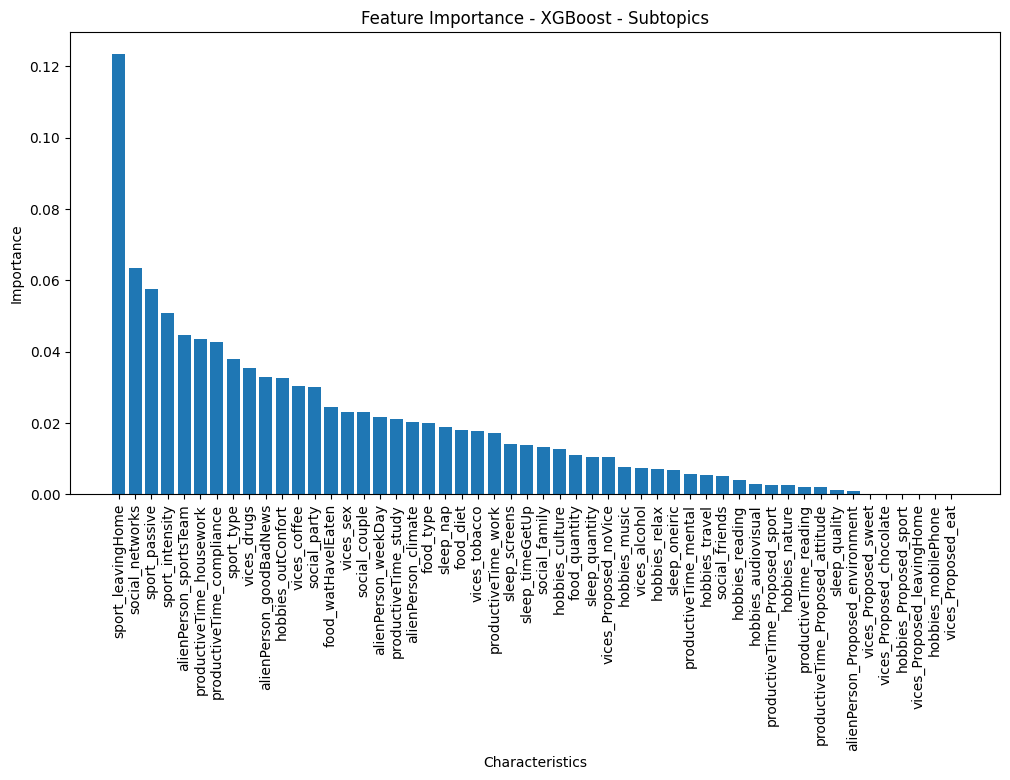

In [104]:
# Sort the DataFrame by descending importance
subtopics_XGB_sorted = subtopics_XGB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(subtopics_XGB_sorted['characteristics'], subtopics_XGB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost - Subtopics')
plt.show()

In [105]:
# Select the most important features
subtopics_XGB_top = subtopics_XGB_sorted.head(3)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
subtopics_XGB_groupValues = subtopics_[['cluster_labels'] + subtopics_XGB_top]

# Group by cluster and get feature values for each group
subtopics_XGB_groupedValues = subtopics_XGB_groupValues.groupby('cluster_labels').mean().reset_index()
subtopics_XGB_groupedValues

cluster_labels  sport_leavingHome  social_networks  sport_passive
0               0           0.333333         0.041667       0.145833
1               1           0.982143         0.160714       0.642857
2               2           0.897959         0.408163       0.102041

## 3.8 Ensamble

In [106]:
# List of datasets and accuracy of each model
datasets = [subtopics_RF, subtopics_GB, subtopics_SVM, subtopics_XGB]
accuracies = [accuracy_mean_subtopics_RF, accuracy_mean_subtopics_GB, accuracy_mean_subtopics_SVM, accuracy_mean_subtopics_XGB]

# Calculate the weights according to the model accuracy
weights = [accuracy / sum(accuracies) for accuracy in accuracies]

# Assemble the weighted feature importances
feature_importances_weighted = np.zeros(len(datasets[0]))  # Initialize with zeros the size of the characteristics
for weight, dataset in zip(weights, datasets):
    feature_importances_weighted += weight * dataset['importance']

# Build the final dataset with the features and their assembled importance
subtopics_importance = pd.DataFrame({'characteristics': datasets[0]['characteristics'], 'importance': feature_importances_weighted})

# Ensure that the importance sum is equal to 1
subtopics_importance['importance'] = subtopics_importance['importance'] / subtopics_importance['importance'].sum()
subtopics_importance.head()

characteristics  importance
0       productiveTime_work    0.010189
1      productiveTime_study    0.024227
2     productiveTime_mental    0.014175
3    productiveTime_reading    0.008825
4  productiveTime_housework    0.026422

En esencia, esta expresión está calculando un peso para cada accuracy en el ensamblaje de modelos, donde los pesos están normalizados para que la suma de todos los pesos sea igual a 1. De esta manera, cada accuracy contribuirá en proporción a su valor ponderado en el cálculo final del ensamblaje de importancia de características.

In [107]:
accuracies

[0.8817204301075269,
 0.9042580645161291,
 0.8891262365591398,
 0.9043548387096774]

In [108]:
# Find a weight factor by weighting the accuracy of each model
weight_factor = sum([accuracy / sum(accuracies) * accuracy for accuracy in accuracies])
weight_factor

0.8949721711881544

In [109]:
# Create the subtopics_importance_ dataset with the model importances
subtopics_importance_ = subtopics_importance.copy()
subtopics_importance_.rename(columns={'importance': f'importance_ensamble{weight_factor:.4f}'}, inplace=True)

model_names=['RF', 'GB', 'SVM', 'XGB', 'ensamble']
for i, dataset in enumerate(datasets):
    model_name = f'_{model_names[i]}_{accuracies[i]:.4f}'
    subtopics_importance_[f'importance{model_name}'] = dataset['importance']

subtopics_importance_.sort_values(by=f'importance_ensamble{weight_factor:.4f}', ascending=False, inplace=True)
subtopics_importance_round_=round(subtopics_importance_, 4)
subtopics_importance_round_.to_excel('subtopics_importance_.xlsx')
subtopics_importance_round_.head()

characteristics  importance_ensamble0.8950  importance_RF_0.8817   
23   sport_leavingHome                     0.1006                0.0900  \
25       sport_passive                     0.0573                0.0634   
26          sport_type                     0.0533                0.0684   
24     sport_intensity                     0.0524                0.0530   
19  hobbies_outConfort                     0.0386                0.0420   

    importance_GB_0.9043  importance_SVM_0.8891  importance_XGB_0.9044  
23                0.1141                 0.0741                 0.1234  
25                0.0784                 0.0295                 0.0577  
26                0.0614                 0.0457                 0.0378  
24                0.0578                 0.0478                 0.0509  
19                0.0543                 0.0253                 0.0326

In [110]:
# Transform the p-values into importance by subtracting them from 1
subtopics_analysis['1_minus_p_value_mean'] = 1 - subtopics_analysis['p_value_mean']

# Calculate the importance of features based on transformed p-values
subtopics_analysis['importance_p_value'] = subtopics_analysis['1_minus_p_value_mean'] / subtopics_analysis['1_minus_p_value_mean'].sum()

# Ensure that the sum of importance_p_value is equal to 1
print(subtopics_analysis['importance_p_value'].sum())

# Combine the information of subtopics_final and subtopics_analysis using the weight factor
subtopics_importance['importance_p_value'] = subtopics_analysis['importance_p_value']
subtopics_importance['combined_importance'] = subtopics_importance['importance_p_value'] * (1 - weight_factor) + subtopics_importance['importance'] * weight_factor
subtopics_importance['p_value_mean'] = subtopics_analysis['p_value_mean']

#sort by combined_importance
subtopics_importance = subtopics_importance.sort_values('combined_importance', ascending=False)
subtopics_importance.to_excel('subtopics_ensamble.xlsx')
subtopics_importance.head()

1.0


characteristics  importance  importance_p_value  combined_importance   
23   sport_leavingHome    0.100589            0.038343             0.094052  \
25       sport_passive    0.057306            0.038343             0.055315   
26          sport_type    0.053257            0.038343             0.051691   
24     sport_intensity    0.052381            0.038343             0.050907   
19  hobbies_outConfort    0.038609            0.038328             0.038579   

    p_value_mean  
23  1.840601e-13  
25  7.982796e-09  
26  6.956308e-09  
24  1.504224e-06  
19  3.926822e-04

# 4. Topics

## 4.1. Find k (for k-means) and best parameter combination
- Best K with Elbow Method = (2>3>4>5)
- Best K with Silhouette Method = (2>4,3>5)
- Best K with GridSearchCV = 4

### ELBOW - Best k = (2 > 3 > 4)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

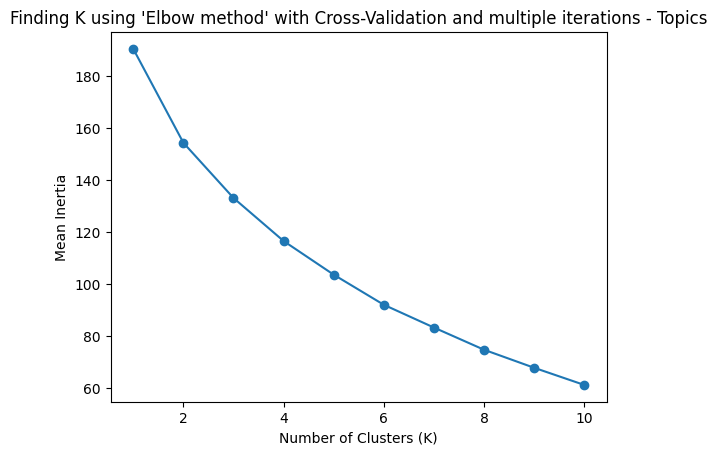

In [111]:
# ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of inertia for each K in each iteration
inertia_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # Create a KMeans object
    kmeans = KMeans(n_clusters=max_clusters, random_state=random_state)
    
    # List to store the inertia for each K in this iteration
    inertia_iteration = []
    
    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(topics):# Loop over each split
        X_train = topics.iloc[train_index] # Get the training data for this split
        
        # Find the inertia of each K [for this split]
        inertia_k = [] # List to store the inertia of each K [for this split]
        for k in np.linspace(1, max_clusters, max_clusters, dtype=int): # Loop over each K
            kmeans.n_clusters = k # Actualize the number of clusters in the KMeans object
            kmeans.fit(X_train) # Fit the KMeans object with the training data
            inertia_k.append(kmeans.inertia_) # Store the inertia of each K [for this split]
        
        # Store the inertia results of each K, each split [for this iteration]
        inertia_iteration.append(inertia_k)
    
    # Store the inertia results of each K, each split, each iteration
    inertia_iterations.append(inertia_iteration)

# Calculate the mean inertia for each K across all iterations and splits
inertia_mean = np.mean(inertia_iterations, axis=0) # Calculate the mean inertia across all iterations
inertia_mean = np.mean(inertia_mean, axis=0) # Calculate the mean inertia across all splits

# Plot the curve of mean inertia vs K
plt.plot(np.linspace(1, max_clusters, max_clusters, dtype=int), inertia_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia')
plt.title("Finding K using 'Elbow method' with Cross-Validation and multiple iterations - Topics")
plt.show()

### SILHOUETTE (10 > 9 > 8 > 7) (???)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

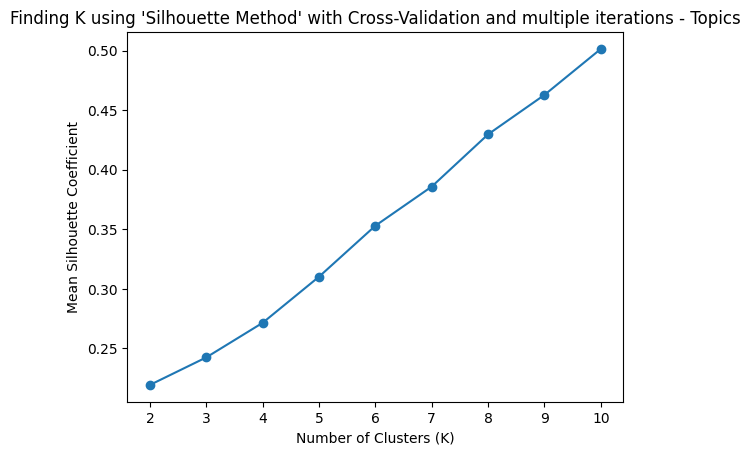

In [112]:
# SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of silhouette scores for each K in each iteration
silhouette_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the silhouette scores for each K in this iteration
    silhouette_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(topics):# Loop over each split
        X_train = topics.iloc[train_index] # Get the training data for this split

        # Calculate the silhouette scores of each K [for this split]
        silhouette_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = silhouette_score(X_train, labels) # Calculate the silhouette score of this K [for this split]
            silhouette_k.append(score) # Store the silhouette scores of each K [for this split]
        
        # Store the silhouette scores of each K, each split [for this iteration]
        silhouette_iteration.append(silhouette_k) 
    
    # Store the silhouette scores of each K, each split, each iteration
    silhouette_iterations.append(silhouette_iteration)

# Calculate the mean silhouette scores for each K across all iterations and splits
silhouette_mean = np.mean(silhouette_iterations, axis=0) # Calculate the mean silhouette scores across all iterations
silhouette_mean = np.mean(silhouette_mean, axis=0) # Calculate the mean silhouette scores across all splits

# Plot the silhouette coefficient curve
plt.plot(range(2, max_clusters + 1), silhouette_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Coefficient')
plt.title("Finding K using 'Silhouette Method' with Cross-Validation and multiple iterations - Topics")
plt.show()

### DAVIES-BOULDIN INDEX - Best k = (10 > 8 >> 5)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

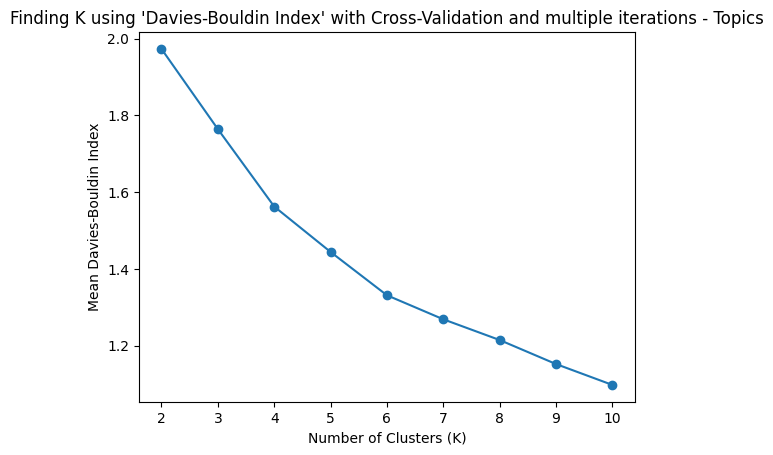

In [113]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Davies-Bouldin index for each K in each iteration
davies_bouldin_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Davies-Bouldin index for each K in this iteration
    davies_bouldin_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(topics): # Loop over each split
        X_train = topics.iloc[train_index] # Get the training data for this split

        # Calculate the Davies-Bouldin index of each K [for this split]
        davies_bouldin_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = davies_bouldin_score(X_train, labels) # Calculate the Davies-Bouldin index of this K [for this split]
            davies_bouldin_k.append(score) # Store the Davies-Bouldin index of each K [for this split]

        # Store the Davies-Bouldin index of each K, each split [for this iteration]
        davies_bouldin_iteration.append(davies_bouldin_k) 

    # Store the Davies-Bouldin index of each K, each split, each iteration
    davies_bouldin_iterations.append(davies_bouldin_iteration)

# Calculate the mean Davies-Bouldin index for each K across all iterations and splits
davies_bouldin_mean = np.mean(davies_bouldin_iterations, axis=0) # Calculate the mean Davies-Bouldin index across all iterations
davies_bouldin_mean = np.mean(davies_bouldin_mean, axis=0) # Calculate the mean Davies-Bouldin index across all splits

# Plot the Davies-Bouldin index curve
plt.plot(range(2, max_clusters + 1), davies_bouldin_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Davies-Bouldin Index')
plt.title("Finding K using 'Davies-Bouldin Index' with Cross-Validation and multiple iterations - Topics")
plt.show()

### CALINSKI-HARABASZ INDEX - Best k = (2 > 10 > 3 > 9)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

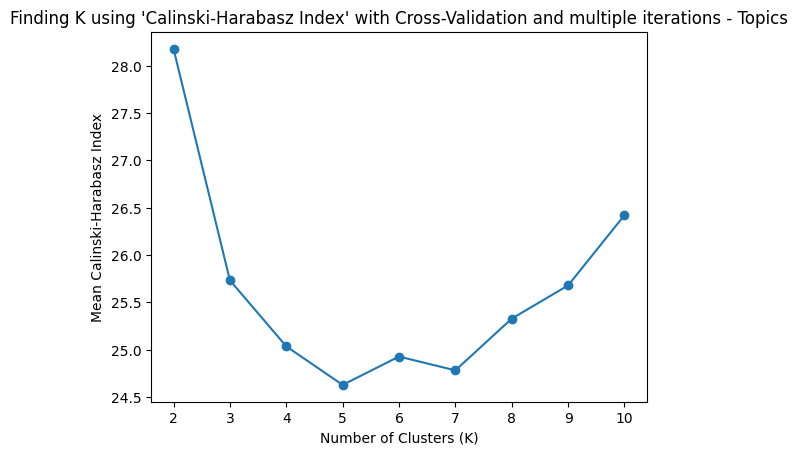

In [114]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Calinski-Harabasz index for each K in each iteration
calinski_harabasz_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Calinski-Harabasz index for each K in this iteration
    calinski_harabasz_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(topics): # Loop over each split
        X_train = topics.iloc[train_index] # Get the training data for this split

        # Calculate the Calinski-Harabasz index of each K [for this split]
        calinski_harabasz_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = calinski_harabasz_score(X_train, labels) # Calculate the Calinski-Harabasz index of this K [for this split]
            calinski_harabasz_k.append(score) # Store the Calinski-Harabasz index of each K [for this split]

        # Store the Calinski-Harabasz index of each K, each split [for this iteration]
        calinski_harabasz_iteration.append(calinski_harabasz_k) 

    # Store the Calinski-Harabasz index of each K, each split, each iteration
    calinski_harabasz_iterations.append(calinski_harabasz_iteration)

# Calculate the mean Calinski-Harabasz index for each K across all iterations and splits
calinski_harabasz_mean = np.mean(calinski_harabasz_iterations, axis=0) # Calculate the mean Calinski-Harabasz index across all iterations
calinski_harabasz_mean = np.mean(calinski_harabasz_mean, axis=0) # Calculate the mean Calinski-Harabasz index across all splits

# Plot the Calinski-Harabasz index curve
plt.plot(range(2, max_clusters + 1), calinski_harabasz_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Calinski-Harabasz Index')
plt.title("Finding K using 'Calinski-Harabasz Index' with Cross-Validation and multiple iterations - Topics")
plt.show()

### GridSearchCV (4)

In [115]:
# Define the parameter values to search
#param_grid = {
#    'n_clusters': [3],  # Número de clústeres
#    'init': ['k-means++', 'random'],  # Método de inicialización de centroides
#    'n_init': ['auto', 'warn', 5, 10, 20],  # Número de veces que se ejecuta el algoritmo con diferentes centroides
#    'max_iter': [200, 250, 300, 350],  # Número máximo de iteraciones
#    'tol': [0.00001, 0.0001, 0.001],  # Tolerancia al cambio
#    'random_state': [42],  # Semilla para el generador de números aleatorios
#    'algorithm': ['elkan', 'lloyd'],  # Algoritmo utilizado para el cálculo de los centroides
#    'copy_x': [True, False]  # Si se copian los datos de entrada
#}

In [116]:
# Build an instance of K-means
#kmeans = KMeans()
# Build a GridSearchCV instance with the model, the parameter dictionary and the cross-validation strategy
#cv = KFold(n_splits=15, shuffle=True, random_state=random_state)  # Ejemplo de validación cruzada con 5 divisiones
#grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=cv)
# Fit the model using GridSearch
#grid_search.fit(topics)

# Obtain the best parameters and the best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

#############################################################################################################

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 200, 'n_clusters': 3, 'n_init': 20, 'random_state': 42, 'tol': 1e-05}
#Best Score: -11.466269704728655

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 15, 'random_state': 42, 'tol': 5e-06}
#Best Score: -11.464983248539875

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 15, 'random_state': 42, 'tol': 1e-06}
#Best Score: -11.464983248539875

## 4.2. Fit K-means

cluster_labels
0    67
2    46
1    40
Name: count, dtype: int64

Inertia: 166.3012167423751

N_iter: 6


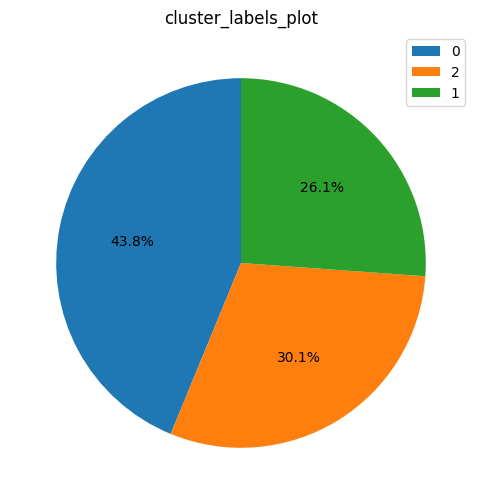

In [117]:
# Make the clusterization with the optimal number of clusters and the best parameters
kmeans = KMeans(n_clusters=3, algorithm='lloyd', copy_x=True, init='k-means++', max_iter=100, n_init=15, random_state=42, tol=1e-06)
kmeans.fit(topics)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['cluster_labels'] = cluster_labels
# subtopiccs
subtopics_=subtopics.copy()
subtopics_['cluster_labels'] = cluster_labels
# topics
topics_=topics.copy()
topics_['cluster_labels'] = cluster_labels
# personalProfile
personalProfile_=personalProfile.copy()
personalProfile_['cluster_labels'] = cluster_labels
# save labels
labels_topics=encuesta_.copy()
labels_topics['cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster_labels_plot',figsize=(6,6))
plt.ylabel('')
plt.show()

## 4.3. Analysis

### Topics

#### Bonferroni --> "topics_analysis_bonferroni"

In [118]:
# Prepare the data for the hipotesis test
X = topics_.drop('cluster_labels', axis=1)  # P redictor variables
y = topics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [119]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [ True False  True False False  True False  True]

p_values_corrected: [4.57968210e-07 1.00000000e+00 4.51085687e-05 1.00000000e+00
 4.76797170e-01 8.29853659e-22 5.39643979e-01 4.78147755e-33]

rejectionsH0: 0.006391150954545011

upperlLimitCI: 0.00625


In [120]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Bonferroni correction
topics_analysis_bonferroni=subtopics_significance.drop(['p-value','Significant'], axis=1)
topics_analysis_bonferroni.rename(columns={'p-value_corrected':'p_value'}, inplace=True)

# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\1588143525.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable       p-value  p-value_corrected
0        topics_sport  5.724603e-08       4.579682e-07
2         topics_food  5.638571e-06       4.510857e-05
5  topics_alienPerson  1.037317e-22       8.298537e-22
7      topics_hobbies  5.976847e-34       4.781478e-33

In [121]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
             Variable  Group X  Group Y       p-value
0        topics_sport        0        1  1.608598e-04
1        topics_sport        0        2  2.990309e-02
2        topics_sport        1        2  7.584504e-08
3         topics_food        0        1  5.186255e-04
4         topics_food        1        2  6.854116e-06
5  topics_alienPerson        0        1  3.117404e-23
6  topics_alienPerson        0        2  4.216117e-10
7  topics_alienPerson        1        2  3.230481e-06
8      topics_hobbies        0        2  1.747216e-25
9      topics_hobbies        1        2  1.368528e-19


In [122]:
# Define a list to store the aggregation results
aggregation_results = []

# Iterate over the columns and apply the aggregation functions separately
for column in encuesta_.columns:
    column_aggregations = encuesta_.groupby('cluster_labels')[column].agg([
        ('sum', 'sum'),
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ])
    column_aggregations.columns = [f"{column}_{agg}" for agg in column_aggregations.columns]
    aggregation_results.append(column_aggregations)

# Concatenate the results into a single DataFrame
cluster_agg = pd.concat(aggregation_results, axis=1)

In [123]:
# Make a table with the conclusions
results_T_topics=[
    ['0', '35.9', '<(2,3)','>(1,2)','<1, >2','<(1,2)','>(1,3)'],
    ['1', '24.2', '<(2,3)','<(0,3)','>(0,2,3)','>0','<0, >3'],
    ['2', '23.5', '>(0,1)','<(0,3)','<(0,1,3)','>0','>3'],
    ['3', '16.3', '>(0,1)','>(1,2)','<1, >2','','<(0,1,2)']
]
results_T_topics_columns=['k', 'proportion', 'topics_sport', 'topics_food', 'topics_alienPerson', 'topics_productiveTime', 'topics_hobbies']
results_T_topics=pd.DataFrame(results_T_topics, columns=results_T_topics_columns)
results_T_topics

k proportion topics_sport topics_food topics_alienPerson   
0  0       35.9       <(2,3)      >(1,2)             <1, >2  \
1  1       24.2       <(2,3)      <(0,3)           >(0,2,3)   
2  2       23.5       >(0,1)      <(0,3)           <(0,1,3)   
3  3       16.3       >(0,1)      >(1,2)             <1, >2   

  topics_productiveTime topics_hobbies  
0                <(1,2)         >(1,3)  
1                    >0         <0, >3  
2                    >0             >3  
3                             <(0,1,2)

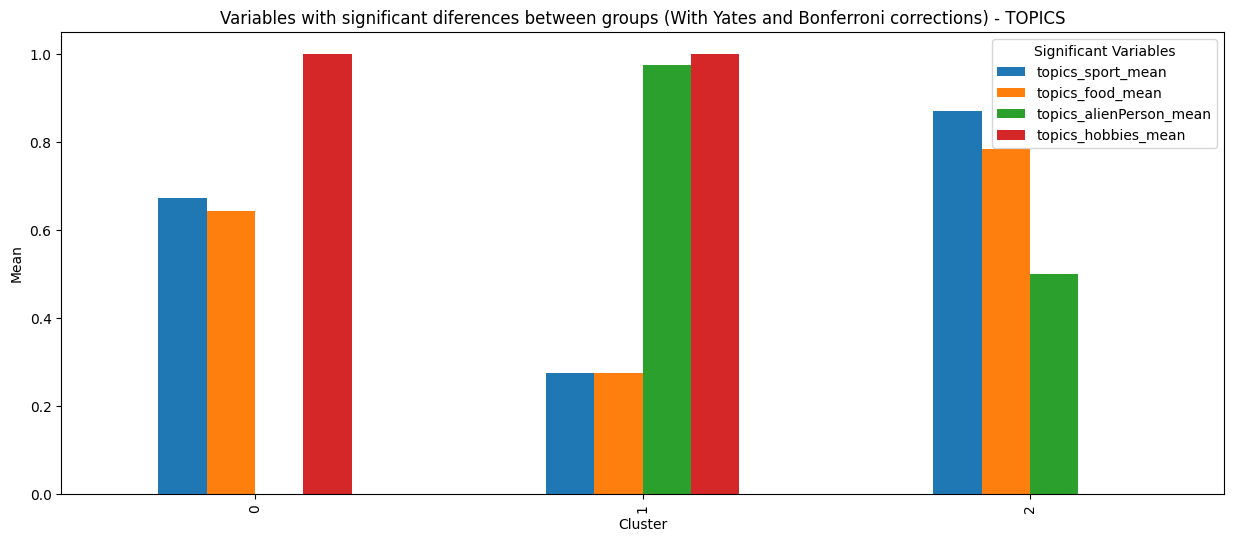

In [124]:
# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title='Variables with significant diferences between groups (With Yates and Bonferroni corrections) - TOPICS', figsize=(15, 6))
            plt.xlabel('Cluster')
            plt.ylabel('Mean')
            plt.legend(title='Significant Variables')
            plt.show()

#### Holm-Bonferroni --> "topics_analysis_HBonferroni"

In [125]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='holm')

# Identification of significant variables
topics_significance_HBonferroni = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Holm-Bonferroni correction
topics_analysis_HBonferroni = topics_significance_HBonferroni.drop(['p-value', 'Significant'], axis=1)
topics_analysis_HBonferroni.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Benjamini-Hochberg --> "topics_analysis_bHochberg"

In [126]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')

# Identification of significant variables
topics_significance_bHochberg = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Benjamini-Hochberg correction
topics_analysis_bHochberg = topics_significance_bHochberg.drop(['p-value', 'Significant'], axis=1)
topics_analysis_bHochberg.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Mean 3 corrections --> "topics_analysis"

In [127]:
# Merge the results of the three corrections
topics_analysis=pd.merge(topics_analysis_bonferroni, topics_analysis_HBonferroni, on='Variable')
topics_analysis=pd.merge(topics_analysis, topics_analysis_bHochberg, on='Variable')

# Obtain the mean of significance of the three corrections
topics_analysis['p_value_mean'] = topics_analysis[['p_value_x', 'p_value_y', 'p_value']].mean(axis=1)

# Save the results
topics_analysis_=topics_analysis.copy()
topics_analysis_.sort_values(by='p_value_mean', inplace=True)
topics_analysis_.to_excel('topics_analysis_.xlsx', index=False)

# Drop the columns of the three corrections
topics_analysis.drop(['p_value_x', 'p_value_y', 'p_value'], axis=1, inplace=True)
print(topics_analysis.shape)
topics_analysis.head()

(8, 2)


Variable  p_value_mean
0   topics_sport  3.180335e-07
1   topics_sleep  6.922995e-01
2    topics_food  2.819286e-05
3   topics_vices  7.819722e-01
4  topics_social  2.683788e-01

### Sutopics

In [128]:
# Prepare the data for the hipotesis test
X = subtopics_.drop('cluster_labels', axis=1)  # Predictor variables
y = subtopics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [129]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]

p_values_corrected: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.3607549  1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.88781826 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]

rejectionsH0: 0.0009859231655185985

upperlLimitCI: 0.0009615384615384616


In [130]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\598332224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Empty DataFrame
Columns: [Variable, p-value, p-value_corrected]
Index: []

In [131]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
Empty DataFrame
Columns: [Variable, Group X, Group Y, p-value]
Index: []


In [132]:
# Create a table with the conclusions
results_T_subtopics=[
    ['0', '35.9', '<(2,3)'],
    ['1', '24.2', '<2'],
    ['2', '23.5', '>(0,1)'],
    ['3', '16.3', '>0']
]
results_T_subtopics_columns=['k', 'proportion', 'sport_intensity']
results_T_subtopics=pd.DataFrame(results_T_subtopics, columns=results_T_subtopics_columns)
results_T_subtopics

k proportion sport_intensity
0  0       35.9          <(2,3)
1  1       24.2              <2
2  2       23.5          >(0,1)
3  3       16.3              >0

In [133]:
# Obtain the "genres" present in the significant variables
significant_variables = subtopics_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

### Personal Profile

In [134]:
# Prepare the data for the hipotesis test
X = personalProfile_.drop('cluster_labels', axis=1)  # Predictor variables
y = personalProfile_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [135]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False]

p_values_corrected: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.00961444 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]

rejectionsH0: 0.0014237991678133222

upperlLimitCI: 0.001388888888888889


In [136]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\598332224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable   p-value  p-value_corrected
22  aboutYou_sport  0.000267           0.009614

In [137]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
         Variable  Group X  Group Y   p-value
0  aboutYou_sport        0        1  0.033764
1  aboutYou_sport        0        2  0.044089
2  aboutYou_sport        1        2  0.000125


In [138]:
# Create a table with the conclusions
results_T_pprofile=[
    ['0', '35.9', '<(2,3)'],
    ['1', '24.2', ''],
    ['2', '23.5', '>0'],
    ['3', '16.3', '>0']
]
results_T_pprofile_columns=['k', 'proportion', 'aboutYou_sport']
results_T_pprofile=pd.DataFrame(results_T_pprofile, columns=results_T_pprofile_columns)
results_T_pprofile

k proportion aboutYou_sport
0  0       35.9         <(2,3)
1  1       24.2               
2  2       23.5             >0
3  3       16.3             >0

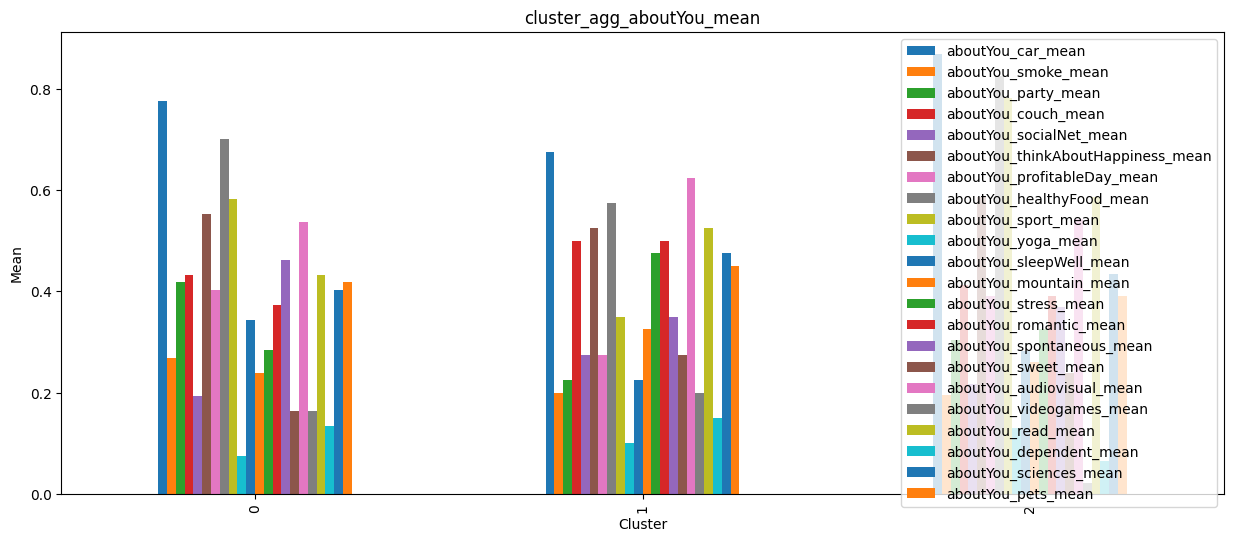

In [139]:
# Obtain the "genres" present in the significant variables
significant_variables = subtopics_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

## 4.4. Random forest [0.9932043010752687 - 75 Iterations - ?s]

### Finding best parameters

In [140]:
# Split the data into training (X) and test (y) sets
X = topics_.drop('cluster_labels', axis=1)  # Eliminar la columna de etiquetas
y = topics_['cluster_labels']

In [141]:
#param_grid = {
#    'n_estimators': [50, 100, 200],#The number of trees in the forest
#    'bootstrap': [True],#Whether bootstrap samples are used when building trees
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'max_depth': [None],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],#The minimum number of samples required to be at a leaf node
#    'min_impurity_decrease': [0.0],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'max_features': ['sqrt', 'log2'],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None],#Grow trees with max_leaf_nodes in best-first fashion
#    'n_jobs': [-1],#The number of jobs to run in parallel for both fit and predict.
#    'oob_score': [True, False],#Whether to use out-of-bag samples to estimate the generalization accuracy
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', 'balanced_subsample', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [142]:
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9935483870967742

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9935483870967742

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9935483870967742

### Fitting and analyzing the model

In [143]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 75
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Random Forest model with the best parameters found
        rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)

        # Train the model
        rf.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(rf.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = rf.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
topics_RF = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_topics_RF = np.mean(accuracy_list)
accuracy_std_mean_topics_RF = np.mean(accuracy_std_list)
print("accuracy_mean_topics_RF:", accuracy_mean_topics_RF)
print("topics_RF.shape:",topics_RF.shape)
print("sum importance:",topics_RF['importance'].sum())
topics_RF.head()

#rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_topics_RF: 0.9927741935483873
#accuracy_mean_topics_RF x 50: 0.9932043010752687
#accuracy_mean_topics_RF x 75: 0.9914695340501796


accuracy_mean_topics_RF: 0.9914695340501796
topics_RF.shape: (8, 2)
sum importance: 1.0


characteristics  importance
0    topics_sport    0.089598
1    topics_sleep    0.034347
2     topics_food    0.080985
3    topics_vices    0.022372
4   topics_social    0.018548

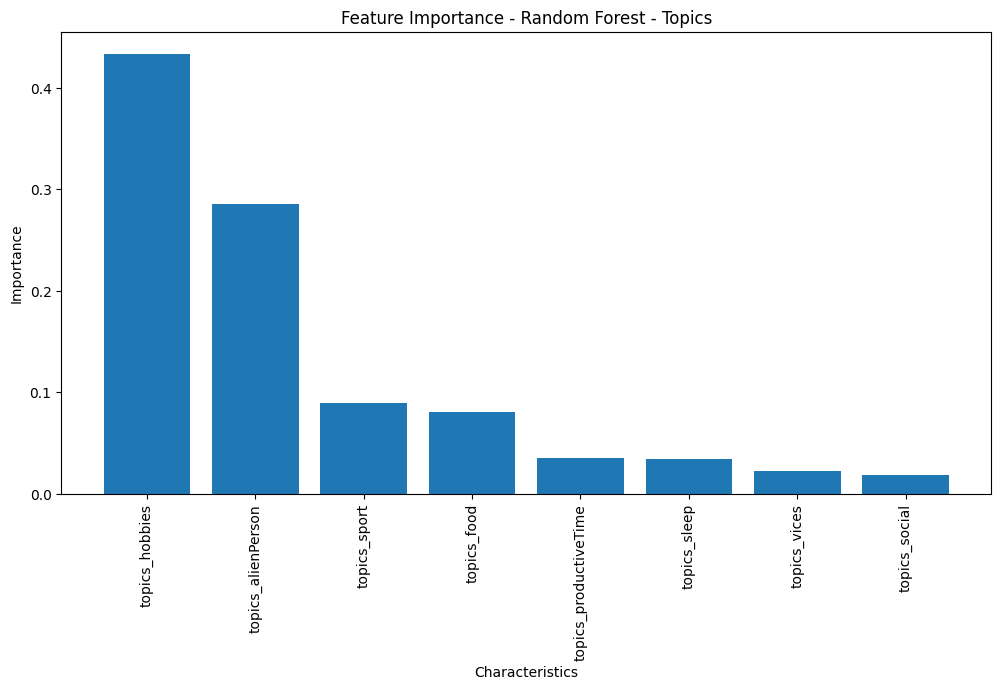

In [144]:
# Sort the DataFrame by descending importance
topics_RF_sorted = topics_RF.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(topics_RF_sorted['characteristics'], topics_RF_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest - Topics')
plt.show()

In [145]:
# Select the most important features
topics_RF_top = topics_RF_sorted.head(2)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
topics_RF_groupValues = topics_[['cluster_labels'] + topics_RF_top]

# Group by cluster and get feature values for each group
topics_RF_groupedValues = topics_RF_groupValues.groupby('cluster_labels').mean().reset_index()
topics_RF_groupedValues

cluster_labels  topics_hobbies  topics_alienPerson
0               0             1.0               0.000
1               1             1.0               0.975
2               2             0.0               0.500

### DecisionTreeClassifier

In [146]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'splitter': ['best', 'random'],#The strategy used to choose the split at each node
#    'max_depth': [None, 3, 5],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5],#The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.05, 0.01, 0.1],#The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],#Grow trees with max_leaf_nodes in best-first fashion
#    'min_impurity_decrease': [0.0, 0.05, 0.01, 0.1],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [147]:
#tree_model = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
#Best score: 0.9935483870967742

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
#Best score: 0.9935483870967742

In [148]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        tree_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None, max_features='sqrt', max_leaf_nodes=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')
        
        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("decision_tree_topics")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

'decision_tree_topics.pdf'

## 4.5. GradientBoosting [0.9932021505376347 - 100 iterations - ?s]

### Finding best parameters

In [149]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [50, 100, 200],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [2, 3, 5],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_depth': [3],  # The maximum depth of the tree
#    'min_impurity_decrease': [0.0],  # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'init': [None],  # An estimator object that is used to compute the initial predictions
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_features': [1.0, 'sqrt', 'log2', None],  # The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None],  # Grow trees with max_leaf_nodes in best-first fashion
#    'warm_start': [False],  # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution
#    'validation_fraction': [0.1],  # The proportion of training data to set aside as validation set for early stopping
#    'n_iter_no_change': [None],  # Used to decide if early stopping will be used to terminate training when validation score is not improving
#    'tol': [0.0001],  # Tolerance for the early stopping
#    'ccp_alpha': [0.0],  # Complexity parameter used for Minimal Cost-Complexity Pruning
#}

In [150]:
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.75, 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}
#Best score: 0.9935483870967742

#[1. 1. 1. 1. 1.]
#Mean cross-validation score: 1.0
#Best parameters: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.05, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 0.75, 'tol': 0.0001, 'validation_fraction': 0.1, 'warm_start': False}
#Best score: 1.0

### Fitting and analyzing the model

In [151]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 100
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Gradient Boosting model with the best parameters found
        gb=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.05, loss='log_loss', max_depth=3, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, n_iter_no_change=None, random_state=42, subsample=0.75, tol=0.0001, validation_fraction=0.1, warm_start=False)

        # Train the model
        gb.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(gb.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = gb.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
topics_GB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_topics_GB = np.mean(accuracy_list)
accuracy_std_mean_topics_GB = np.mean(accuracy_std_list)
print("accuracy_mean_topics_GB:", accuracy_mean_topics_GB)
print("topics_GB.shape:",topics_GB.shape)
print("sum importance:",topics_GB['importance'].sum())
topics_GB.head()

#gb=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.01, loss='log_loss', max_depth=3, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.05, min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, n_iter_no_change=None, random_state=42, subsample=0.75, tol=0.0001, validation_fraction=0.1, warm_start=False)
#accuracy_mean_topics_GB: 0.9856559139784945
#accuracy_mean_topics_GB x 50: 0.9866150537634409

#gb=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None, learning_rate=0.05, loss='log_loss', max_depth=3, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=50, n_iter_no_change=None, random_state=42, subsample=0.75, tol=0.0001, validation_fraction=0.1, warm_start=False)
#accuracy_mean_topics_GB: 0.9934193548387098
#accuracy_mean_topics_GB x 50: 0.9934666666666666

accuracy_mean_topics_GB: 0.9934795698924733
topics_GB.shape: (8, 2)
sum importance: 1.0


characteristics  importance
0    topics_sport    0.001795
1    topics_sleep    0.000012
2     topics_food    0.016578
3    topics_vices    0.001206
4   topics_social    0.000003

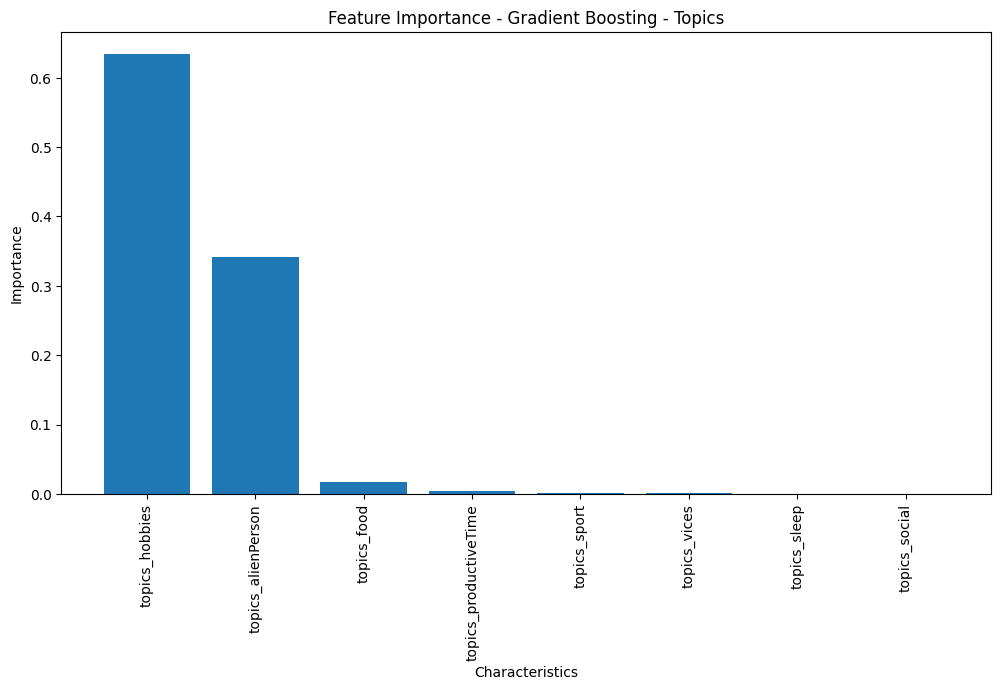

In [152]:
# Sort the DataFrame by descending importance
topics_GB_sorted = topics_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(topics_GB_sorted['characteristics'], topics_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting - Topics')
plt.show()

In [153]:
# Select the most important features
topics_GB_top = topics_GB_sorted.head(2)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
topics_GB_groupValues = topics_[['cluster_labels'] + topics_GB_top]

# Group by cluster and get feature values for each group
topics_GB_groupedValues = topics_GB_groupValues.groupby('cluster_labels').mean().reset_index()
topics_GB_groupedValues

cluster_labels  topics_hobbies  topics_alienPerson
0               0             1.0               0.000
1               1             1.0               0.975
2               2             0.0               0.500

## 4.6 SVM [0.9934629390681006 - 1500 Iterations - ?s]

### Finding best parameters

In [154]:
#param_grid = {
#    'C': [1, 2, 5],  # Inverse of regularization strength
#    'kernel': ['linear'],  # Specifies the kernel type to be used in the algorithm
#    'degree': [2],  # Degree of the polynomial kernel function ('poly')
#    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#    'coef0': [0.0, 0.001, 0.01],  # Independent term in kernel function
#    'shrinking': [True, False],  # Whether to use the shrinking heuristic
#    'probability': [True, False],  # Whether to enable probability estimates
#    'tol': [0.00001, 0.00001, 0.0001],  # Tolerance for stopping criterion #0.001
#    'cache_size': [200],  # Specify the size of the kernel cache (in MB)
#    'class_weight': ['balanced', None],  # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#    'max_iter': [-1],  # Hard limit on iterations within solver, or -1 for no limit
#    'decision_function_shape': ['ovo', 'ovr'],  # Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one ('ovo') decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)
#    'break_ties': [False],  # If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned
#    'random_state': [42],  # Controls the pseudo random number generation for shuffling the data for probability estimates
#}

In [155]:
#svc = SVC()
#grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#Best score: 0.9935483870967742

### Fitting and analyzing the model

In [156]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1500
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a SVM model with the best parameters found
        svm= SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.000001)

        # Train the model
        svm.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(np.abs(svm.coef_[0]))
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = svm.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Normalize the weighted feature importances to sum up to 1
feature_importances_normalized = feature_importances_weighted / np.sum(np.abs(feature_importances_weighted))

# Build the final dataset with the features and their importance
topics_SVM = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_normalized})

# Results
accuracy_mean_topics_SVM = np.mean(accuracy_list)
accuracy_std_mean_topics_SVM = np.mean(accuracy_std_list)
print("accuracy_mean_topics_SVM:", accuracy_mean_topics_SVM)
print("topics_SVM.shape:",topics_SVM.shape)
print("sum importance:",topics_SVM['importance'].sum())
topics_SVM.head()

#svm= SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.000001)
#accuracy_mean_topics_SVM: 0.9934193548387098
#accuracy_mean_topics_SVM x 100: 0.9934602150537637
#accuracy_mean_topics_SVM x 500: 0.9934610752688174
#accuracy_mean_topics_SVM x 1000: 0.9934640860215056

accuracy_mean_topics_SVM: 0.9934683870967743
topics_SVM.shape: (8, 2)
sum importance: 1.0


characteristics  importance
0    topics_sport    0.096781
1    topics_sleep    0.086836
2     topics_food    0.098439
3    topics_vices    0.091681
4   topics_social    0.088358

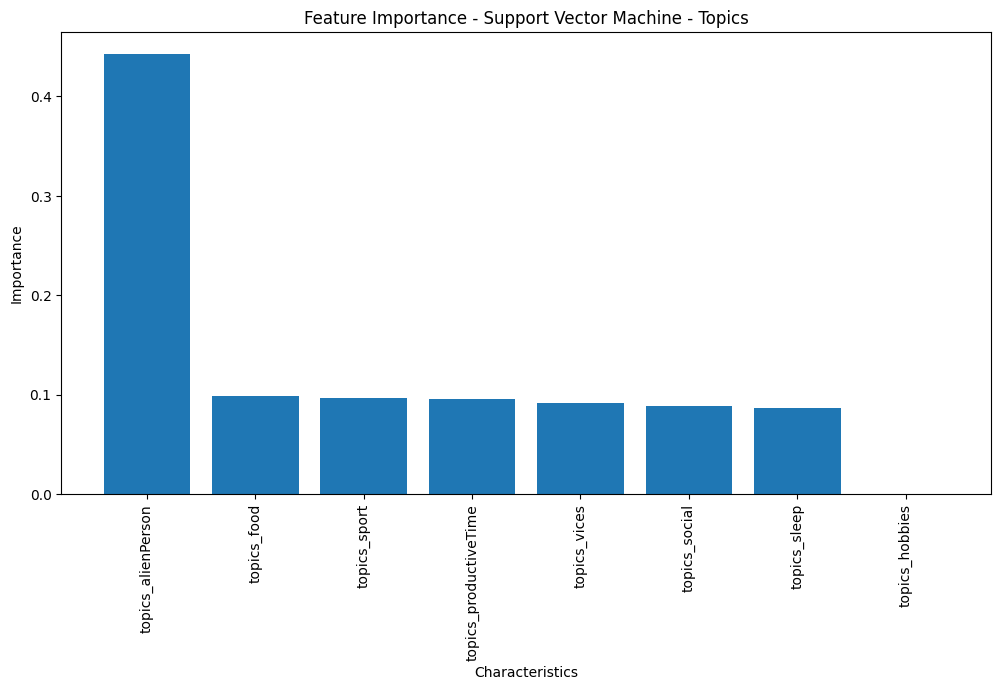

In [157]:
# Sort the DataFrame by descending importance
topics_SVM_sorted = topics_SVM.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(topics_SVM_sorted['characteristics'], topics_SVM_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Support Vector Machine - Topics')
plt.show()

In [158]:
# Select the most important features
topics_SVM_top = topics_SVM_sorted.head(2)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
topics_SVM_groupValues = topics_[['cluster_labels'] + topics_SVM_top]

# Group by cluster and get feature values for each group
topics_SVM_groupedValues = topics_SVM_groupValues.groupby('cluster_labels').mean().reset_index()
topics_SVM_groupedValues

cluster_labels  topics_alienPerson  topics_food
0               0               0.000     0.641791
1               1               0.975     0.275000
2               2               0.500     0.782609

## 4.7. XGBOOST [0.993462365591398 - 200 Iterations - 30s]

### Finding best parameters

In [159]:
#param_grid = {
#    'learning_rate': [0.05, 0.1, 0.2],
#    'n_estimators': [50, 100, 200],
#    'max_depth': [2, 3, 5],
#    'min_child_weight': [1, 2, 3],
#    'subsample': [1, 0.9, 0.7],
#    'colsample_bytree': [1, 0.9, 0.7],
#    'gamma': [0, 0.001, 0.01],
#    'reg_alpha': [0, 0.001, 0.01],
#    'reg_lambda': [1, 0.9, 0.7],
#    'random_state': [42],
#}

In [160]:
#xgb_model = xgb.XGBClassifier()
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
#Best score: 0.9935483870967742

#[0.96774194 1.         1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
#Best score: 0.9935483870967742

In [161]:
#PARAMS OBTAINED FOR DIFERENT K-MEANS CLUSTERS (4), BUT WE WILL CHECK THEM
#[1.         0.96774194 1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.005, 'subsample': 0.6}
#Best score: 0.9935483870967742

#[1.         0.96774194 1.         1.         1.        ]
#Mean cross-validation score: 0.9935483870967742
#Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 0.5}
#Best score: 0.9935483870967742

### Fitting and analyzing the model

In [162]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 200
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a XGBoost model with the best parameters found
        xgb_model= xgb.XGBClassifier(colsample_bytree=1, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=1, random_state=42)

        # Train the model
        xgb_model.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(xgb_model.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = xgb_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
topics_XGB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_topics_XGB = np.mean(accuracy_list)
accuracy_std_mean_topics_XGB = np.mean(accuracy_std_list)
print("accuracy_mean_topics_XGB:", accuracy_mean_topics_XGB)
print("topics_XGB.shape:",topics_XGB.shape)
print("sum importance:",topics_XGB['importance'].sum())
topics_XGB.head()


#xgb_model= xgb.XGBClassifier(colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=2, min_child_weight=1, n_estimators=500, reg_alpha=0.1, reg_lambda=0.005, subsample=0.6)
#accuracy_mean_topics_XGB: 0.9934193548387098
#accuracy_mean_topics_XGB x 50: 0.9933376344086021


#xgb_model= xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=2, min_child_weight=1, n_estimators=500, reg_alpha=0.0, reg_lambda=0.0, subsample=0.5)
#accuracy_mean_topics_XGB: 0.9934193548387098
#accuracy_mean_topics_XGB x 50: 0.9921763440860215
#accuracy_mean_topics_XGB x 100: 0.9928150537634411

#Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
#xgb_model = xgb.XGBClassifier(colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=2, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=1, random_state=42)
#accuracy_mean_topics_XGB: 0.9934193548387098
#accuracy_mean_topics_XGB x 50: 0.9921763440860215
#accuracy_mean_topics_XGB x 100: 0.9928150537634411

#Best parameters: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1}
#accuracy_mean_topics_XGB: 0.9934193548387098
#accuracy_mean_topics_XGB x 50: 0.9934666666666666
#accuracy_mean_topics_XGB x 100: 0.9934602150537637
#accuracy_mean_topics_XGB x 200: 0.993462365591398

accuracy_mean_topics_XGB: 0.993462365591398
topics_XGB.shape: (8, 2)
sum importance: 1.0000000023248072


characteristics  importance
0    topics_sport    0.011515
1    topics_sleep    0.000000
2     topics_food    0.010920
3    topics_vices    0.008021
4   topics_social    0.000000

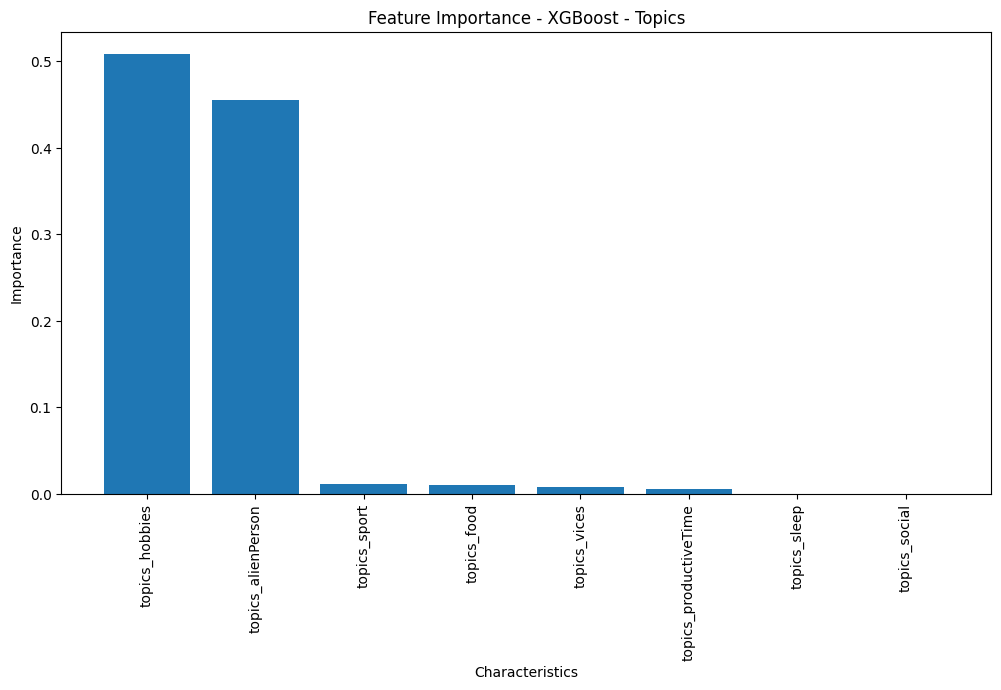

In [163]:
# Sort the DataFrame by descending importance
topics_XGB_sorted = topics_XGB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(topics_XGB_sorted['characteristics'], topics_XGB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost - Topics')
plt.show()

In [164]:
# Select the most important features
topics_XGB_top = topics_XGB_sorted.head(2)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
topics_XGB_groupValues = topics_[['cluster_labels'] + topics_XGB_top]

# Group by cluster and get feature values for each group
topics_XGB_groupedValues = topics_XGB_groupValues.groupby('cluster_labels').mean().reset_index()
topics_XGB_groupedValues

cluster_labels  topics_hobbies  topics_alienPerson
0               0             1.0               0.000
1               1             1.0               0.975
2               2             0.0               0.500

## 4.8. Ensamble

In [165]:
# List of datasets and accuracy of each model
datasets = [topics_RF, topics_GB, topics_SVM, topics_XGB]
accuracies = [accuracy_mean_topics_RF, accuracy_mean_topics_GB, accuracy_mean_topics_SVM, accuracy_mean_topics_XGB]

# Calculate the weights according to the model accuracy
weights = [accuracy / sum(accuracies) for accuracy in accuracies]

# Assemble the weighted feature importances
feature_importances_weighted = np.zeros(len(datasets[0]))  # Initialize with zeros the size of the characteristics
for weight, dataset in zip(weights, datasets):
    feature_importances_weighted += weight * dataset['importance']

# Build the final dataset with the features and their assembled importance
topics_importance = pd.DataFrame({'characteristics': datasets[0]['characteristics'], 'importance': feature_importances_weighted})

# Ensure that the importance sum is equal to 1
topics_importance['importance'] = topics_importance['importance'] / topics_importance['importance'].sum()
topics_importance.head()

characteristics  importance
0    topics_sport    0.049902
1    topics_sleep    0.030297
2     topics_food    0.051716
3    topics_vices    0.030824
4   topics_social    0.026731

In [166]:
# Find a weight factor by weighting the accuracy of each model
weight_factor = sum([accuracy / sum(accuracies) * accuracy for accuracy in accuracies])
weight_factor

0.9929707199391546

In [167]:
# Create the subtopics_importance_ dataset with the model importances
topics_importance_ = topics_importance.copy()
topics_importance_.rename(columns={'importance': f'importance_ensamble{weight_factor:.4f}'}, inplace=True)

model_names=['RF', 'GB', 'SVM', 'XGB', 'ensamble']
for i, dataset in enumerate(datasets):
    model_name = f'_{model_names[i]}_{accuracies[i]:.4f}'
    topics_importance_[f'importance{model_name}'] = dataset['importance']

topics_importance_.sort_values(by=f'importance_ensamble{weight_factor:.4f}', ascending=False, inplace=True)
topics_importance_round_=round(topics_importance_, 4)
topics_importance_round_.to_excel('topics_importance_.xlsx')
topics_importance_round_.head()

characteristics  importance_ensamble0.9930  importance_RF_0.9915   
7         topics_hobbies                     0.3940                0.4333  \
5     topics_alienPerson                     0.3814                0.2855   
2            topics_food                     0.0517                0.0810   
0           topics_sport                     0.0499                0.0896   
6  topics_productiveTime                     0.0351                0.0353   

   importance_GB_0.9935  importance_SVM_0.9935  importance_XGB_0.9935  
7                0.6342                 0.0000                 0.5084  
5                0.3419                 0.4425                 0.4557  
2                0.0166                 0.0984                 0.0109  
0                0.0018                 0.0968                 0.0115  
6                0.0043                 0.0954                 0.0055

In [168]:
# Transform the p-values into importance by subtracting them from 1
topics_analysis['1_minus_p_value_mean'] = 1 - topics_analysis['p_value_mean']

# Calculate the importance of features based on normalized transformed p-values
topics_analysis['importance_p_value'] = topics_analysis['1_minus_p_value_mean'] / topics_analysis['1_minus_p_value_mean'].sum()

# Ensure that the sum of importance_p_value is equal to 1
print(topics_analysis['importance_p_value'].sum())

# Combine the information of subtopics_final and subtopics_analysis using the weight factor
topics_importance['importance_p_value'] = topics_analysis['importance_p_value']
topics_importance['combined_importance'] = topics_importance['importance_p_value'] * (1 - weight_factor) + topics_importance['importance'] * weight_factor
topics_importance['p_value_mean'] = topics_analysis['p_value_mean']

#sort by combined_importance
topics_importance = topics_importance.sort_values('combined_importance', ascending=False)
topics_importance.to_excel('topics_ensamble.xlsx')
topics_importance.head()

1.0


characteristics  importance  importance_p_value  combined_importance   
7         topics_hobbies    0.393965            0.167561             0.392373  \
5     topics_alienPerson    0.381436            0.167561             0.379932   
2            topics_food    0.051716            0.167556             0.052530   
0           topics_sport    0.049902            0.167560             0.050730   
6  topics_productiveTime    0.035129            0.119081             0.035719   

   p_value_mean  
7  4.781478e-33  
5  6.569675e-22  
2  2.819286e-05  
0  3.180335e-07  
6  2.893277e-01

# 5. Personal Profile (Without Confounding Variables)

## 5.1. Find k (for k-means) and best parameter combination
- Best K with Elbow Method = (2>3>4>6)
- Best K with Silhouette Method = (2>>3>>4)
- Best K with GridSearchCV = 4

In [169]:
# Drop confounding variables
personalProfile.drop(['sex_Man', 'sex_Woman', 'sex_Other', 'age', 'size', 'weight'], axis=1, inplace=True)

C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\652710847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personalProfile.drop(['sex_Man', 'sex_Woman', 'sex_Other', 'age', 'size', 'weight'], axis=1, inplace=True)


### ELBOW - Best k = (2 > 3 > 4)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

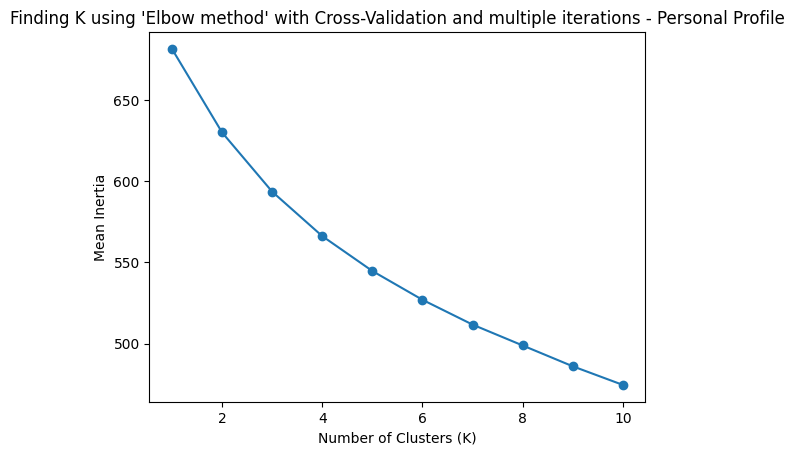

In [170]:
# ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of inertia for each K in each iteration
inertia_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # Create a KMeans object
    kmeans = KMeans(n_clusters=max_clusters, random_state=random_state)
    
    # List to store the inertia for each K in this iteration
    inertia_iteration = []
    
    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(personalProfile):# Loop over each split
        X_train = personalProfile.iloc[train_index] # Get the training data for this split
        
        # Find the inertia of each K [for this split]
        inertia_k = [] # List to store the inertia of each K [for this split]
        for k in np.linspace(1, max_clusters, max_clusters, dtype=int): # Loop over each K
            kmeans.n_clusters = k # Actualize the number of clusters in the KMeans object
            kmeans.fit(X_train) # Fit the KMeans object with the training data
            inertia_k.append(kmeans.inertia_) # Store the inertia of each K [for this split]
        
        # Store the inertia results of each K, each split [for this iteration]
        inertia_iteration.append(inertia_k)
    
    # Store the inertia results of each K, each split, each iteration
    inertia_iterations.append(inertia_iteration)

# Calculate the mean inertia for each K across all iterations and splits
inertia_mean = np.mean(inertia_iterations, axis=0) # Calculate the mean inertia across all iterations
inertia_mean = np.mean(inertia_mean, axis=0) # Calculate the mean inertia across all splits

# Plot the curve of mean inertia vs K
plt.plot(np.linspace(1, max_clusters, max_clusters, dtype=int), inertia_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia')
plt.title("Finding K using 'Elbow method' with Cross-Validation and multiple iterations - Personal Profile")
plt.show()

### SILHOUETTE - Best k = (2 >> 3)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

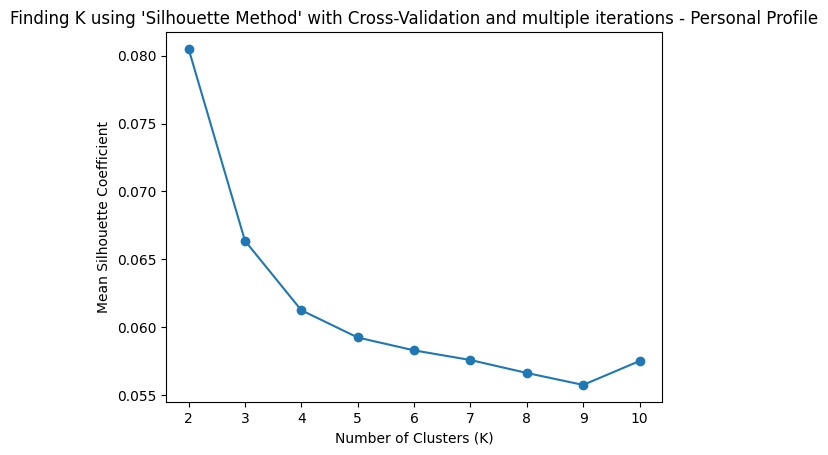

In [171]:
# SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of silhouette scores for each K in each iteration
silhouette_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the silhouette scores for each K in this iteration
    silhouette_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(personalProfile):# Loop over each split
        X_train = personalProfile.iloc[train_index] # Get the training data for this split

        # Calculate the silhouette scores of each K [for this split]
        silhouette_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = silhouette_score(X_train, labels) # Calculate the silhouette score of this K [for this split]
            silhouette_k.append(score) # Store the silhouette scores of each K [for this split]
        
        # Store the silhouette scores of each K, each split [for this iteration]
        silhouette_iteration.append(silhouette_k) 
    
    # Store the silhouette scores of each K, each split, each iteration
    silhouette_iterations.append(silhouette_iteration)

# Calculate the mean silhouette scores for each K across all iterations and splits
silhouette_mean = np.mean(silhouette_iterations, axis=0) # Calculate the mean silhouette scores across all iterations
silhouette_mean = np.mean(silhouette_mean, axis=0) # Calculate the mean silhouette scores across all splits

# Plot the silhouette coefficient curve
plt.plot(range(2, max_clusters + 1), silhouette_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Coefficient')
plt.title("Finding K using 'Silhouette Method' with Cross-Validation and multiple iterations - Personal Profile")
plt.show()

### DAVIES-BOULDIN INDEX - Best k = (10 > 9 >> 6 >> 4)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

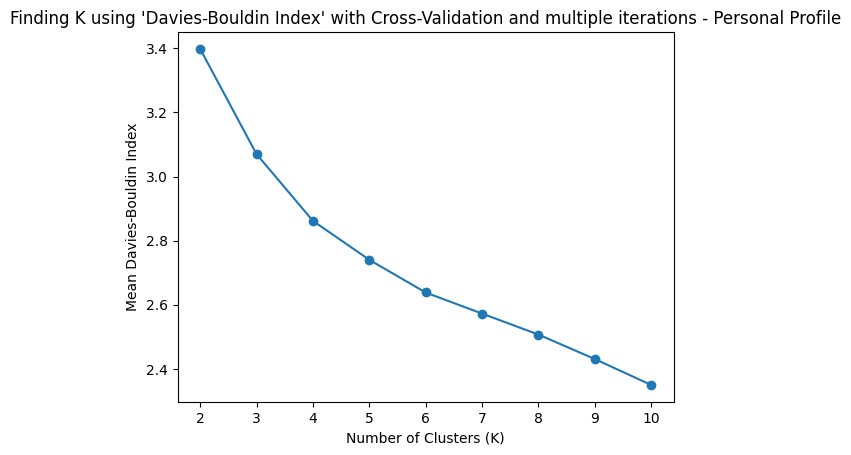

In [172]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Davies-Bouldin index for each K in each iteration
davies_bouldin_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Davies-Bouldin index for each K in this iteration
    davies_bouldin_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(personalProfile): # Loop over each split
        X_train = personalProfile.iloc[train_index] # Get the training data for this split

        # Calculate the Davies-Bouldin index of each K [for this split]
        davies_bouldin_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = davies_bouldin_score(X_train, labels) # Calculate the Davies-Bouldin index of this K [for this split]
            davies_bouldin_k.append(score) # Store the Davies-Bouldin index of each K [for this split]

        # Store the Davies-Bouldin index of each K, each split [for this iteration]
        davies_bouldin_iteration.append(davies_bouldin_k) 

    # Store the Davies-Bouldin index of each K, each split, each iteration
    davies_bouldin_iterations.append(davies_bouldin_iteration)

# Calculate the mean Davies-Bouldin index for each K across all iterations and splits
davies_bouldin_mean = np.mean(davies_bouldin_iterations, axis=0) # Calculate the mean Davies-Bouldin index across all iterations
davies_bouldin_mean = np.mean(davies_bouldin_mean, axis=0) # Calculate the mean Davies-Bouldin index across all splits

# Plot the Davies-Bouldin index curve
plt.plot(range(2, max_clusters + 1), davies_bouldin_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Davies-Bouldin Index')
plt.title("Finding K using 'Davies-Bouldin Index' with Cross-Validation and multiple iterations - Personal Profile")
plt.show()

### CALINSKI-HARABASZ INDEX - Best k = (2 > 3 > 4)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

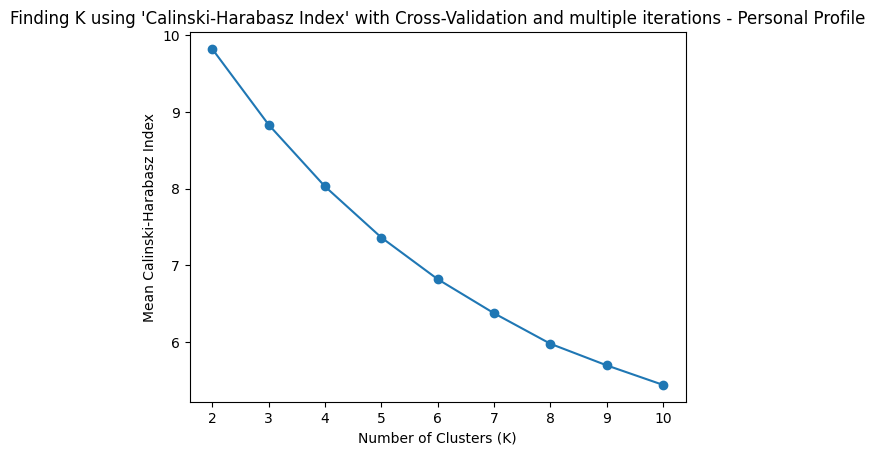

In [173]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Calinski-Harabasz index for each K in each iteration
calinski_harabasz_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Calinski-Harabasz index for each K in this iteration
    calinski_harabasz_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(personalProfile): # Loop over each split
        X_train = personalProfile.iloc[train_index] # Get the training data for this split

        # Calculate the Calinski-Harabasz index of each K [for this split]
        calinski_harabasz_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = calinski_harabasz_score(X_train, labels) # Calculate the Calinski-Harabasz index of this K [for this split]
            calinski_harabasz_k.append(score) # Store the Calinski-Harabasz index of each K [for this split]

        # Store the Calinski-Harabasz index of each K, each split [for this iteration]
        calinski_harabasz_iteration.append(calinski_harabasz_k) 

    # Store the Calinski-Harabasz index of each K, each split, each iteration
    calinski_harabasz_iterations.append(calinski_harabasz_iteration)

# Calculate the mean Calinski-Harabasz index for each K across all iterations and splits
calinski_harabasz_mean = np.mean(calinski_harabasz_iterations, axis=0) # Calculate the mean Calinski-Harabasz index across all iterations
calinski_harabasz_mean = np.mean(calinski_harabasz_mean, axis=0) # Calculate the mean Calinski-Harabasz index across all splits

# Plot the Calinski-Harabasz index curve
plt.plot(range(2, max_clusters + 1), calinski_harabasz_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Calinski-Harabasz Index')
plt.title("Finding K using 'Calinski-Harabasz Index' with Cross-Validation and multiple iterations - Personal Profile")
plt.show()

### GridSearchCV (4)

In [174]:
#Define the parameter values to search
#param_grid = {
#    'n_clusters': [3],  # Número de clústeres
#    'init': ['k-means++', 'random'],  # Método de inicialización de centroides
#    'n_init': ['auto', 'warn', 5, 10, 20, 50],  # Número de veces que se ejecuta el algoritmo con diferentes centroides
#    'max_iter': [150, 250, 300, 350, 450],  # Número máximo de iteraciones
#    'tol': [0.001, 0.0001, 0.00001],  # Tolerancia para el criterio de parada
#    'random_state': [42],  # Semilla para el generador de números aleatorios
#    'copy_x': [True, False],  # Si se copian los datos de entrada
#    'algorithm': ['elkan', 'lloyd']  # Algoritmo utilizado para el cálculo de los centroides
#}

In [175]:
# Build an instance of K-means
#kmeans = KMeans()
# Build a GridSearchCV instance with the model, the parameter dictionary and the cross-validation strategy
#cv = KFold(n_splits=15, shuffle=True, random_state=random_state)  # Ejemplo de validación cruzada con 5 divisiones
#grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=cv)
# Fit the model using GridSearch
#grid_search.fit(personalProfile)

# Obtain the best parameters and the best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

#############################################################################################################

#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 150, 'n_clusters': 3, 'n_init': 5, 'random_state': 42, 'tol': 0.001}
#Best Score: -53.02116802189091

#Best Parameters: {'algorithm': 'elkan', 'copy_x': True, 'init': 'random', 'max_iter': 100, 'n_clusters': 3, 'n_init': 5, 'random_state': 42, 'tol': 0.0001}
#Best Score: -53.02116802189091

## 5.2. Fit K-means

cluster_labels
0    68
2    55
1    30
Name: count, dtype: int64

Inertia: 746.4882352941175

N_iter: 9


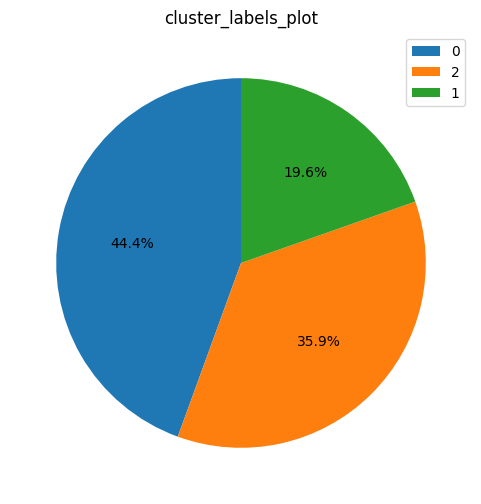

In [176]:
# Make the clusterization with the optimal number of clusters and the best parameters
kmeans = KMeans(n_clusters=3, algorithm='elkan', copy_x=True, init='random', max_iter=100, n_init=5, random_state=42, tol=0.0001)
kmeans.fit(personalProfile)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['cluster_labels'] = cluster_labels
# subtopiccs
subtopics_=subtopics.copy()
subtopics_['cluster_labels'] = cluster_labels
# topics
topics_=topics.copy()
topics_['cluster_labels'] = cluster_labels
# personalProfile
personalProfile_=personalProfile.copy()
personalProfile_['cluster_labels'] = cluster_labels
# save labels
labels_personalProfile=encuesta_.copy()
labels_personalProfile['cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster_labels_plot',figsize=(6,6))
plt.ylabel('')
plt.show()

## 5.3. Analysis

### Personal Profile

#### Bonferroni --> "pProfile_analysis_bonferroni"

In [177]:
# Prepare the data for the hipotesis test
X = personalProfile_.drop('cluster_labels', axis=1)  # P redictor variables
y = personalProfile_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [178]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False  True  True  True  True  True  True  True False False False False
 False False False False False False False False False  True False False
 False  True False  True False False]

p_values_corrected: [1.00000000e+00 6.27590185e-14 5.43643298e-10 8.26543226e-05
 2.37825629e-02 1.90991763e-10 1.25842127e-18 4.08290008e-30
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.17669101e-01
 2.35648822e-01 1.00000000e+00 9.91179112e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.88929781e-02 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.82720302e-03 1.75402125e-01 3.91374632e-07
 1.00000000e+00 1.00000000e+00]

rejectionsH0: 0.0017083156444657188

upperlLimitCI: 0.0016666666666666668


In [179]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Bonferroni correction
pProfile_analysis_bonferroni=subtopics_significance.drop(['p-value','Significant'], axis=1)
pProfile_analysis_bonferroni.rename(columns={'p-value_corrected':'p_value'}, inplace=True)

# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\3174694439.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable       p-value  p-value_corrected
1   actualStatus_student  2.091967e-15       6.275902e-14
2      actualStatus_work  1.812144e-11       5.436433e-10
3    homeCompany_friends  2.755144e-06       8.265432e-05
4      homeCompany_alone  7.927521e-04       2.378256e-02
5    homeCompany_parents  6.366392e-12       1.909918e-10
6     homeCompany_couple  4.194738e-20       1.258421e-18
7     homeCompany_family  1.360967e-31       4.082900e-30
21     aboutYou_romantic  6.297659e-04       1.889298e-02
25   aboutYou_videogames  6.090677e-05       1.827203e-03
27    aboutYou_dependent  1.304582e-08       3.913746e-07

In [180]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
                Variable  Group X  Group Y       p-value
0   actualStatus_student        0        1  9.448141e-11
1   actualStatus_student        1        2  2.336188e-08
2      actualStatus_work        0        1  1.364698e-09
3      actualStatus_work        1        2  2.204256e-07
4    homeCompany_friends        0        1  8.178743e-04
5    homeCompany_friends        1        2  2.747637e-03
6      homeCompany_alone        0        1  1.179067e-02
7      homeCompany_alone        0        2  3.933555e-04
8    homeCompany_parents        0        1  3.284264e-10
9    homeCompany_parents        0        2  3.787623e-02
10   homeCompany_parents        1        2  2.087827e-05
11    homeCompany_couple        0        2  2.282895e-16
12    homeCompany_couple        1        2  9.700492e-09
13    homeCompany_family        0        1  3.783943e-19
14    homeCompany_family        0        2  1.074825e-27
15     aboutYou_romantic        0        1  1.0

In [181]:
# Define a list to store the aggregation results
aggregation_results = []

# Iterate over the columns and apply the aggregation functions separately
for column in encuesta_.columns:
    column_aggregations = encuesta_.groupby('cluster_labels')[column].agg([
        ('sum', 'sum'),
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ])
    column_aggregations.columns = [f"{column}_{agg}" for agg in column_aggregations.columns]
    aggregation_results.append(column_aggregations)

# Concatenate the results into a single DataFrame
cluster_agg = pd.concat(aggregation_results, axis=1)

In [182]:
# Make a table with the conclusions
#results_P_pprofile=[
#    ['0', '22.2', '<1','>1','','<1','<2','<3 & >(1,2)','>(1,3)','>(1,2,3)','>(1,2,3)','>(2,3)','>3','>3','>(1,3)','>(2,3)','>(1,3)','<1','>3'],
#    ['1', '17', '>(0,2,3)','<(0,2,3)','>(2,3)','>(0,2,3)','<2','<(0,3)','<(0,2)','<0','<0 & >3','>(2,3)','','>3','<(0,2)','>(2,3)','<(0,2)','>(0,2,3)','>3'],
#    ['2', '28.8', '<1','>1','<1','<1','>(0,1,3)','<(0,3)','>1','<0','<0','<(0,1)','>3','>3','>(1,3)','<(0,1)','>(1,3)','<1',''],
#    ['3', '32', '<1','>1','<1','<1','<2','>(0,1,2)','<0','<0','<(0,1)','<(0,1)','<(0,2)','<(0,1,2)','<(0,2)','<(0,1)','<(0,2)','<1','<(0,1)']
#]
#results_P_pprofile_columns=['k', 'proportion','actualStatus_student', 'actualStatus_work', 'homeCompany_friends', 'homeCompany_parents', 'homeCompany_couple', 'homeCompany_family', 'aboutYou_car', 'aboutYou_smoke', 'aboutYou_party', 'aboutYou_couch', 'aboutYou_thinkAboutHappiness', 'aboutYou_profitableDay', 'aboutYou_healthyFood', 'aboutYou_romantic', 'aboutYou_spontaneous', 'aboutYou_dependent', 'aboutYou_sciences']
#results_P_pprofile=pd.DataFrame(results_P_pprofile, columns=results_P_pprofile_columns)
#results_P_pprofile.to_excel('results_P_pprofile.xlsx', index=False)
#results_P_pprofile

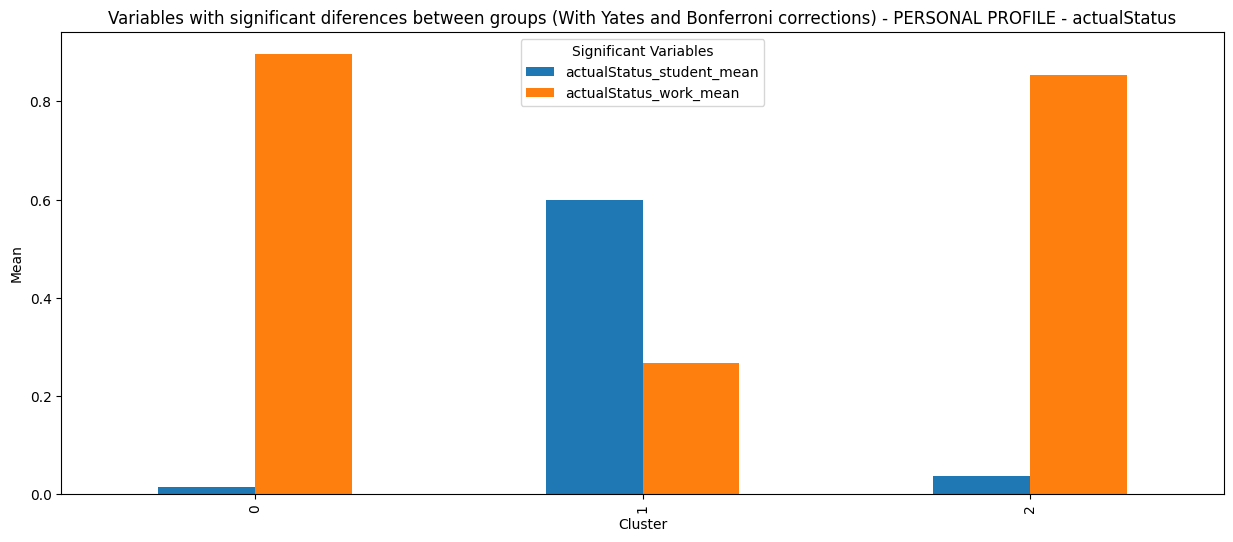

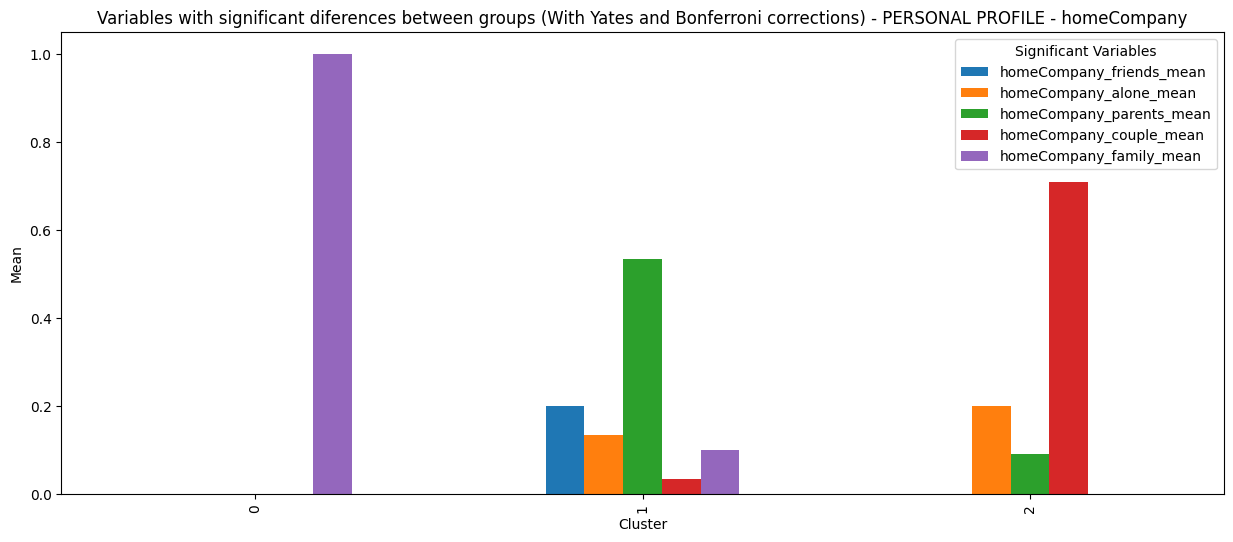

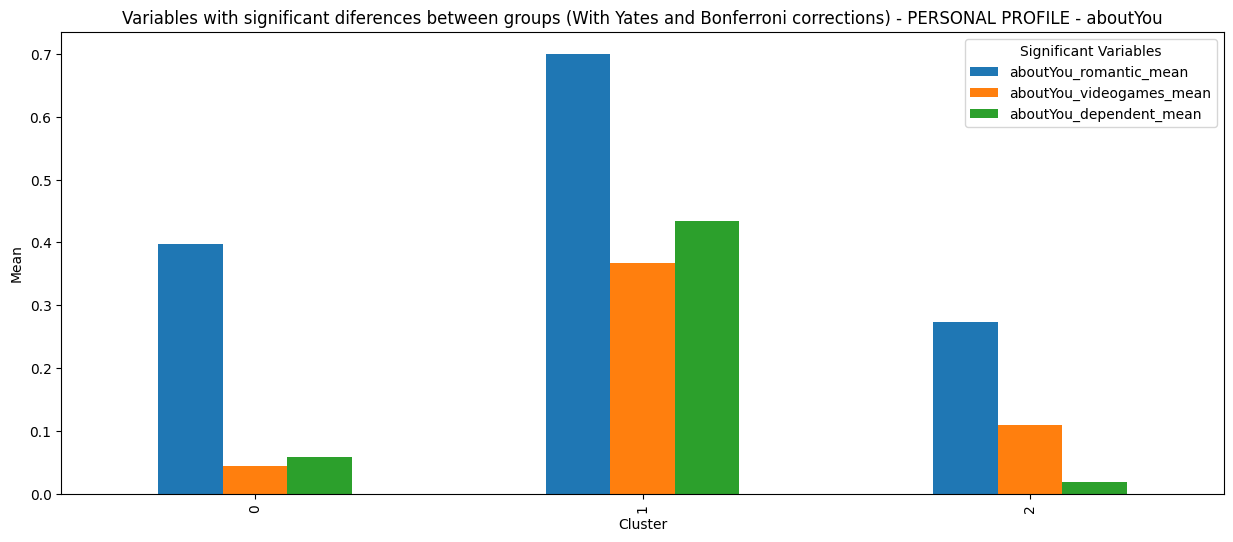

In [183]:
# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title=f'Variables with significant diferences between groups (With Yates and Bonferroni corrections) - PERSONAL PROFILE - {genre}', figsize=(15, 6))
            plt.xlabel('Cluster')
            plt.ylabel('Mean')
            plt.legend(title='Significant Variables')
            plt.show()

#### Holm-Bonferroni --> "pProfile_analysis_HBonferroni"

In [184]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='holm')

# Identification of significant variables
pProfile_significance_HBonferroni = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Holm-Bonferroni correction
pProfile_analysis_HBonferroni = pProfile_significance_HBonferroni.drop(['p-value', 'Significant'], axis=1)
pProfile_analysis_HBonferroni.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Benjamini-Hochberg --> "pProfile_analysis_bHochberg"

In [185]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')

# Identification of significant variables
pProfile_significance_bHochberg = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Benjamini-Hochberg correction
pProfile_analysis_bHochberg = pProfile_significance_bHochberg.drop(['p-value', 'Significant'], axis=1)
pProfile_analysis_bHochberg.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

#### Mean 3 corrections --> "pProfile_analysis"

In [186]:
# Merge the results of the three corrections
pProfile_analysis=pd.merge(pProfile_analysis_bonferroni, pProfile_analysis_HBonferroni, on='Variable')
pProfile_analysis=pd.merge(pProfile_analysis, pProfile_analysis_bHochberg, on='Variable')

# Obtain the mean of significance of the three corrections
pProfile_analysis['p_value_mean'] = pProfile_analysis[['p_value_x', 'p_value_y', 'p_value']].mean(axis=1)

# Save the results
pProfile_analysis_=pProfile_analysis.copy()
pProfile_analysis_.sort_values(by='p_value_mean', inplace=True)
pProfile_analysis_.to_excel('pProfile_analysis_.xlsx', index=False)

# Drop the columns of the three corrections
pProfile_analysis.drop(['p_value_x', 'p_value_y', 'p_value'], axis=1, inplace=True)
print(pProfile_analysis.shape)
pProfile_analysis.head()

(30, 2)


Variable  p_value_mean
0     actualStatus_free  9.488966e-01
1  actualStatus_student  4.741793e-14
2     actualStatus_work  3.745098e-10
3   homeCompany_friends  5.352851e-05
4     homeCompany_alone  1.426954e-02

### Topics

In [187]:
# Prepare the data for the hipotesis test
X = topics_.drop('cluster_labels', axis=1)  # Predictor variables
y = topics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [188]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False False False False False False False False]

p_values_corrected: [0.21995942 1.         1.         1.         1.         1.
 0.53382257 0.56829852]

rejectionsH0: 0.006391150954545011

upperlLimitCI: 0.00625


In [189]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\598332224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Empty DataFrame
Columns: [Variable, p-value, p-value_corrected]
Index: []

In [190]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)

            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
Empty DataFrame
Columns: [Variable, Group X, Group Y, p-value]
Index: []


In [191]:
# Create a table with the conclusions
#results_T_topics=[
#    ['0', '35.9', '<(2,3)','>(1,2)','<1, >2','<(1,2)','>(1,3)'],
#    ['1', '24.2', '<(2,3)','<(0,3)','>(0,2,3)','>0','<0, >3'],
#    ['2', '23.5', '>(0,1)','<(0,3)','<(0,1,3)','>0','>3'],
#    ['3', '16.3', '>(0,1)','>(1,2)','<1, >2','','<(0,1,2)']
#]
#results_T_topics_columns=['k', 'proportion', 'topics_sport', 'topics_food', 'topics_alienPerson', 'topics_productiveTime', 'topics_hobbies']
#results_T_topics=pd.DataFrame(results_T_topics, columns=results_T_topics_columns)
#results_T_topics

In [192]:
# Obtain the "genres" present in the significant variables
significant_variables = subtopics_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

### Sutopics

In [193]:
# Prepare the data for the hipotesis test
X = subtopics_.drop('cluster_labels', axis=1)  # Predictor variables
y = subtopics_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [194]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False  True False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]

p_values_corrected: [1.         0.00469037 1.         1.         1.         1.
 1.         1.         0.01664917 0.11183241 1.         1.
 1.         1.         0.05502369 1.         1.         1.
 1.         1.         0.51468929 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99632015 1.         1.         1.
 1.         1.         1.         1.        ]

rejectionsH0: 0.0009859231655185985

upperlLimitCI: 0.0009615384615384616


In [195]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})
# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\598332224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable  p-value  p-value_corrected
1  productiveTime_study  0.00009           0.004690
8         social_family  0.00032           0.016649

In [196]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)

            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
               Variable  Group X  Group Y   p-value
0  productiveTime_study        0        1  0.000219
1  productiveTime_study        1        2  0.000266
2         social_family        0        1  0.001313
3         social_family        1        2  0.014460


In [197]:
# Create a table with the conclusions
#results_P_subtopics=[
#    ['0', '22.2', '<1', '<2', '>(1,2,3)'],
#    ['1', '17', '>(0,2,3)', '<(2,3)', '<0'],
#    ['2', '28.8', '<1', '>(0,1)', '<0'],
#    ['3', '32', '<1', '>1', '<0']
#]
#results_P_subtopics_columns=['k', 'proportion', 'productiveTime_study', 'hobbies_reading', 'vices_tobacco']
#results_P_subtopics=pd.DataFrame(results_P_subtopics, columns=results_P_subtopics_columns)
#results_P_subtopics

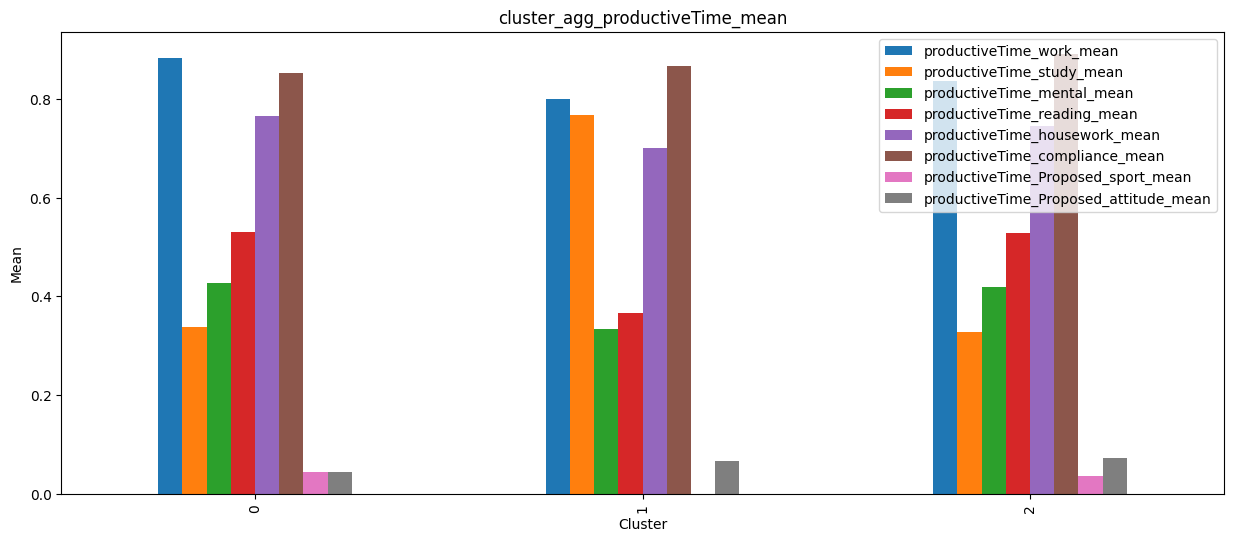

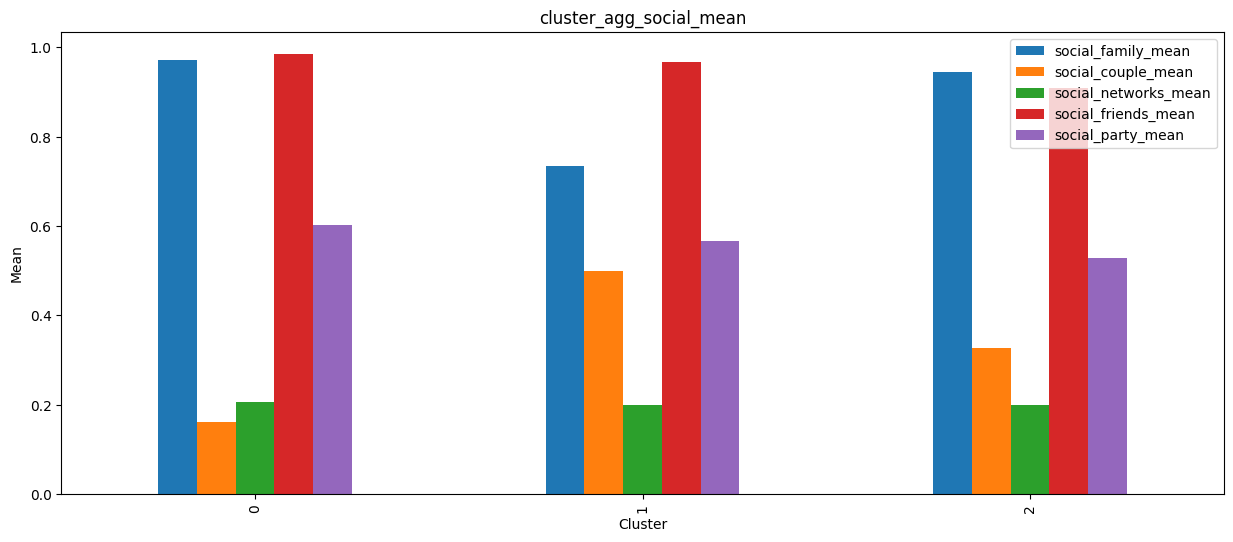

In [198]:
# Obtain the "genres" present in the significant variables
significant_variables = subtopics_significance_true['Variable'].tolist()
genres = set()

for variable in significant_variables:
    genre = variable.split('_')[0]  # Obtain the "genres" present in the significant variables
    genres.add(genre)

# Iterate over the genres and plot the results
for genre in genres:
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        genre_mean_columns.plot(kind='bar', title=f'cluster_agg_{genre}_mean', figsize=(15, 6))
        plt.xlabel('Cluster')
        plt.ylabel('Mean')
        plt.show()

## 5.4. Random forest [0.9201075268817206 - 30 terations - 50s]

### Finding best parameters

In [199]:
# Split the data into training (X) and test (y) sets
X = personalProfile_.drop('cluster_labels', axis=1)  # Eliminar la columna de etiquetas
y = personalProfile_['cluster_labels']

In [200]:
#param_grid = {
#    'n_estimators': [50, 100, 200],#The number of trees in the forest
#    'bootstrap': [True],#Whether bootstrap samples are used when building trees
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'max_depth': [None],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],#The minimum number of samples required to be at a leaf node
#    'min_impurity_decrease': [0.0],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'max_features': ['sqrt', 'log2'],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None],#Grow trees with max_leaf_nodes in best-first fashion
#    'n_jobs': [-1],#The number of jobs to run in parallel for both fit and predict.
#    'oob_score': [True, False],#Whether to use out-of-bag samples to estimate the generalization accuracy
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', 'balanced_subsample', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [201]:
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)  # Reemplaza X e y con tus datos

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)  # Reemplaza X e y con tus datos
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.93548387 0.96774194 0.93548387 1.         0.93333333]
#Mean cross-validation score: 0.9544086021505377
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9544086021505377

#[0.93548387 0.96774194 0.93548387 1.         0.93333333]
#Mean cross-validation score: 0.9544086021505377
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9544086021505377

#[0.93548387 0.96774194 0.93548387 1.         0.93333333]
#Mean cross-validation score: 0.9544086021505377
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9544086021505377

### Fitting and analyzing the model

In [202]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 30
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Random Forest model with the best parameters found
        rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)

        # Train the model
        rf.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(rf.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = rf.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
pProfile_RF = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_pProfile_RF = np.mean(accuracy_list)
accuracy_std_mean_pProfile_RF = np.mean(accuracy_std_list)
print("accuracy_mean_pProfile_RF:", accuracy_mean_pProfile_RF)
print("pProfile_RF.shape:",pProfile_RF.shape)
print("sum importance:",pProfile_RF['importance'].sum())
pProfile_RF.head()

#rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_pProfile_RF: 0.9245161290322581
#accuracy_mean_pProfile_RF x 20: 0.9197204301075269
#accuracy_mean_pProfile_RF x 30: 0.9201075268817206

accuracy_mean_pProfile_RF: 0.9478853046594983
pProfile_RF.shape: (30, 2)
sum importance: 1.0


characteristics  importance
0     actualStatus_free    0.006525
1  actualStatus_student    0.064529
2     actualStatus_work    0.066063
3   homeCompany_friends    0.014863
4     homeCompany_alone    0.026131

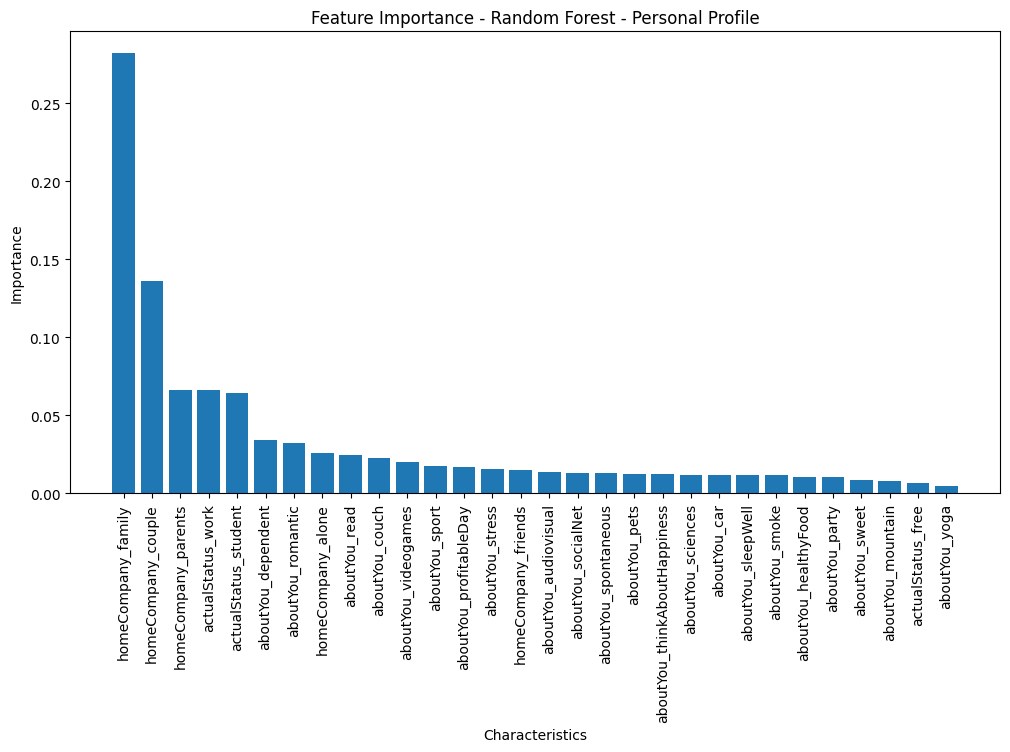

In [203]:
# Sort the DataFrame by descending importance
pProfile_RF_sorted = pProfile_RF.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(pProfile_RF_sorted['characteristics'], pProfile_RF_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest - Personal Profile')
plt.show()

In [204]:
# Select the most important features
pProfile_RF_top = pProfile_RF_sorted.head(4)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
pProfile_RF_groupValues = personalProfile_[['cluster_labels'] + pProfile_RF_top]

# Group by cluster and get feature values for each group
pProfile_RF_groupedValues = pProfile_RF_groupValues.groupby('cluster_labels').mean().reset_index()
pProfile_RF_groupedValues

cluster_labels  homeCompany_family  homeCompany_couple   
0               0                 1.0            0.000000  \
1               1                 0.1            0.033333   
2               2                 0.0            0.709091   

   homeCompany_parents  actualStatus_work  
0             0.000000           0.897059  
1             0.533333           0.266667  
2             0.090909           0.854545

### DecisionTreeClassifier

In [205]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'splitter': ['best', 'random'],#The strategy used to choose the split at each node
#    'max_depth': [None, 3, 5],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5],#The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.05, 0.01, 0.1],#The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],#Grow trees with max_leaf_nodes in best-first fashion
#    'min_impurity_decrease': [0.0, 0.05, 0.01, 0.1],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [206]:
#tree_model = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.77419355 0.74193548 0.83870968 0.9        0.83333333]
#Mean cross-validation score: 0.8176344086021505
#Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.05, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}
#Best score: 0.8176344086021505

#[0.77419355 0.77419355 0.83870968 0.9        0.83333333]
#Mean cross-validation score: 0.8240860215053762
#Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.03, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.8240860215053762

#x2 (another exact copy of combination params found)

In [207]:
# Build and train the decision tree model with the best parameters found
#tree_model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='random')
#tree_model=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.03, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')
#
#tree_model.fit(X, y)
#
## Transform the values of y to strings
#y_str = y.astype(str)
#
## Export the decision tree in DOT format
#dot_data = export_graphviz(tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)
#
## Create the tree graph using graphviz
#graph = graphviz.Source(dot_data)
#
## Show the tree graph
#graph.render("decision_tree_pProfile")  # Save the tree graph as PDF
#graph.view()  # Show the tree graph

In [208]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1500
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        #tree_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None, max_features='sqrt', max_leaf_nodes=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')        
        tree_model=DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='random')


        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("decision_tree_pProfile")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

'decision_tree_pProfile.pdf'

## 5.5 GradientBoosting [0.939883870967742 - 50 Iterations - 50s]

### Finding best parameters

In [209]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [50, 100, 200],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [2, 3, 5],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_depth': [3, 5],  # The maximum depth of the tree
#    'max_features': [1.0, 'sqrt', 'log2', None],  # The number of features to consider when looking for the best split
#}

In [210]:
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.93548387 0.96774194 0.96774194 1.         0.93333333]
#Mean cross-validation score: 0.9608602150537635
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9608602150537635

#[0.93548387 0.96774194 0.96774194 1.         0.93333333]
#Mean cross-validation score: 0.9608602150537635
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9608602150537635

#[0.93548387 0.96774194 0.96774194 1.         0.93333333]
#Mean cross-validation score: 0.9608602150537635
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.05, 'loss': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9608602150537635

### Fitting and analyzing the model

In [211]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 50
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Gradient Boosting model with the best parameters found
        gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05, loss='log_loss', max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.75)
        # Train the model
        gb.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(gb.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = gb.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
pProfile_GB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_pProfile_GB = np.mean(accuracy_list)
accuracy_std_mean_pProfile_GB = np.mean(accuracy_std_list)
print("accuracy_mean_pProfile_GB:", accuracy_mean_pProfile_GB)
print("pProfile_GB.shape:",pProfile_GB.shape)
print("sum importance:",pProfile_GB['importance'].sum())
pProfile_GB.head()

#gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05, loss='log_loss', max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.75)
#accuracy_mean_pProfile_GB: 0.9448817204301075
#accuracy_mean_pProfile_GB x 20: 0.9403225806451614
#accuracy_mean_pProfile_GB x 30: 0.9414408602150537
#accuracy_mean_pProfile_GB x 40: 0.9405913978494624
#accuracy_mean_pProfile_GB x 50: 0.939883870967742

accuracy_mean_pProfile_GB: 0.9452043010752689
pProfile_GB.shape: (30, 2)
sum importance: 0.9999999999999998


characteristics  importance
0     actualStatus_free    0.007921
1  actualStatus_student    0.061176
2     actualStatus_work    0.052169
3   homeCompany_friends    0.023953
4     homeCompany_alone    0.044398

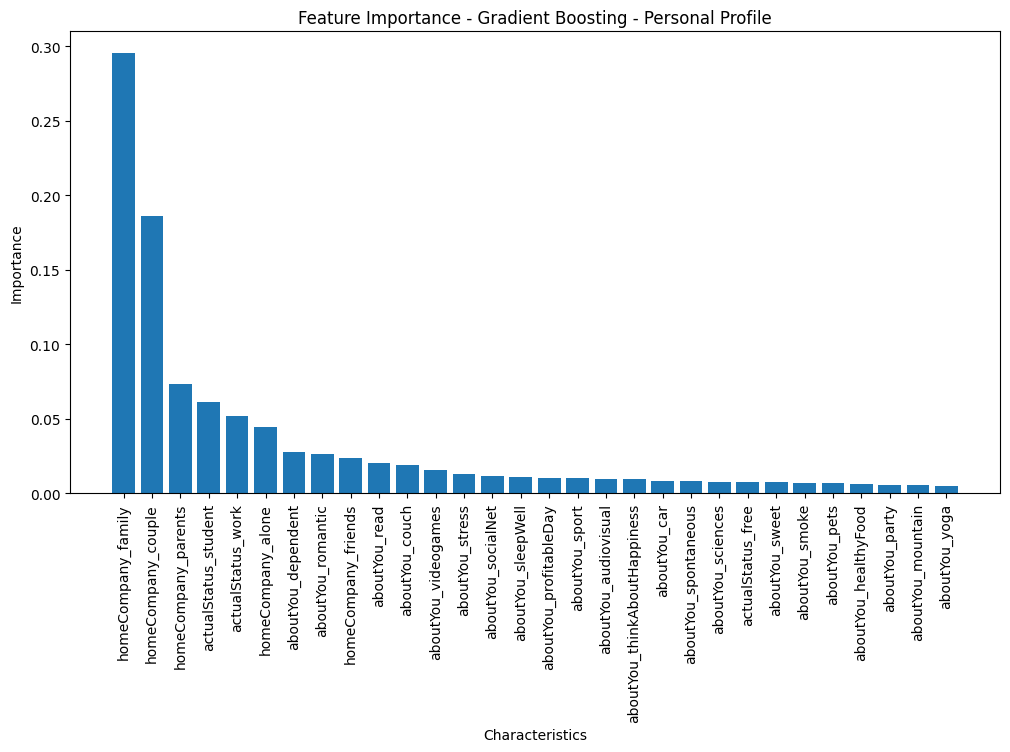

In [212]:
# Sort the DataFrame by descending importance
pProfile_GB_sorted = pProfile_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(pProfile_GB_sorted['characteristics'], pProfile_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting - Personal Profile')
plt.show()

In [213]:
# Select the most important features
pProfile_GB_top = pProfile_GB_sorted.head(6)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
pProfile_GB_groupValues = personalProfile_[['cluster_labels'] + pProfile_GB_top]

# Group by cluster and get feature values for each group
pProfile_GB_groupedValues = pProfile_GB_groupValues.groupby('cluster_labels').mean().reset_index()
pProfile_GB_groupedValues

cluster_labels  homeCompany_family  homeCompany_couple   
0               0                 1.0            0.000000  \
1               1                 0.1            0.033333   
2               2                 0.0            0.709091   

   homeCompany_parents  actualStatus_student  actualStatus_work   
0             0.000000              0.014706           0.897059  \
1             0.533333              0.600000           0.266667   
2             0.090909              0.036364           0.854545   

   homeCompany_alone  
0           0.000000  
1           0.133333  
2           0.200000

## 5.6 SVM [0.9309605734767026 - 1500 Iterations - 42s]

### Finding best parameters

In [214]:
#param_grid = {
#    'C': [1, 2, 5],  # Inverse of regularization strength
#    'kernel': ['linear'],  # Specifies the kernel type to be used in the algorithm
#    'degree': [2, 3, 5],  # Degree of the polynomial kernel function ('poly')
#    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#    'coef0': [0.0, 0.001, 0.01],  # Independent term in kernel function
#    'shrinking': [True, False],  # Whether to use the shrinking heuristic
#    'probability': [True, False],  # Whether to enable probability estimates
#    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criterion
#    'cache_size': [200],  # Specify the size of the kernel cache (in MB)
#    'class_weight': ['balanced', None],  # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#    'max_iter': [-1],  # Hard limit on iterations within solver, or -1 for no limit
#    'decision_function_shape': ['ovo', 'ovr'],  # Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one ('ovo') decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)
#    'break_ties': [False],  # If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned
#    'random_state': [42],  # Controls the pseudo random number generation for shuffling the data for probability estimates
#}

In [215]:
#svc = SVC()
#grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.90322581 0.96774194 0.87096774 0.96666667 0.96666667]
#Mean cross-validation score: 0.9350537634408603
#Best parameters: {'C': 5, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.0001}
#Best score: 0.9350537634408603
#param_grid = {

#[0.90322581 0.96774194 0.87096774 0.96666667 0.96666667]
#Mean cross-validation score: 0.9350537634408603
#Best parameters: {'C': 3, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#Best score: 0.9350537634408603

### Fitting and analyzing the model

In [216]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1500
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a SVM model with the best parameters found
        svm=SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.0001)

        # Train the model
        svm.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(np.abs(svm.coef_[0]))
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = svm.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Normalize the weighted feature importances to sum up to 1
feature_importances_normalized = feature_importances_weighted / np.sum(np.abs(feature_importances_weighted))

# Build the final dataset with the features and their importance
pProfile_SVM = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_normalized})

# Results
accuracy_mean_pProfile_SVM = np.mean(accuracy_list)
accuracy_std_mean_pProfile_SVM = np.mean(accuracy_std_list)
print("accuracy_mean_pProfile_SVM:", accuracy_mean_pProfile_SVM)
print("pProfile_SVM.shape:",pProfile_SVM.shape)
print("sum importance:",pProfile_SVM['importance'].sum())
pProfile_SVM.head()

#Best parameters: {'C': 3, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#svm=SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.00001)
#accuracy_mean_pProfile_SVM x 500: 0.9303982795698925
#accuracy_mean_pProfile_SVM x 1000: 0.9304778494623656

#svm=SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.0001)
#accuracy_mean_pProfile_SVM x 500: 0.9308279569892474
#accuracy_mean_pProfile_SVM x 1000: 0.9309744086021505
#accuracy_mean_pProfile_SVM x 1500: 0.9309605734767026

accuracy_mean_pProfile_SVM: 0.9715760573476704
pProfile_SVM.shape: (30, 2)
sum importance: 0.9999999999999999


characteristics  importance
0     actualStatus_free    0.028203
1  actualStatus_student    0.098650
2     actualStatus_work    0.070472
3   homeCompany_friends    0.032785
4     homeCompany_alone    0.027875

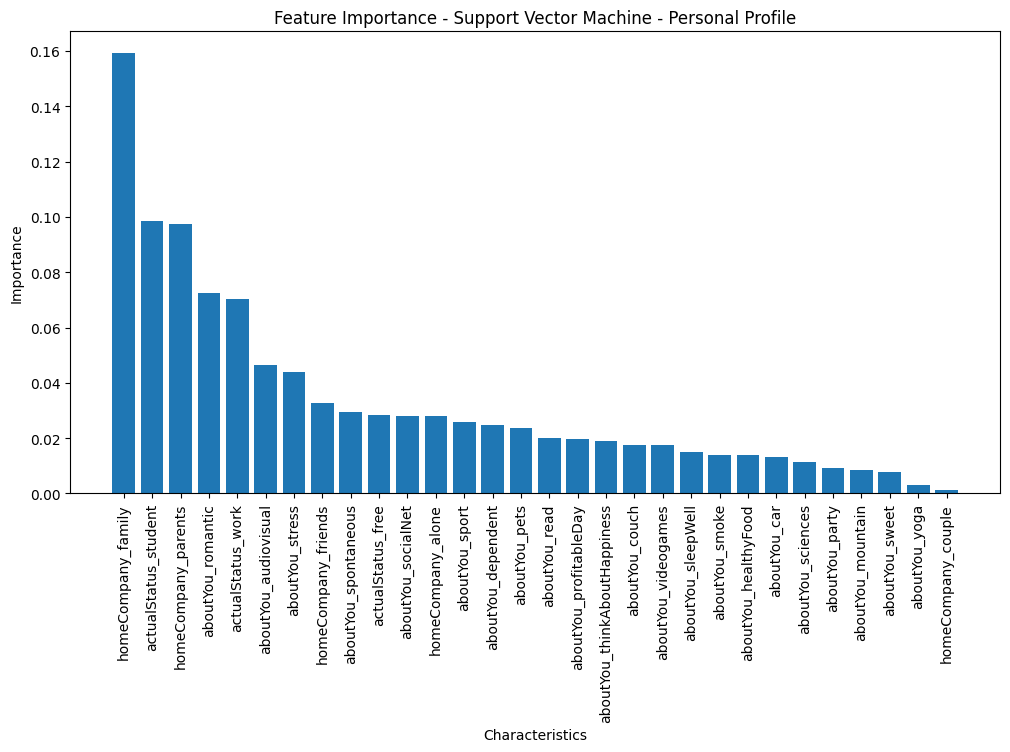

In [217]:
# Sort the DataFrame by descending importance
pProfile_SVM_sorted = pProfile_SVM.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(pProfile_SVM_sorted['characteristics'], pProfile_SVM_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Support Vector Machine - Personal Profile')
plt.show()

In [218]:
# Select the most important features
pProfile_SVM_top = pProfile_SVM_sorted.head(5)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
pProfile_SVM_groupValues = personalProfile_[['cluster_labels'] + pProfile_SVM_top]

# Group by cluster and get feature values for each group
pProfile_SVM_groupedValues = pProfile_SVM_groupValues.groupby('cluster_labels').mean().reset_index()
pProfile_SVM_groupedValues

cluster_labels  homeCompany_family  actualStatus_student   
0               0                 1.0              0.014706  \
1               1                 0.1              0.600000   
2               2                 0.0              0.036364   

   homeCompany_parents  aboutYou_romantic  actualStatus_work  
0             0.000000           0.397059           0.897059  
1             0.533333           0.700000           0.266667  
2             0.090909           0.272727           0.854545

## 5.7. XGBOOST [0.9232290322580647 - 200 Iterations - 41s]

### Finding best parameters

In [219]:
#param_grid = {
#    'learning_rate': [0.05, 0.1, 0.2],
#    'n_estimators': [50, 100, 200],
#    'max_depth': [2, 3, 5],
#    'min_child_weight': [1, 2, 3],
#    'subsample': [1, 0.9, 0.7],
#    'colsample_bytree': [1, 0.9, 0.7],
#    'gamma': [0, 0.001, 0.01],
#    'reg_alpha': [0, 0.001, 0.01],
#    'reg_lambda': [1, 0.9, 0.7],
#    'random_state': [42],
#}

In [220]:
#xgb_model = xgb.XGBClassifier()
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.87096774 0.96774194 0.93548387 1.         0.96666667]
#Mean cross-validation score: 0.9481720430107528
#Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.7, 'subsample': 0.7}
#Best score: 0.9481720430107528

#[0.87096774 0.96774194 0.93548387 1.         0.96666667]
#Mean cross-validation score: 0.9481720430107528
#Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.8, 'subsample': 0.7}
#Best score: 0.9481720430107528

### Fitting and analyzing the model

In [221]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 200
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a XGBoost model with the best parameters found
        xgb_model=xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=50, random_state= 42, reg_alpha=0, reg_lambda=0.7, subsample=0.7)

        # Train the model
        xgb_model.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(xgb_model.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = xgb_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
pProfile_XGB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_pProfile_XGB = np.mean(accuracy_list)
accuracy_std_mean_pProfile_XGB = np.mean(accuracy_std_list)
print("accuracy_mean_pProfile_XGB:", accuracy_mean_pProfile_XGB)
print("pProfile_XGB.shape:",pProfile_XGB.shape)
print("sum importance:",pProfile_XGB['importance'].sum())
pProfile_XGB.head()

#xgb_model=xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.15, max_depth=5, min_child_weight=4, n_estimators=50, random_state= 42, reg_alpha=0, reg_lambda=0.8, subsample=0.7)
#accuracy_mean_pProfile_XGB: 0.921505376344086
#accuracy_mean_pProfile_XGB x 100: 0.9141591397849461
#accuracy_mean_pProfile_XGB x 200: 0.9129236559139784

#Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.15, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 50, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.8, 'subsample': 0.7}
#xgb_model=xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=50, random_state= 42, reg_alpha=0, reg_lambda=0.7, subsample=0.7)
#accuracy_mean_pProfile_XGB: 0.9312903225806451
#accuracy_mean_pProfile_XGB x 100: 0.9231333333333335
#accuracy_mean_pProfile_XGB x 200: 0.9232290322580647

accuracy_mean_pProfile_XGB: 0.9591817204301075
pProfile_XGB.shape: (30, 2)
sum importance: 0.9999999992245024


characteristics  importance
0     actualStatus_free    0.021694
1  actualStatus_student    0.130739
2     actualStatus_work    0.035665
3   homeCompany_friends    0.000000
4     homeCompany_alone    0.077481

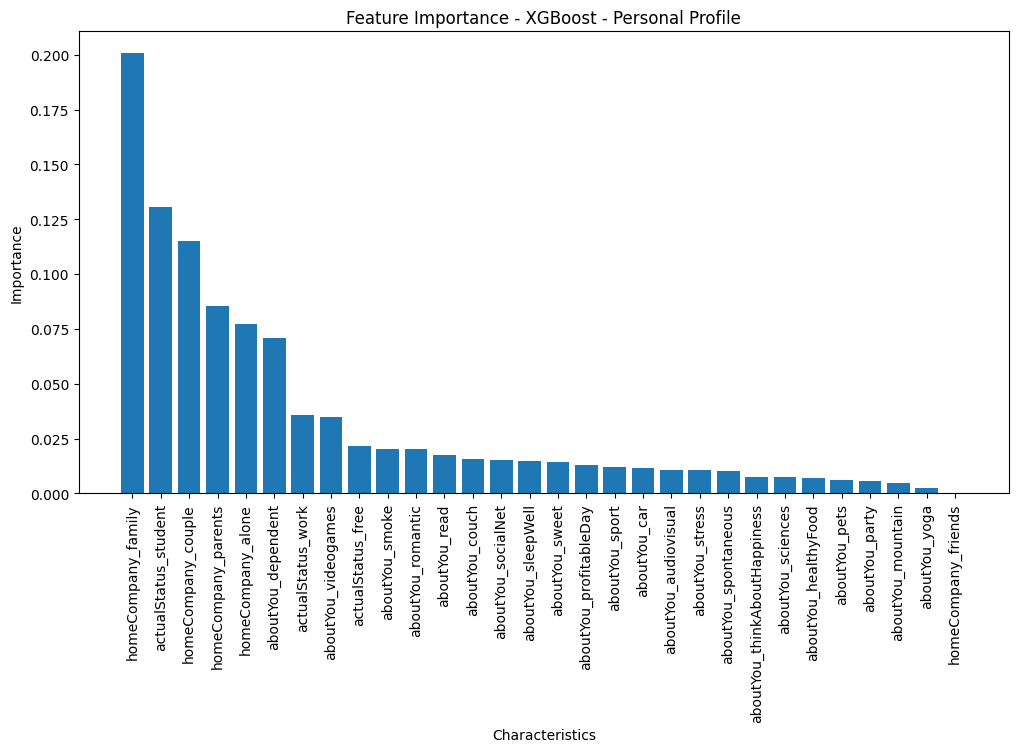

In [222]:
# Sort the DataFrame by descending importance
pProfile_XGB_sorted = pProfile_XGB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(pProfile_XGB_sorted['characteristics'], pProfile_XGB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost - Personal Profile')
plt.show()

In [223]:
# Select the most important features
pProfile_XGB_top = pProfile_XGB_sorted.head(4)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
pProfile_XGB_groupValues = personalProfile_[['cluster_labels'] + pProfile_XGB_top]

# Group by cluster and get feature values for each group
pProfile_XGB_groupedValues = pProfile_XGB_groupValues.groupby('cluster_labels').mean().reset_index()
pProfile_XGB_groupedValues

cluster_labels  homeCompany_family  actualStatus_student   
0               0                 1.0              0.014706  \
1               1                 0.1              0.600000   
2               2                 0.0              0.036364   

   homeCompany_couple  homeCompany_parents  
0            0.000000             0.000000  
1            0.033333             0.533333  
2            0.709091             0.090909

## 5.8. Ensamble

In [224]:
# List of datasets and accuracy of each model
datasets = [pProfile_RF, pProfile_GB, pProfile_SVM, pProfile_XGB]
accuracies = [accuracy_mean_pProfile_RF, accuracy_mean_pProfile_GB, accuracy_mean_pProfile_SVM, accuracy_mean_pProfile_XGB]

# Calculate the weights according to the model accuracy
weights = [accuracy / sum(accuracies) for accuracy in accuracies]

# Assemble the weighted feature importances
feature_importances_weighted = np.zeros(len(datasets[0]))  # Initialize with zeros the size of the characteristics
for weight, dataset in zip(weights, datasets):
    feature_importances_weighted += weight * dataset['importance']

# Build the final dataset with the features and their assembled importance
pProfile_importance = pd.DataFrame({'characteristics': datasets[0]['characteristics'], 'importance': feature_importances_weighted})

# Ensure that the importance sum is equal to 1
pProfile_importance['importance'] = pProfile_importance['importance'] / pProfile_importance['importance'].sum()
pProfile_importance.head()

characteristics  importance
0     actualStatus_free    0.016183
1  actualStatus_student    0.088978
2     actualStatus_work    0.056124
3   homeCompany_friends    0.017936
4     homeCompany_alone    0.043970

In [225]:
# Find a weight factor by weighting the accuracy of each model
weight_factor = sum([accuracy / sum(accuracies) * accuracy for accuracy in accuracies])
weight_factor

0.9560756387251166

In [226]:
# Create the subtopics_importance_ dataset with the model importances
pProfile_importance_ = pProfile_importance.copy()
pProfile_importance_.rename(columns={'importance': f'importance_ensamble{weight_factor:.4f}'}, inplace=True)

model_names=['RF', 'GB', 'SVM', 'XGB', 'ensamble']
for i, dataset in enumerate(datasets):
    model_name = f'_{model_names[i]}_{accuracies[i]:.4f}'
    pProfile_importance_[f'importance{model_name}'] = dataset['importance']

pProfile_importance_.sort_values(by=f'importance_ensamble{weight_factor:.4f}', ascending=False, inplace=True)
pProfile_importance_round_=round(pProfile_importance_, 4)
pProfile_importance_round_.to_excel('pProfile_importance_.xlsx')
pProfile_importance_round_.head()

characteristics  importance_ensamble0.9561  importance_RF_0.9479   
7    homeCompany_family                     0.2336                0.2820  \
6    homeCompany_couple                     0.1088                0.1360   
1  actualStatus_student                     0.0890                0.0645   
5   homeCompany_parents                     0.0808                0.0661   
2     actualStatus_work                     0.0561                0.0661   

   importance_GB_0.9452  importance_SVM_0.9716  importance_XGB_0.9592  
7                0.2952                 0.1591                 0.2006  
6                0.1859                 0.0011                 0.1151  
1                0.0612                 0.0987                 0.1307  
5                0.0734                 0.0973                 0.0857  
2                0.0522                 0.0705                 0.0357

In [227]:
# Transform the p-values into importance by subtracting them from 1
pProfile_analysis['1_minus_p_value_mean'] = 1 - pProfile_analysis['p_value_mean']

# Calculate the importance of features based on normalized transformed p-values
pProfile_analysis['importance_p_value'] = pProfile_analysis['1_minus_p_value_mean'] / pProfile_analysis['1_minus_p_value_mean'].sum()

# Ensure that the sum of importance_p_value is equal to 1
print(pProfile_analysis['importance_p_value'].sum())

# Combine the information of subtopics_final and subtopics_analysis using the weight factor
pProfile_importance['importance_p_value'] = pProfile_analysis['importance_p_value']
pProfile_importance['combined_importance'] = pProfile_importance['importance_p_value'] * (1 - weight_factor) + pProfile_importance['importance'] * weight_factor
pProfile_importance['p_value_mean'] = pProfile_analysis['p_value_mean']

#sort by combined_importance
pProfile_importance = pProfile_importance.sort_values('combined_importance', ascending=False)
pProfile_importance.to_excel('pProfile_ensamble.xlsx')
pProfile_importance.head()

1.0


characteristics  importance  importance_p_value  combined_importance   
7    homeCompany_family    0.233617            0.060385             0.226008  \
6    homeCompany_couple    0.108829            0.060385             0.106701   
1  actualStatus_student    0.088978            0.060385             0.087722   
5   homeCompany_parents    0.080759            0.060385             0.079864   
2     actualStatus_work    0.056124            0.060385             0.056311   

   p_value_mean  
7  4.082900e-30  
6  1.034702e-18  
1  4.741793e-14  
5  1.368774e-10  
2  3.745098e-10

# 6. General (Without Confounding Variables)

## 6.1. Find k (for k-means) and best parameter combination
- Best K with Elbow Method = (2>3>4>6)
- Best K with Silhouette Method = (2>>3>>4)
- Best K with GridSearchCV = 4

In [228]:
encuesta2=encuesta.copy()
# Drop confounding variables
encuesta2.drop(['sex_Man', 'sex_Woman', 'sex_Other', 'age', 'size', 'weight'], axis=1, inplace=True)
print(encuesta2.shape)

(153, 90)


### ELBOW - Best k = (2 >> 3 > 4)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

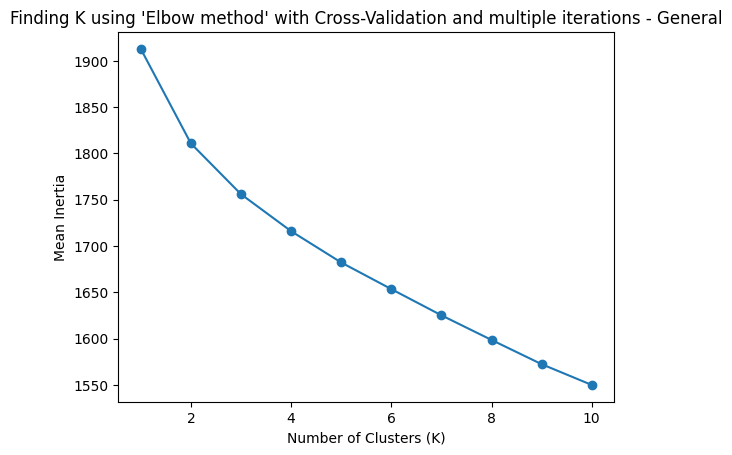

In [229]:
# ELBOW METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of inertia for each K in each iteration
inertia_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # Create a KMeans object
    kmeans = KMeans(n_clusters=max_clusters, random_state=random_state)
    
    # List to store the inertia for each K in this iteration
    inertia_iteration = []
    
    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(encuesta2):# Loop over each split
        X_train = encuesta2.iloc[train_index] # Get the training data for this split
        
        # Find the inertia of each K [for this split]
        inertia_k = [] # List to store the inertia of each K [for this split]
        for k in np.linspace(1, max_clusters, max_clusters, dtype=int): # Loop over each K
            kmeans.n_clusters = k # Actualize the number of clusters in the KMeans object
            kmeans.fit(X_train) # Fit the KMeans object with the training data
            inertia_k.append(kmeans.inertia_) # Store the inertia of each K [for this split]
        
        # Store the inertia results of each K, each split [for this iteration]
        inertia_iteration.append(inertia_k)
    
    # Store the inertia results of each K, each split, each iteration
    inertia_iterations.append(inertia_iteration)

# Calculate the mean inertia for each K across all iterations and splits
inertia_mean = np.mean(inertia_iterations, axis=0) # Calculate the mean inertia across all iterations
inertia_mean = np.mean(inertia_mean, axis=0) # Calculate the mean inertia across all splits

# Plot the curve of mean inertia vs K
plt.plot(np.linspace(1, max_clusters, max_clusters, dtype=int), inertia_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Inertia')
plt.title("Finding K using 'Elbow method' with Cross-Validation and multiple iterations - General")
plt.show()

### SILHOUETTE - Best k = (2 >> 3 > 4 > 5)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

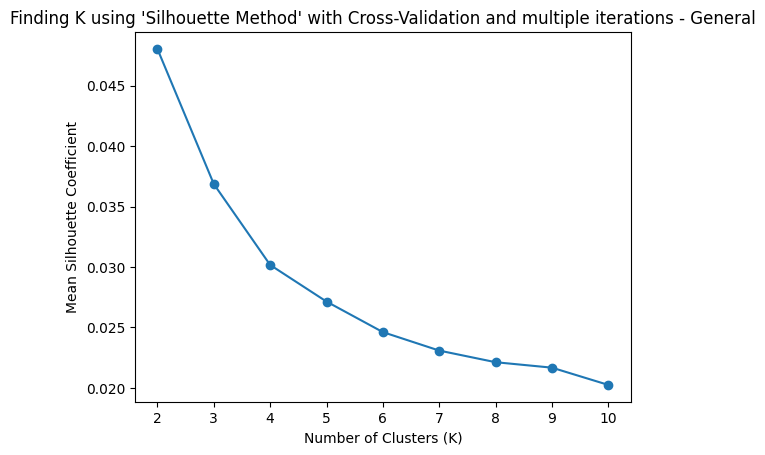

In [230]:
# SILHOUETTE METHOD WITH CROSS-VALIDATION (K-FOLD) AND MULTIPLE ITERATIONS
###########################################################################################

# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of silhouette scores for each K in each iteration
silhouette_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the silhouette scores for each K in this iteration
    silhouette_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(encuesta2):# Loop over each split
        X_train = encuesta2.iloc[train_index] # Get the training data for this split

        # Calculate the silhouette scores of each K [for this split]
        silhouette_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = silhouette_score(X_train, labels) # Calculate the silhouette score of this K [for this split]
            silhouette_k.append(score) # Store the silhouette scores of each K [for this split]
        
        # Store the silhouette scores of each K, each split [for this iteration]
        silhouette_iteration.append(silhouette_k) 
    
    # Store the silhouette scores of each K, each split, each iteration
    silhouette_iterations.append(silhouette_iteration)

# Calculate the mean silhouette scores for each K across all iterations and splits
silhouette_mean = np.mean(silhouette_iterations, axis=0) # Calculate the mean silhouette scores across all iterations
silhouette_mean = np.mean(silhouette_mean, axis=0) # Calculate the mean silhouette scores across all splits

# Plot the silhouette coefficient curve
plt.plot(range(2, max_clusters + 1), silhouette_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Silhouette Coefficient')
plt.title("Finding K using 'Silhouette Method' with Cross-Validation and multiple iterations - General")
plt.show()

### DAVIES-BOULDIN INDEX - Best k = (10 > 9 > 8 > 7)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

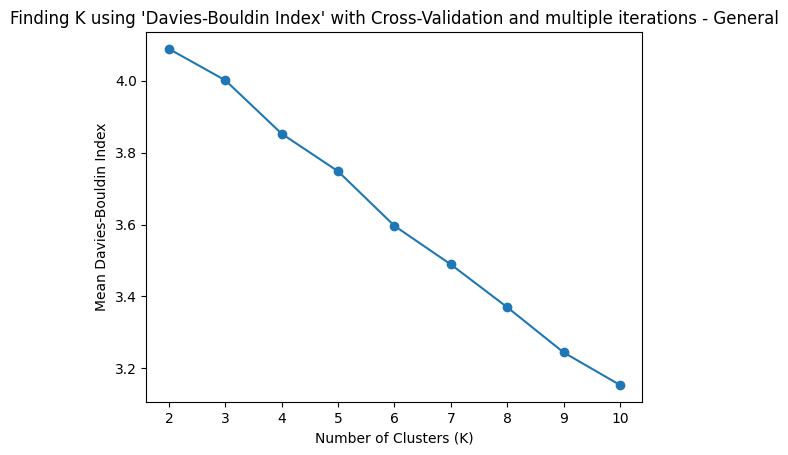

In [231]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Davies-Bouldin index for each K in each iteration
davies_bouldin_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Davies-Bouldin index for each K in this iteration
    davies_bouldin_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(encuesta2): # Loop over each split
        X_train = encuesta2.iloc[train_index] # Get the training data for this split

        # Calculate the Davies-Bouldin index of each K [for this split]
        davies_bouldin_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = davies_bouldin_score(X_train, labels) # Calculate the Davies-Bouldin index of this K [for this split]
            davies_bouldin_k.append(score) # Store the Davies-Bouldin index of each K [for this split]

        # Store the Davies-Bouldin index of each K, each split [for this iteration]
        davies_bouldin_iteration.append(davies_bouldin_k) 

    # Store the Davies-Bouldin index of each K, each split, each iteration
    davies_bouldin_iterations.append(davies_bouldin_iteration)

# Calculate the mean Davies-Bouldin index for each K across all iterations and splits
davies_bouldin_mean = np.mean(davies_bouldin_iterations, axis=0) # Calculate the mean Davies-Bouldin index across all iterations
davies_bouldin_mean = np.mean(davies_bouldin_mean, axis=0) # Calculate the mean Davies-Bouldin index across all splits

# Plot the Davies-Bouldin index curve
plt.plot(range(2, max_clusters + 1), davies_bouldin_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Davies-Bouldin Index')
plt.title("Finding K using 'Davies-Bouldin Index' with Cross-Validation and multiple iterations - General")
plt.show()

### CALINSKI-HARABASZ INDEX - Best k = (2 >> 3 >> 4 > 5)

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\xavie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

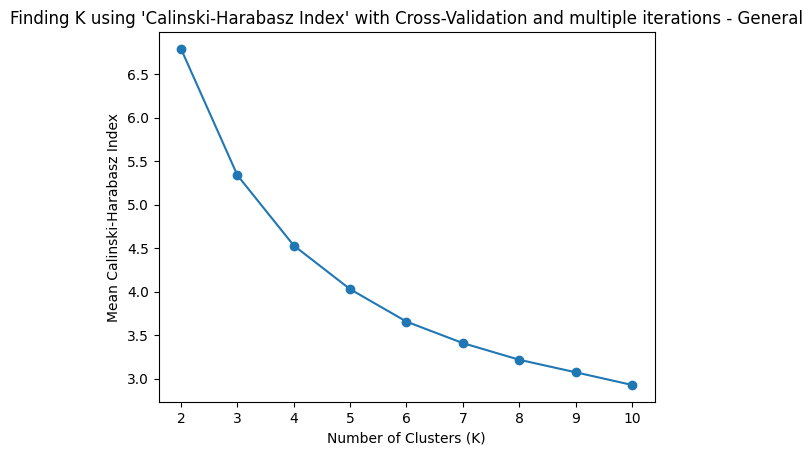

In [232]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 10
num_splits = 5

# Max number of clusters we want to test
max_clusters = 10
random_state = 42

# List to store the results of Calinski-Harabasz index for each K in each iteration
calinski_harabasz_iterations = []

# Perform K-means with cross-validation in each iteration
for iteration in range(num_iterations):
    # List to store the Calinski-Harabasz index for each K in this iteration
    calinski_harabasz_iteration = []

    # Cross-validation loop
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration) # Create the cross-validation object for this iteration
    for train_index, _ in kf.split(encuesta2): # Loop over each split
        X_train = encuesta2.iloc[train_index] # Get the training data for this split

        # Calculate the Calinski-Harabasz index of each K [for this split]
        calinski_harabasz_k = []
        for k in range(2, max_clusters + 1): # Loop over each K
            kmeans = KMeans(n_clusters=k, random_state=random_state) # Create a KMeans object
            labels = kmeans.fit_predict(X_train) # Fit the KMeans object with the training data and get the labels
            score = calinski_harabasz_score(X_train, labels) # Calculate the Calinski-Harabasz index of this K [for this split]
            calinski_harabasz_k.append(score) # Store the Calinski-Harabasz index of each K [for this split]

        # Store the Calinski-Harabasz index of each K, each split [for this iteration]
        calinski_harabasz_iteration.append(calinski_harabasz_k) 

    # Store the Calinski-Harabasz index of each K, each split, each iteration
    calinski_harabasz_iterations.append(calinski_harabasz_iteration)

# Calculate the mean Calinski-Harabasz index for each K across all iterations and splits
calinski_harabasz_mean = np.mean(calinski_harabasz_iterations, axis=0) # Calculate the mean Calinski-Harabasz index across all iterations
calinski_harabasz_mean = np.mean(calinski_harabasz_mean, axis=0) # Calculate the mean Calinski-Harabasz index across all splits

# Plot the Calinski-Harabasz index curve
plt.plot(range(2, max_clusters + 1), calinski_harabasz_mean, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Mean Calinski-Harabasz Index')
plt.title("Finding K using 'Calinski-Harabasz Index' with Cross-Validation and multiple iterations - General")
plt.show()

### GridSearchCV (4)

In [233]:
#Define the parameter values to search
#param_grid = {
#    'n_clusters': [3],  # Número de clústeres
#    'init': ['k-means++', 'random'],  # Método de inicialización de centroides
#    'n_init': ['auto', 'warn', 5, 10, 20, 50],  # Número de veces que se ejecuta el algoritmo con diferentes centroides
#    'max_iter': [150, 250, 300, 350, 450],  # Número máximo de iteraciones
#    'tol': [0.001, 0.0001, 0.00001],  # Tolerancia para el criterio de parada
#    'random_state': [42],  # Semilla para el generador de números aleatorios
#    'copy_x': [True, False],  # Si se copian los datos de entrada
#    'algorithm': ['elkan', 'lloyd']  # Algoritmo utilizado para el cálculo de los centroides
#}

In [234]:
# Build an instance of K-means
#kmeans = KMeans()
# Build a GridSearchCV instance with the model, the parameter dictionary and the cross-validation strategy
#cv = KFold(n_splits=15, shuffle=True, random_state=random_state)  # Ejemplo de validación cruzada con 5 divisiones
#grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=cv)
# Fit the model using GridSearch
#grid_search.fit(encuesta2)

# Obtain the best parameters and the best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best Parameters:", best_params)
#print("Best Score:", best_score)

#############################################################################################################

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 150, 'n_clusters': 3, 'n_init': 20, 'random_state': 42, 'tol': 0.001}
#Best Score: -154.8044373701153

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 20, 'random_state': 42, 'tol': 0.0001}
#Best Score: -154.8044373701153

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 50, 'n_clusters': 3, 'n_init': 20, 'random_state': 42, 'tol': 1e-05}
#Best Score: -154.8044373701153

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 20, 'random_state': 42, 'tol': 1e-05}
#Best Score: -154.8044373701153

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 100, 'random_state': 42, 'tol': 1e-05}
#Best Score: -154.7709515518828

#Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 500, 'n_clusters': 3, 'n_init': 100, 'random_state': 42, 'tol': 1e-05}
#Best Score: -154.7709515518828

## 6.2. Fit K-means

cluster_labels
2    64
1    50
0    39
Name: count, dtype: int64

Inertia: 2204.4115544871793

N_iter: 11


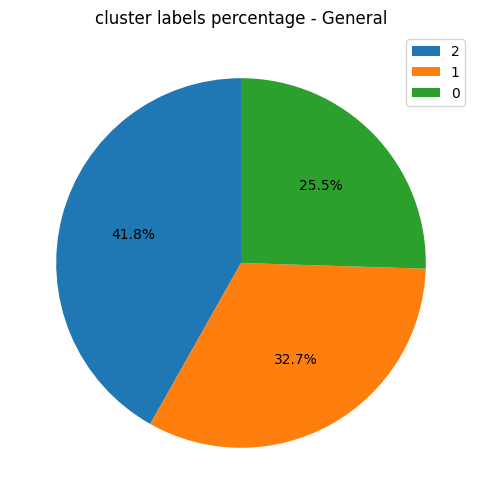

In [235]:
# Make the clusterization with the optimal number of clusters and the best parameters
kmeans=KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=500, n_clusters=3, n_init=100, random_state=42, tol=1e-05)
kmeans.fit(encuesta2)

# OBTAIN THE LABELS OF THE CLUSTERS ASSIGNED TO EACH SAMPLE AND ADD THEM TO THE DATAFRAMES
cluster_labels = kmeans.labels_
# encuesta
encuesta_=encuesta.copy()
encuesta_['cluster_labels'] = cluster_labels
#encuesta2
encuesta2_=encuesta2.copy()
encuesta2_['cluster_labels'] = cluster_labels
# subtopiccs
subtopics_=subtopics.copy()
subtopics_['cluster_labels'] = cluster_labels
# topics
topics_=topics.copy()
topics_['cluster_labels'] = cluster_labels
# personalProfile
personalProfile_=personalProfile.copy()
personalProfile_['cluster_labels'] = cluster_labels
# save labels
labels_encuesta=encuesta_.copy()
labels_encuesta['cluster_labels'] = cluster_labels
# Obtain the number of samples for each cluster
cluster_labels_=encuesta_['cluster_labels'].value_counts()
print(cluster_labels_)

# OBTAIN ATTRIBUTES OF THE CLUSTERS
# Obtain the centroids of the clusters
centroids = kmeans.cluster_centers_
# Obtain Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
print("\nInertia:",inertia)
# Obtain the number of iterations required to converge
n_iter = kmeans.n_iter_
print("\nN_iter:",n_iter)

# Plot pie 
cluster_labels_k3_plot=cluster_labels_.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=True, fontsize=10, labels=None, title='cluster labels percentage - General', figsize=(6,6))
plt.ylabel('')
plt.show()

## 6.3. Analysis

### Bonferroni --> "pProfile_analysis_bonferroni"

In [236]:
# Prepare the data for the hipotesis test
X = encuesta2_.drop('cluster_labels', axis=1)  # P redictor variables
y = encuesta2_['cluster_labels']  # Cluster tags

# Hipotests test and multiple test correction
p_values = []
p_values_corrected = []
significance_threshold = 0.05  # Significance threshold
num_tests = X.shape[1]  # Number of variables

for column in X.columns:
    contingency_table = pd.crosstab(X[column], y)
    chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)
    p_values.append(p)

In [237]:
# Multiple test correction
reject, p_values_corrected, rejectionsH0, upperlLimitCI= multipletests(p_values, alpha=significance_threshold, method='bonferroni')

print("reject:",reject)
print("\np_values_corrected:",p_values_corrected)
print("\nrejectionsH0:",rejectionsH0)
print("\nupperlLimitCI:",upperlLimitCI)

reject: [False False False False False False False False False False  True  True
 False False  True False  True False False False  True False False False
 False False False False False False  True False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False False False False False False False
 False False False False False False False False False False  True  True
 False False False False False False]

p_values_corrected: [1.00000000e+00 8.56535255e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 7.77660273e-02 1.00000000e+00 7.72934288e-01
 1.00000000e+00 1.00000000e+00 3.74564127e-02 5.82921024e-06
 1.00000000e+00 2.01008541e-01 5.73521627e-09 1.27573306e-01
 2.96551385e-18 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.03434804e-03 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 3.05374454e-01 1.00000000e+00 1.00000000

In [238]:
# Identification of significant variables
subtopics_significance = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Bonferroni correction
encuesta2_analysis_bonferroni=subtopics_significance.drop(['p-value','Significant'], axis=1)
encuesta2_analysis_bonferroni.rename(columns={'p-value_corrected':'p_value'}, inplace=True)

# Filter significant variables
subtopics_significance_true = subtopics_significance[subtopics_significance['Significant']]
subtopics_significance_true.drop('Significant', axis=1, inplace=True)
print("Variables significativas:")
subtopics_significance_true

Variables significativas:


C:\Users\xavie\AppData\Local\Temp\ipykernel_1456\2575800097.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtopics_significance_true.drop('Significant', axis=1, inplace=True)


Variable       p-value  p-value_corrected
10          aboutYou_party  4.161824e-04       3.745641e-02
11          aboutYou_couch  6.476900e-08       5.829210e-06
14  aboutYou_profitableDay  6.372463e-11       5.735216e-09
16          aboutYou_sport  3.295015e-20       2.965514e-18
20         aboutYou_stress  1.149276e-05       1.034348e-03
30            topics_sport  2.442332e-23       2.198099e-21
35      topics_alienPerson  1.199030e-04       1.079127e-02
62         sport_intensity  2.012851e-06       1.811566e-04
63           sport_passive  1.502941e-17       1.352647e-15
64              sport_type  6.853067e-10       6.167760e-08
82               vices_sex  4.977657e-05       4.479892e-03
83            vices_coffee  5.858982e-06       5.273084e-04

In [239]:
significant_variables = subtopics_significance_true['Variable'].tolist()

# Make multiple comparison tests for each pair of groups in significant variables
group_differences = []

for variable in significant_variables:
    contingency_table = pd.crosstab(X[variable], y)
    groups = contingency_table.columns.tolist()
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1 = groups[i]
            group2 = groups[j]
            
            # Make chi2 test to compare the groups
            contingency_table_group = contingency_table[[group1, group2]]
            # Add a small value to the cells to avoid zeros
            contingency_table_group = contingency_table_group.add(0.01)
            chi2, p, _, _ = chi2_contingency(contingency_table_group, correction=True)
            
            # If the p-value is significant, it is considered that the groups differ
            if p < significance_threshold:
                group_differences.append((variable, group1, group2, p))

# Convert the results to a DataFrame
group_differences_df = pd.DataFrame(group_differences, columns=['Variable', 'Group X', 'Group Y', 'p-value'])
print("Diferencias significativas entre grupos:")
print(group_differences_df)

Diferencias significativas entre grupos:
                  Variable  Group X  Group Y       p-value
0           aboutYou_party        0        1  3.427149e-03
1           aboutYou_party        0        2  6.391039e-04
2           aboutYou_couch        0        2  3.662630e-06
3           aboutYou_couch        1        2  8.587049e-07
4   aboutYou_profitableDay        0        1  6.660458e-09
5   aboutYou_profitableDay        0        2  2.298967e-08
6           aboutYou_sport        0        1  2.929512e-13
7           aboutYou_sport        1        2  2.030613e-17
8          aboutYou_stress        0        2  4.255057e-03
9          aboutYou_stress        1        2  5.543639e-06
10            topics_sport        0        1  1.579715e-12
11            topics_sport        1        2  9.267614e-21
12      topics_alienPerson        0        1  7.761416e-05
13      topics_alienPerson        1        2  1.602259e-02
14         sport_intensity        0        1  5.183164e-05
15         spor

In [240]:
# Define a list to store the aggregation results
aggregation_results = []

# Iterate over the columns and apply the aggregation functions separately
for column in encuesta_.columns:
    column_aggregations = encuesta_.groupby('cluster_labels')[column].agg([
        ('sum', 'sum'),
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std')
    ])
    column_aggregations.columns = [f"{column}_{agg}" for agg in column_aggregations.columns]
    aggregation_results.append(column_aggregations)

# Concatenate the results into a single DataFrame
cluster_agg = pd.concat(aggregation_results, axis=1)

In [241]:
# Make a table with the conclusions
#results_encuesta2_=[
#    ['0', '22.2', '<1','>1','','<1','<2','<3 & >(1,2)','>(1,3)','>(1,2,3)','>(1,2,3)','>(2,3)','>3','>3','>(1,3)','>(2,3)','>(1,3)','<1','>3'],
#    ['1', '17', '>(0,2,3)','<(0,2,3)','>(2,3)','>(0,2,3)','<2','<(0,3)','<(0,2)','<0','<0 & >3','>(2,3)','','>3','<(0,2)','>(2,3)','<(0,2)','>(0,2,3)','>3'],
#    ['2', '28.8', '<1','>1','<1','<1','>(0,1,3)','<(0,3)','>1','<0','<0','<(0,1)','>3','>3','>(1,3)','<(0,1)','>(1,3)','<1',''],
#    ['3', '32', '<1','>1','<1','<1','<2','>(0,1,2)','<0','<0','<(0,1)','<(0,1)','<(0,2)','<(0,1,2)','<(0,2)','<(0,1)','<(0,2)','<1','<(0,1)']
#]
#results_encuesta2_columns=['k', 'proportion','actualStatus_student', 'actualStatus_work', 'homeCompany_friends', 'homeCompany_parents', 'homeCompany_couple', 'homeCompany_family', 'aboutYou_car', 'aboutYou_smoke', 'aboutYou_party', 'aboutYou_couch', 'aboutYou_thinkAboutHappiness', 'aboutYou_profitableDay', 'aboutYou_healthyFood', 'aboutYou_romantic', 'aboutYou_spontaneous', 'aboutYou_dependent', 'aboutYou_sciences']
#results_encuesta2_=pd.DataFrame(results_encuesta2_, columns=results_encuesta2_columns)
#results_encuesta2_.to_excel('results_encuesta2_.xlsx', index=False)
#results_encuesta2_

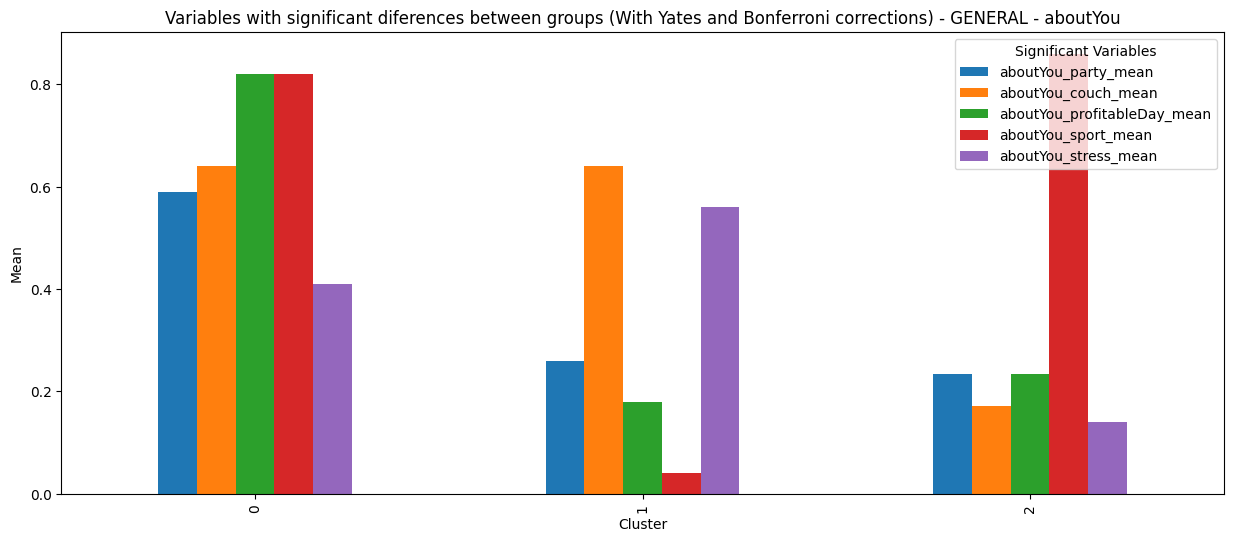

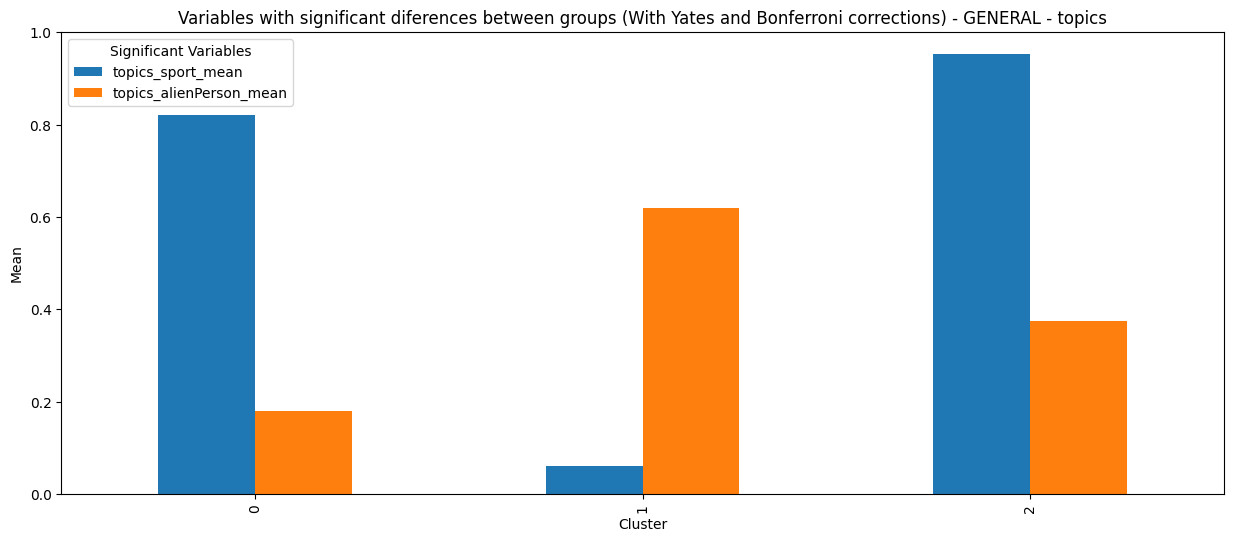

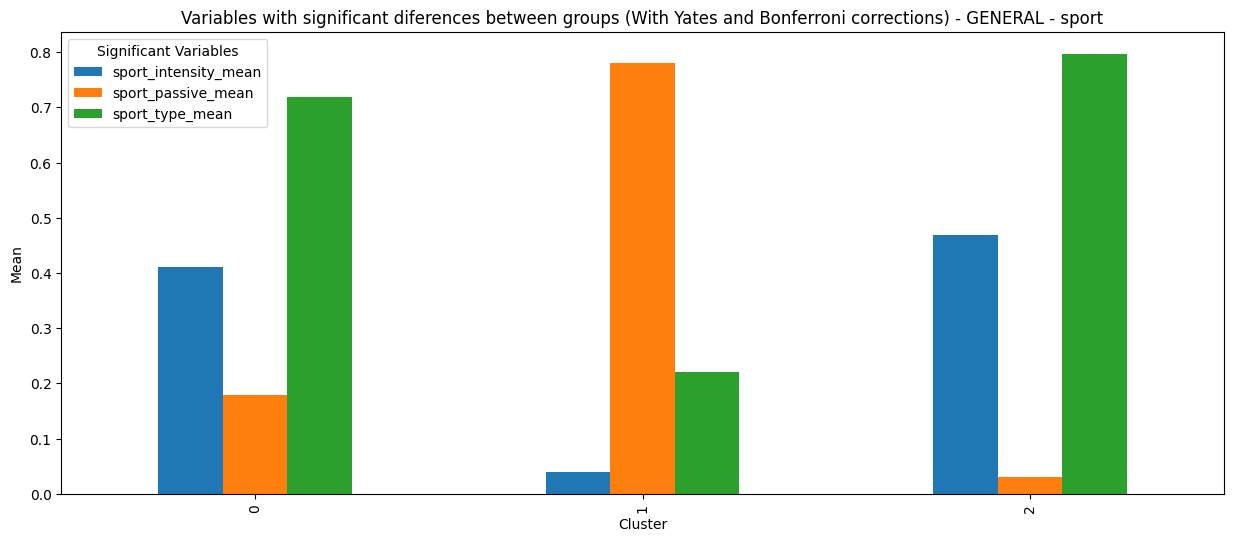

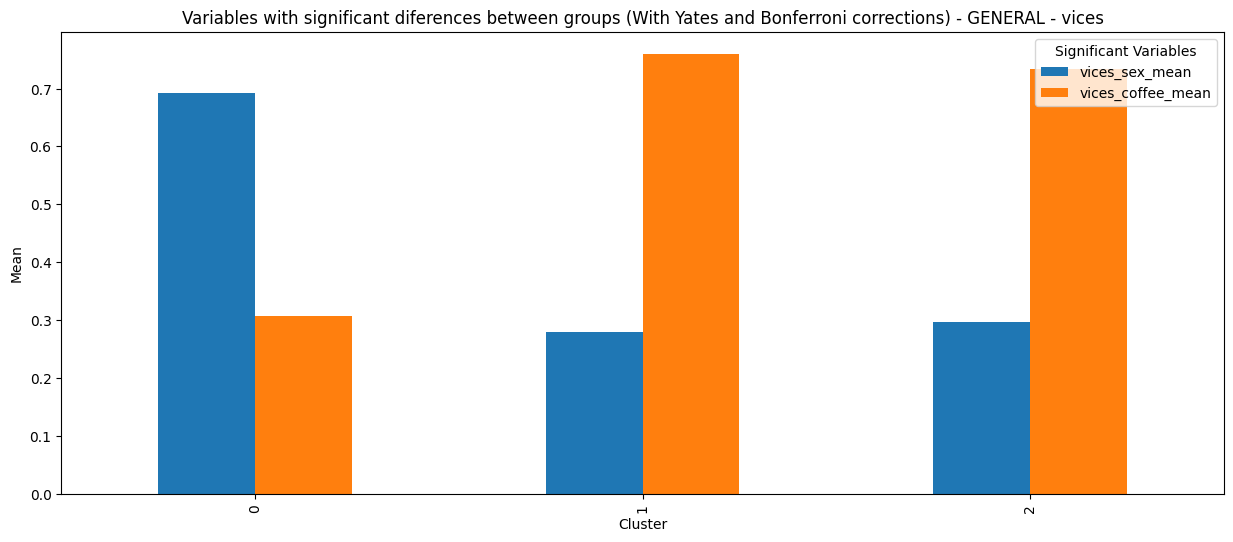

In [242]:
# Create a dictionary to store the significant variables by genre
significant_variables_by_genre = {}

# Group the significant variables by genre
for variable in significant_variables:
    genre = variable.split('_')[0]
    if genre not in significant_variables_by_genre:
        significant_variables_by_genre[genre] = []
    significant_variables_by_genre[genre].append(variable)

# Iterate over the genres and plot the significant variables
for genre, variables in significant_variables_by_genre.items():
    genre_columns = cluster_agg.filter(regex=f'^{genre}')
    genre_mean_columns = genre_columns.filter(regex='mean$')
    
    if genre_mean_columns.shape[1] > 0:
        # Filter the significant variables for the current genre
        significant_variables_genre = [variable + '_mean' for variable in variables if variable + '_mean' in genre_mean_columns.columns]
        if significant_variables_genre:
            ax = genre_mean_columns[significant_variables_genre].plot(kind='bar', title=f'Variables with significant diferences between groups (With Yates and Bonferroni corrections) - GENERAL - {genre}', figsize=(15, 6))
            plt.xlabel('Cluster')
            plt.ylabel('Mean')
            plt.legend(title='Significant Variables')
            plt.show()

### Holm-Bonferroni --> "pProfile_analysis_HBonferroni"

In [243]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='holm')

# Identification of significant variables
encuesta2_significance_HBonferroni = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Holm-Bonferroni correction
encuesta2_analysis_HBonferroni = encuesta2_significance_HBonferroni.drop(['p-value', 'Significant'], axis=1)
encuesta2_analysis_HBonferroni.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

### Benjamini-Hochberg --> "pProfile_analysis_bHochberg"

In [244]:
# Correction of multiple tests
reject, p_values_corrected, _, _ = multipletests(p_values, alpha=significance_threshold, method='fdr_bh')

# Identification of significant variables
encuesta2_significance_bHochberg = pd.DataFrame({
    'Variable': X.columns,
    'p-value': p_values,
    'p-value_corrected': p_values_corrected,
    'Significant': reject
})

# Create a dataframe with the significance of the variables (p-value) using the Benjamini-Hochberg correction
encuesta2_analysis_bHochberg = encuesta2_significance_bHochberg.drop(['p-value', 'Significant'], axis=1)
encuesta2_analysis_bHochberg.rename(columns={'p-value_corrected': 'p_value'}, inplace=True)

### Mean 3 corrections --> "pProfile_analysis"

In [245]:
# Merge the results of the three corrections
encuesta2_analysis=pd.merge(encuesta2_analysis_bonferroni, encuesta2_analysis_HBonferroni, on='Variable')
encuesta2_analysis=pd.merge(encuesta2_analysis, encuesta2_analysis_bHochberg, on='Variable')

# Obtain the mean of significance of the three corrections
encuesta2_analysis['p_value_mean'] = encuesta2_analysis[['p_value_x', 'p_value_y', 'p_value']].mean(axis=1)

# Save the results
encuesta2_analysis_=encuesta2_analysis.copy()
encuesta2_analysis_.sort_values(by='p_value_mean', inplace=True)
encuesta2_analysis_.to_excel('encuesta2_analysis_.xlsx', index=False)

# Drop the columns of the three corrections
encuesta2_analysis.drop(['p_value_x', 'p_value_y', 'p_value'], axis=1, inplace=True)
print(encuesta2_analysis.shape)
encuesta2_analysis.head()

(90, 2)


Variable  p_value_mean
0     actualStatus_free      0.924917
1  actualStatus_student      0.506308
2     actualStatus_work      0.756144
3   homeCompany_friends      0.694178
4     homeCompany_alone      0.834668

In [246]:
encuesta2_analysis_

Variable     p_value_x     p_value_y   
30                      topics_sport  2.198099e-21  2.198099e-21  \
16                    aboutYou_sport  2.965514e-18  2.932564e-18   
63                     sport_passive  1.352647e-15  1.322588e-15   
14            aboutYou_profitableDay  5.735216e-09  5.544042e-09   
64                        sport_type  6.167760e-08  5.893638e-08   
..                               ...           ...           ...   
47                     social_couple  1.000000e+00  1.000000e+00   
0                  actualStatus_free  1.000000e+00  1.000000e+00   
26                     aboutYou_read  1.000000e+00  1.000000e+00   
23                    aboutYou_sweet  1.000000e+00  1.000000e+00   
45  productiveTime_Proposed_attitude  1.000000e+00  1.000000e+00   

         p_value  p_value_mean  
30  2.198099e-21  2.198099e-21  
16  1.482757e-18  2.460278e-18  
63  4.508823e-16  1.042039e-15  
14  1.433804e-09  4.237688e-09  
64  1.233552e-08  4.431650e-08  
..           ...           ...  
47  7.747511e-01  9.249170e-01  
0   7.747511e-01  9.249170e-01  
26  8.366594e-01  9.455531e-01  
23  8.879079e-01  9.626360e-01  
45  9.719319e-01  9.906440e-01  

[90 rows x 5 columns]

## 6.4. Random forest [0.90054623655914 - 50 Iterations - 36s]

### Finding best parameters

In [247]:
# Split the data into training (X) and test (y) sets
X = encuesta2_.drop('cluster_labels', axis=1)  # Eliminar la columna de etiquetas
y = encuesta2_['cluster_labels']

In [248]:
#param_grid = {
#    'n_estimators': [50, 100, 200],#The number of trees in the forest
#    'bootstrap': [True],#Whether bootstrap samples are used when building trees
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'max_depth': [None],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],#The minimum number of samples required to be at a leaf node
#    'min_impurity_decrease': [0.0],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'max_features': ['sqrt', 'log2'],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None],#Grow trees with max_leaf_nodes in best-first fashion
#    'n_jobs': [-1],#The number of jobs to run in parallel for both fit and predict.
#    'oob_score': [True, False],#Whether to use out-of-bag samples to estimate the generalization accuracy
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', 'balanced_subsample', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [249]:
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)  # Reemplaza X e y con tus datos

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)  # Reemplaza X e y con tus datos
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

#############################################################################################################

#[0.93548387 0.90322581 0.83870968 0.96666667 0.86666667]
#Mean cross-validation score: 0.9021505376344086
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9021505376344086

#[0.90322581 0.93548387 0.96774194 0.9        0.86666667]
#Mean cross-validation score: 0.9146236559139785
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 75, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9146236559139785

#[0.96774194 0.90322581 0.87096774 0.93333333 0.86666667]
#Mean cross-validation score: 0.9083870967741937
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9083870967741937

#[0.96774194 0.90322581 0.87096774 0.93333333 0.86666667]
#Mean cross-validation score: 0.9083870967741937
#Best parameters: {'bootstrap': True, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': True, 'random_state': 42}
#Best score: 0.9083870967741937

### Fitting and analyzing the model

In [250]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 50
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Random Forest model with the best parameters found
        rf=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='entropy', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

        # Train the model
        rf.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(rf.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = rf.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
encuesta2_RF = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_encuesta2_RF = np.mean(accuracy_list)
accuracy_std_mean_encuesta2_RF = np.mean(accuracy_std_list)
print("accuracy_mean_encuesta2_RF:", accuracy_mean_encuesta2_RF)
print("encuesta2_RF.shape:",encuesta2_RF.shape)
print("sum importance:",encuesta2_RF['importance'].sum())
encuesta2_RF.head()

###rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5, n_estimators=200, n_jobs=-1, oob_score=True, random_state=42)
###accuracy_mean_encuesta2_RF: 0.894752688172043

#rf=RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='entropy', max_depth=None, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.001, min_samples_leaf=4, min_samples_split=2, n_estimators=75, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_encuesta2_RF: 0.8894408602150538

#rf=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', criterion='entropy', max_depth=None, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.01, min_samples_leaf=4, min_samples_split=2, n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)
#accuracy_mean_encuesta2_RF: 0.9005806451612901
#accuracy_mean_encuesta2_RF x 50: 0.90054623655914

accuracy_mean_encuesta2_RF: 0.8940860215053764
encuesta2_RF.shape: (90, 2)
sum importance: 1.0


characteristics  importance
0     actualStatus_free    0.000961
1  actualStatus_student    0.004447
2     actualStatus_work    0.004325
3   homeCompany_friends    0.000405
4     homeCompany_alone    0.000659

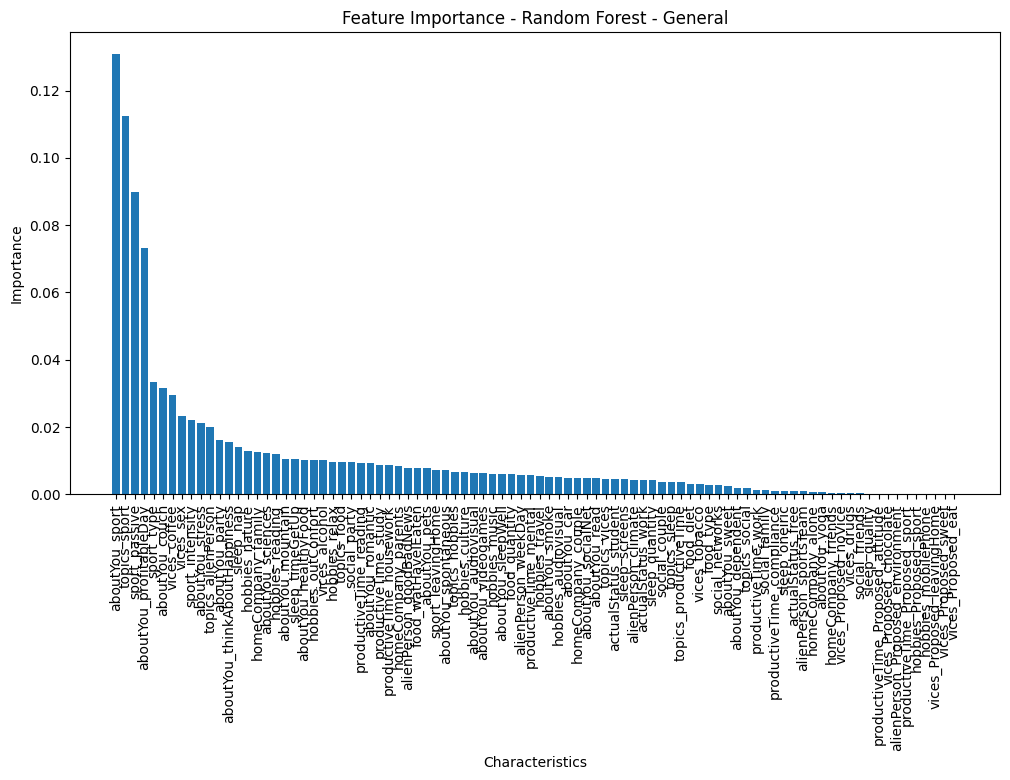

In [251]:
# Sort the DataFrame by descending importance
encuesta2_RF_sorted = encuesta2_RF.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(encuesta2_RF_sorted['characteristics'], encuesta2_RF_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest - General')
plt.show()

In [252]:
# Select the most important features
encuesta2_RF_top = encuesta2_RF_sorted.head(3)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
encuesta2_RF_groupValues = encuesta2_[['cluster_labels'] + encuesta2_RF_top]

# Group by cluster and get feature values for each group
encuesta2_RF_groupedValues = encuesta2_RF_groupValues.groupby('cluster_labels').mean().reset_index()
encuesta2_RF_groupedValues

cluster_labels  aboutYou_sport  topics_sport  sport_passive
0               0        0.820513      0.820513       0.179487
1               1        0.040000      0.060000       0.780000
2               2        0.859375      0.953125       0.031250

### DecisionTreeClassifier

In [253]:
#param_grid = {
#    'criterion': ['gini', 'entropy', 'log_loss'],#The function to measure the quality of a split
#    'splitter': ['best', 'random'],#The strategy used to choose the split at each node
#    'max_depth': [None, 3, 5],#The maximum depth of the tree
#    'min_samples_split': [2, 3, 5],#The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3, 5],#The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0, 0.05, 0.01, 0.1],#The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'max_features': ['sqrt', 'log2', None],#The number of features to consider when looking for the best split
#    'max_leaf_nodes': [None, 3, 5],#Grow trees with max_leaf_nodes in best-first fashion
#    'min_impurity_decrease': [0.0, 0.05, 0.01, 0.1],#A node will be split if this split induces a decrease of the impurity greater than or equal to this value
#    'random_state': [42],#Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'class_weight': ['balanced', None],#Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#}

In [254]:
#tree_model = DecisionTreeClassifier()
#grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.87096774 0.61290323 0.77419355 0.96666667 0.7       ]
#Mean cross-validation score: 0.7849462365591398
#Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.7849462365591398

#[0.90322581 0.67741935 0.77419355 0.96666667 0.66666667]
#Mean cross-validation score: 0.7976344086021505
#Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.7976344086021505

#[0.90322581 0.61290323 0.77419355 0.96666667 0.73333333]
#Mean cross-validation score: 0.7980645161290323
#Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
#Best score: 0.7980645161290323

In [255]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
models_list = []

# Perform the training and evaluation process in each iteration
for iteration in range(num_iterations):
    # Divide the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    models_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Create an instance of the Decision Tree model with the best hyperparameters found
        tree_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None, max_features='sqrt', max_leaf_nodes=6, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best')
        
        # Train the model
        tree_model.fit(X_train, y_train)
        
        # Get the feature importance
        feature_importances_iteration.append(tree_model.feature_importances_)
        
        # Realize predictions in the test set and calculate the model accuracy
        y_pred = tree_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
        
        # Store the model
        models_iteration.append(tree_model)
    
    # Calculate the mean feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    models_list.append(models_iteration)

# Find the index of the best model based on the highest accuracy
best_model_index = np.argmax(accuracy_list)

# Select the best model based on the highest accuracy
best_tree_model = models_list[best_model_index][0]

# Export the best decision tree in DOT format
dot_data = export_graphviz(best_tree_model, out_file=None, feature_names=X.columns, class_names=y_str.unique(), filled=True, rounded=True, special_characters=True)

# Create the tree graph using graphviz
graph = graphviz.Source(dot_data)

# Show the tree graph
graph.render("decision_tree_encuesta2")  # Save the tree graph as PDF
graph.view()  # Show the tree graph

'decision_tree_encuesta2.pdf'

## 6.5 GradientBoosting [0.9144903225806451 - 50 Iterations - 31s]

### Finding best parameters

In [256]:
#param_grid = {
#    'loss': ['log_loss'],  # Loss function to be optimized
#    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree by learning_rate
#    'n_estimators': [50, 100, 200],  # The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
#    'subsample': [0.75, 0.9, 1.0],  # The fraction of samples to be used for fitting the individual base learners
#    'criterion': ['friedman_mse', 'squared_error'],  # The function to measure the quality of a split
#    'min_samples_split': [2, 3, 5],  # The minimum number of samples required to split an internal node
#    'min_samples_leaf': [1, 2, 3],  # The minimum number of samples required to be at a leaf node
#    'min_weight_fraction_leaf': [0.0],  # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
#    'random_state': [42],  # Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features).
#    'max_depth': [3],  # The maximum depth of the tree
#    'max_features': [1.0, 'sqrt', 'log2', None],  # The number of features to consider when looking for the best split
#}

In [257]:
#gb = GradientBoostingClassifier()
#grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[1.         0.90322581 0.87096774 0.96666667 0.9       ]
#Mean cross-validation score: 0.9281720430107528
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.75}
#Best score: 0.9281720430107528

#[1.         0.93548387 0.93548387 0.96666667 0.86666667]
#Mean cross-validation score: 0.9408602150537636
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.6}
#Best score: 0.9408602150537636

#[1.         0.93548387 0.93548387 0.96666667 0.86666667]
#Mean cross-validation score: 0.9408602150537636
#Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'random_state': 42, 'subsample': 0.6}
#Best score: 0.9408602150537636

### Fitting and analyzing the model

In [258]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 50
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a Gradient Boosting model with the best parameters found
        gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='log2', min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.6)

        # Train the model
        gb.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(gb.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = gb.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
encuesta2_GB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_encuesta2_GB = np.mean(accuracy_list)
accuracy_std_mean_encuesta2_GB = np.mean(accuracy_std_list)
print("accuracy_mean_encuesta2_GB:", accuracy_mean_encuesta2_GB)
print("encuesta2_GB.shape:",encuesta2_GB.shape)
print("sum importance:",encuesta2_GB['importance'].sum())
encuesta2_GB.head()

###gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.05, loss='log_loss', max_depth=5, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.75)
###accuracy_mean_encuesta2_GB: 0.8980430107526883

#gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.75)
#accuracy_mean_encuesta2_GB: 0.9104086021505375

#gb=GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.2, loss='log_loss', max_depth=3, max_features='log2', min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, random_state=42, subsample=0.6)
#accuracy_mean_encuesta2_GB: 0.9132043010752687
#accuracy_mean_encuesta2_GB x 50: 0.9144903225806451


accuracy_mean_encuesta2_GB: 0.9007569892473118
encuesta2_GB.shape: (90, 2)
sum importance: 1.0000000000000002


characteristics  importance
0     actualStatus_free    0.004676
1  actualStatus_student    0.009855
2     actualStatus_work    0.004916
3   homeCompany_friends    0.003450
4     homeCompany_alone    0.004177

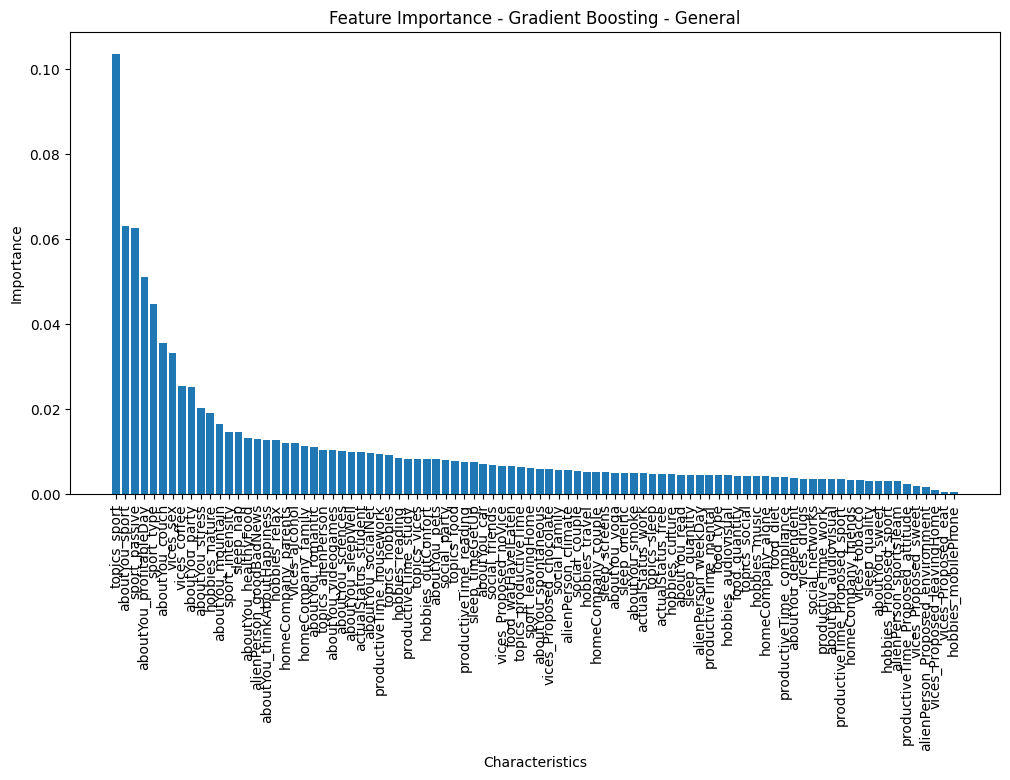

In [259]:
# Sort the DataFrame by descending importance
encuesta2_GB_sorted = encuesta2_GB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(encuesta2_GB_sorted['characteristics'], encuesta2_GB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Gradient Boosting - General')
plt.show()

In [260]:
# Select the most important features
encuesta2_GB_top = encuesta2_GB_sorted.head(5)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
encuesta2_GB_groupValues = encuesta2_[['cluster_labels'] + encuesta2_GB_top]

# Group by cluster and get feature values for each group
encuesta2_GB_groupedValues = encuesta2_GB_groupValues.groupby('cluster_labels').mean().reset_index()
encuesta2_GB_groupedValues

cluster_labels  topics_sport  aboutYou_sport  sport_passive   
0               0      0.820513        0.820513       0.179487  \
1               1      0.060000        0.040000       0.780000   
2               2      0.953125        0.859375       0.031250   

   aboutYou_profitableDay  sport_type  
0                0.820513    0.717949  
1                0.180000    0.220000  
2                0.234375    0.796875

## 6.6 SVM [0.927440430107527 - 1000 Iterations - 30s]

### Finding best parameters

In [261]:
#param_grid = {
#    'C': [1, 2, 5],  # Inverse of regularization strength
#    'kernel': ['linear'],  # Specifies the kernel type to be used in the algorithm
#    'degree': [2, 3, 5],  # Degree of the polynomial kernel function ('poly')
#    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#    'coef0': [0.0, 0.001, 0.01],  # Independent term in kernel function
#    'shrinking': [True, False],  # Whether to use the shrinking heuristic
#    'probability': [True, False],  # Whether to enable probability estimates
#    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criterion
#    'cache_size': [200],  # Specify the size of the kernel cache (in MB)
#    'class_weight': ['balanced', None],  # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.
#    'max_iter': [-1],  # Hard limit on iterations within solver, or -1 for no limit
#    'decision_function_shape': ['ovo', 'ovr'],  # Whether to return a one-vs-rest ('ovr') decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one ('ovo') decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2)
#    'break_ties': [False],  # If true, decision_function_shape='ovr', and number of classes > 2, predict will break ties according to the confidence values of decision_function; otherwise the first class among the tied classes is returned
#    'random_state': [42],  # Controls the pseudo random number generation for shuffling the data for probability estimates
#}

In [262]:
#svc = SVC()
#grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.87096774 0.90322581 0.83870968 0.86666667 0.86666667]
#Mean cross-validation score: 0.8692473118279569
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.0001}
#Best score: 0.8692473118279569

#[0.87096774 0.90322581 0.83870968 0.86666667 0.86666667]
#Mean cross-validation score: 0.8692473118279569
#Best parameters: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 1e-05}
#Best score: 0.8692473118279569

### Fitting and analyzing the model

In [263]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 1000
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a SVM model with the best parameters found
        svm=SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.00001)

        # Train the model
        svm.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(np.abs(svm.coef_[0]))
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = svm.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Normalize the weighted feature importances to sum up to 1
feature_importances_normalized = feature_importances_weighted / np.sum(np.abs(feature_importances_weighted))

# Build the final dataset with the features and their importance
encuesta2_SVM = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_normalized})

# Results
accuracy_mean_encuesta2_SVM = np.mean(accuracy_list)
accuracy_std_mean_encuesta2_SVM = np.mean(accuracy_std_list)
print("accuracy_mean_encuesta2_SVM:", accuracy_mean_encuesta2_SVM)
print("encuesta2_SVM.shape:",encuesta2_SVM.shape)
print("sum importance:",encuesta2_SVM['importance'].sum())
encuesta2_SVM.head()

###svm=SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.0001)
###accuracy_mean_encuesta2_SVM: 0.9209032258064518

#svm=SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0, decision_function_shape='ovo', degree=2, gamma='scale', kernel='linear', max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.0001)
#accuracy_mean_encuesta2_SVM: 0.9209032258064518
#accuracy_mean_encuesta2_SVM x 100: 0.9256860215053763
#accuracy_mean_encuesta2_SVM x 1000: 0.927440430107527

accuracy_mean_encuesta2_SVM: 0.8858537634408601
encuesta2_SVM.shape: (90, 2)
sum importance: 1.0


characteristics  importance
0     actualStatus_free    0.005275
1  actualStatus_student    0.014669
2     actualStatus_work    0.010438
3   homeCompany_friends    0.002085
4     homeCompany_alone    0.005053

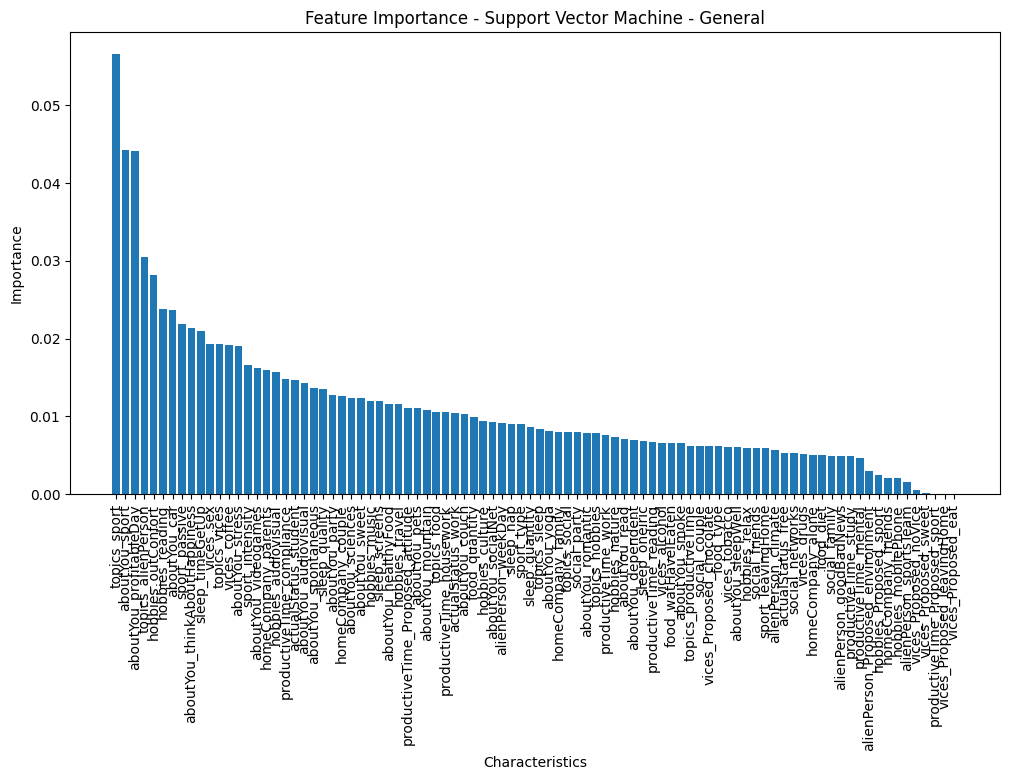

In [264]:
# Sort the DataFrame by descending importance
encuesta2_SVM_sorted = encuesta2_SVM.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(encuesta2_SVM_sorted['characteristics'], encuesta2_SVM_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - Support Vector Machine - General')
plt.show()

In [265]:
# Select the most important features
encuesta2_SVM_top = encuesta2_SVM_sorted.head(7)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
encuesta2_SVM_groupValues = encuesta2_[['cluster_labels'] + encuesta2_SVM_top]

# Group by cluster and get feature values for each group
encuesta2_SVM_groupedValues = encuesta2_SVM_groupValues.groupby('cluster_labels').mean().reset_index()
encuesta2_SVM_groupedValues

cluster_labels  topics_sport  aboutYou_sport  aboutYou_profitableDay   
0               0      0.820513        0.820513                0.820513  \
1               1      0.060000        0.040000                0.180000   
2               2      0.953125        0.859375                0.234375   

   topics_alienPerson  hobbies_outConfort  hobbies_reading  aboutYou_car  
0            0.179487            0.538462         0.230769      0.897436  
1            0.620000            0.260000         0.600000      0.660000  
2            0.375000            0.359375         0.468750      0.796875

## 6.7. XGBOOST [0.8898645161290323 - 100 Iterations - 35s]

### Finding best parameters

In [266]:
#param_grid = {
#    'learning_rate': [0.05, 0.1, 0.2],
#    'n_estimators': [50, 100, 200],
#    'max_depth': [2, 3, 5],
#    'min_child_weight': [1, 2, 3],
#    'subsample': [1, 0.9],
#    'colsample_bytree': [1, 0.9],
#    'gamma': [0, 0.001, 0.01],
#    'reg_alpha': [0, 0.001, 0.01],
#    'reg_lambda': [1, 0.9, 0.7],
#    'random_state': [42],
#}

In [267]:
#xgb_model = xgb.XGBClassifier()
#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
#grid_search.fit(X, y)

#cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
#mean_cv_score = cv_scores.mean()
#print(cv_scores)
#print("Mean cross-validation score:", mean_cv_score)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_
#print("Best parameters:", best_params)
#print("Best score:", best_score)

##############################################################################################################

#[0.96774194 0.90322581 0.83870968 0.96666667 0.9       ]
#Mean cross-validation score: 0.9152688172043012

#Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.7, 'subsample': 0.9}
#Best score: 0.9152688172043012

#[0.96774194 0.90322581 0.83870968 0.96666667 0.9       ]
#Mean cross-validation score: 0.9152688172043012
#Best parameters: {'colsample_bytree': 0.9, 'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 0.7, 'subsample': 0.9}
#Best score: 0.9152688172043012

### Fitting and analyzing the model

In [268]:
# Define the number of iterations and the number of splits in the cross-validation
num_iterations = 100
num_splits = 5

# Lists to store the results of feature importance and model accuracy
feature_importances_list = []
accuracy_list = []
accuracy_std_list = []

# Train and evaluate the model in each iteration
for iteration in range(num_iterations):
    # Split the data into training and test sets using cross-validation
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=iteration)
    feature_importances_iteration = []
    accuracy_iteration = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Build a XGBoost model with the best parameters found
        xgb_model=xgb.XGBClassifier(colsample_bytree=0.9, gamma=0.001, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, random_state= 42, reg_alpha=0, reg_lambda=0.7, subsample=0.9)

        # Train the model
        xgb_model.fit(X_train, y_train)
        
        # Obtaining the feature importance
        feature_importances_iteration.append(xgb_model.feature_importances_)
        
        # Make predictions on the test set and calculate the model accuracy
        y_pred = xgb_model.predict(X_test)
        accuracy_iteration.append(accuracy_score(y_test, y_pred))
    
    # Calculate the mean of feature importance and model accuracy in each iteration
    feature_importances_mean = np.mean(feature_importances_iteration, axis=0)
    accuracy_mean = np.mean(accuracy_iteration)
    accuracy_std = np.std(accuracy_iteration)
    
    # Store the results in the lists
    feature_importances_list.append(feature_importances_mean)
    accuracy_list.append(accuracy_mean)
    accuracy_std_list.append(accuracy_std)

# Find the weights according to the model accuracy
weights = [accuracy / sum(accuracy_list) for accuracy in accuracy_list]

# Calculate the weighted feature importance
feature_importances_weighted = np.average(feature_importances_list, axis=0, weights=weights)

# Build the final dataset with the features and their importance
encuesta2_XGB = pd.DataFrame({'characteristics': X.columns, 'importance': feature_importances_weighted})

# Results
accuracy_mean_encuesta2_XGB = np.mean(accuracy_list)
accuracy_std_mean_encuesta2_XGB = np.mean(accuracy_std_list)
print("accuracy_mean_encuesta2_XGB:", accuracy_mean_encuesta2_XGB)
print("encuesta2_XGB.shape:",encuesta2_XGB.shape)
print("sum importance:",encuesta2_XGB['importance'].sum())
encuesta2_XGB.head()

###xgb_model=xgb.XGBClassifier(colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=50, random_state= 42, reg_alpha=0, reg_lambda=0.7, subsample=0.7)
###accuracy_mean_encuesta2_XGB: 0.8914193548387097
###accuracy_mean_encuesta2_XGB: 0.8986795698924732

#xgb_model=xgb.XGBClassifier(colsample_bytree=0.9, gamma=0.001, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, random_state= 42, reg_alpha=0, reg_lambda=0.7, subsample=0.9)
#accuracy_mean_encuesta2_XGB: 0.8861720430107527
#accuracy_mean_encuesta2_XGB x 50: 0.8892731182795699
#accuracy_mean_encuesta2_XGB x 100: 0.8898645161290323


accuracy_mean_encuesta2_XGB: 0.8700107526881719
encuesta2_XGB.shape: (90, 2)
sum importance: 1.000000000415813


characteristics  importance
0     actualStatus_free    0.005007
1  actualStatus_student    0.009824
2     actualStatus_work    0.010633
3   homeCompany_friends    0.000000
4     homeCompany_alone    0.004722

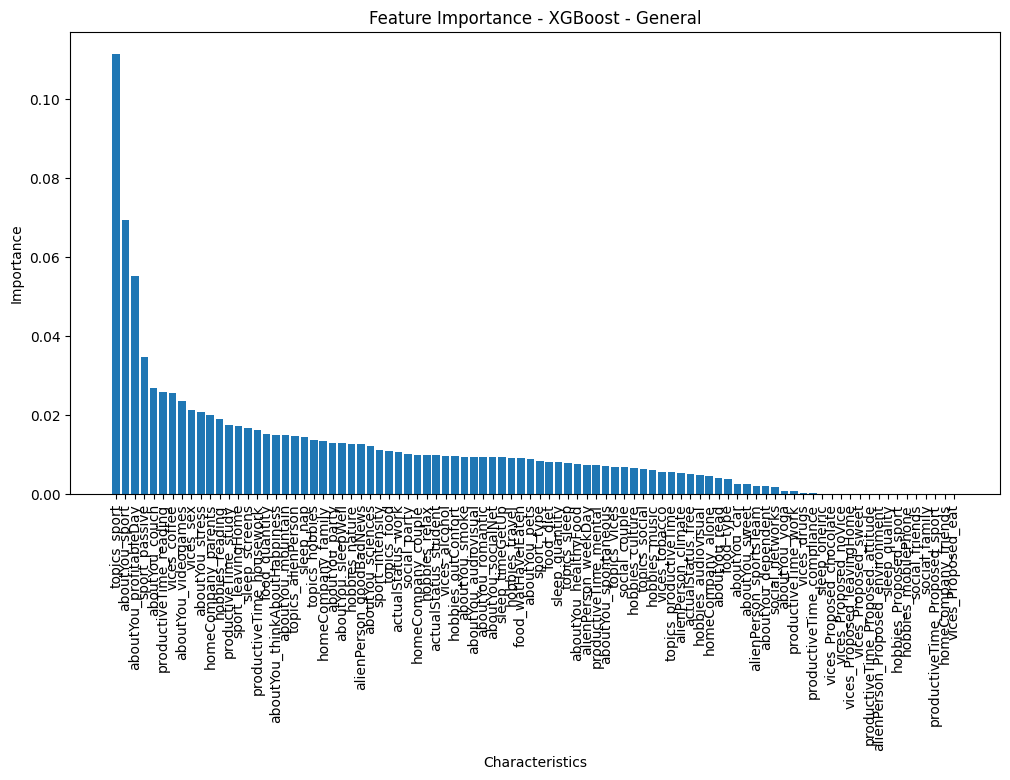

In [269]:
# Sort the DataFrame by descending importance
encuesta2_XGB_sorted = encuesta2_XGB.sort_values('importance', ascending=False)

# Plot the feature importance bar chart
plt.figure(figsize=(12, 6))
plt.bar(encuesta2_XGB_sorted['characteristics'], encuesta2_XGB_sorted['importance'])
plt.xticks(rotation=90)
plt.xlabel('Characteristics')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBoost - General')
plt.show()

In [270]:
# Select the most important features
encuesta2_XGB_top = encuesta2_XGB_sorted.head(3)['characteristics'].tolist()

# Get the values of the most important characteristics for each group
encuesta2_XGB_groupValues = encuesta2_[['cluster_labels'] + encuesta2_XGB_top]

# Group by cluster and get feature values for each group
encuesta2_XGB_groupedValues = encuesta2_XGB_groupValues.groupby('cluster_labels').mean().reset_index()
encuesta2_XGB_groupedValues

cluster_labels  topics_sport  aboutYou_sport  aboutYou_profitableDay
0               0      0.820513        0.820513                0.820513
1               1      0.060000        0.040000                0.180000
2               2      0.953125        0.859375                0.234375

## 6.8. Ensamble

In [271]:
# List of datasets and accuracy of each model
datasets = [encuesta2_RF, encuesta2_GB, encuesta2_SVM, encuesta2_XGB]
accuracies = [accuracy_mean_encuesta2_RF, accuracy_mean_encuesta2_GB, accuracy_mean_encuesta2_SVM, accuracy_mean_encuesta2_XGB]

# Calculate the weights according to the model accuracy
weights = [accuracy / sum(accuracies) for accuracy in accuracies]

# Assemble the weighted feature importances
feature_importances_weighted = np.zeros(len(datasets[0]))  # Initialize with zeros the size of the characteristics
for weight, dataset in zip(weights, datasets):
    feature_importances_weighted += weight * dataset['importance']

# Build the final dataset with the features and their assembled importance
encuesta2_importance = pd.DataFrame({'characteristics': datasets[0]['characteristics'], 'importance': feature_importances_weighted})

# Ensure that the importance sum is equal to 1
encuesta2_importance['importance'] = encuesta2_importance['importance'] / encuesta2_importance['importance'].sum()
encuesta2_importance.head()

characteristics  importance
0     actualStatus_free    0.003971
1  actualStatus_student    0.009687
2     actualStatus_work    0.007545
3   homeCompany_friends    0.001497
4     homeCompany_alone    0.003643

In [272]:
# Find a weight factor by weighting the accuracy of each model
weight_factor = sum([accuracy / sum(accuracies) * accuracy for accuracy in accuracies])
weight_factor

0.8878254668001497

In [273]:
# Create the subtopics_importance_ dataset with the model importances
encuesta2_importance_ = encuesta2_importance.copy()
encuesta2_importance_.rename(columns={'importance': f'importance_ensamble{weight_factor:.4f}'}, inplace=True)

model_names=['RF', 'GB', 'SVM', 'XGB', 'ensamble']
for i, dataset in enumerate(datasets):
    model_name = f'_{model_names[i]}_{accuracies[i]:.4f}'
    encuesta2_importance_[f'importance{model_name}'] = dataset['importance']

encuesta2_importance_.sort_values(by=f'importance_ensamble{weight_factor:.4f}', ascending=False, inplace=True)
encuesta2_importance_round_=round(encuesta2_importance_, 4)
encuesta2_importance_round_.to_excel('encuesta2_importance_.xlsx')
encuesta2_importance_round_.head()

characteristics  importance_ensamble0.8878  importance_RF_0.8941   
30            topics_sport                     0.0960                0.1125  \
16          aboutYou_sport                     0.0770                0.1308   
14  aboutYou_profitableDay                     0.0560                0.0732   
63           sport_passive                     0.0525                0.0899   
11          aboutYou_couch                     0.0262                0.0316   

    importance_GB_0.9008  importance_SVM_0.8859  importance_XGB_0.8700  
30                0.1036                 0.0565                 0.1113  
16                0.0632                 0.0442                 0.0693  
14                0.0512                 0.0441                 0.0553  
63                0.0626                 0.0219                 0.0347  
11                0.0356                 0.0104                 0.0269

In [274]:
# Transform the p-values into importance by subtracting them from 1
encuesta2_analysis['1_minus_p_value_mean'] = 1 - encuesta2_analysis['p_value_mean']

# Calculate the importance of features based on normalized transformed p-values
encuesta2_analysis['importance_p_value'] = encuesta2_analysis['1_minus_p_value_mean'] / encuesta2_analysis['1_minus_p_value_mean'].sum()

# Ensure that the sum of importance_p_value is equal to 1
print(encuesta2_analysis['importance_p_value'].sum())

# Combine the information of subtopics_final and subtopics_analysis using the weight factor
encuesta2_importance['importance_p_value'] = encuesta2_analysis['importance_p_value']
encuesta2_importance['combined_importance'] = encuesta2_importance['importance_p_value'] * (1 - weight_factor) + encuesta2_importance['importance'] * weight_factor
encuesta2_importance['p_value_mean'] = encuesta2_analysis['p_value_mean']

#sort by combined_importance
encuesta2_importance = encuesta2_importance.sort_values('combined_importance', ascending=False)
encuesta2_importance.to_excel('encuesta2_ensamble.xlsx')
encuesta2_importance.head()

1.0


characteristics  importance  importance_p_value   
30            topics_sport    0.095985            0.027939  \
16          aboutYou_sport    0.076963            0.027939   
14  aboutYou_profitableDay    0.055971            0.027939   
63           sport_passive    0.052492            0.027939   
11          aboutYou_couch    0.026164            0.027939   

    combined_importance  p_value_mean  
30             0.088352  2.198099e-21  
16             0.071464  2.460278e-18  
14             0.052827  4.237688e-09  
63             0.049738  1.042039e-15  
11             0.026363  4.102037e-06

# 8.Conclusions

In [275]:
pProfile_importance.sort_values(by='p_value_mean', inplace=True)
pProfile_importance.to_excel('pProfile_p_value.xlsx')
pProfile_importance.head()

characteristics  importance  importance_p_value  combined_importance   
7    homeCompany_family    0.233617            0.060385             0.226008  \
6    homeCompany_couple    0.108829            0.060385             0.106701   
1  actualStatus_student    0.088978            0.060385             0.087722   
5   homeCompany_parents    0.080759            0.060385             0.079864   
2     actualStatus_work    0.056124            0.060385             0.056311   

   p_value_mean  
7  4.082900e-30  
6  1.034702e-18  
1  4.741793e-14  
5  1.368774e-10  
2  3.745098e-10

In [276]:
topics_importance.sort_values(by='p_value_mean', inplace=True)
topics_importance.to_excel('topics_p_value.xlsx')
topics_importance.head()

characteristics  importance  importance_p_value  combined_importance   
7      topics_hobbies    0.393965            0.167561             0.392373  \
5  topics_alienPerson    0.381436            0.167561             0.379932   
0        topics_sport    0.049902            0.167560             0.050730   
2         topics_food    0.051716            0.167556             0.052530   
4       topics_social    0.026731            0.122591             0.027405   

   p_value_mean  
7  4.781478e-33  
5  6.569675e-22  
0  3.180335e-07  
2  2.819286e-05  
4  2.683788e-01

In [277]:
subtopics_importance.sort_values(by='p_value_mean', inplace=True)
subtopics_importance.to_excel('subtopics_p_value.xlsx')
subtopics_importance.head()

characteristics  importance  importance_p_value  combined_importance   
23  sport_leavingHome    0.100589            0.038343             0.094052  \
26         sport_type    0.053257            0.038343             0.051691   
25      sport_passive    0.057306            0.038343             0.055315   
24    sport_intensity    0.052381            0.038343             0.050907   
12       social_party    0.035398            0.038343             0.035707   

    p_value_mean  
23  1.840601e-13  
26  6.956308e-09  
25  7.982796e-09  
24  1.504224e-06  
12  6.489892e-06

In [278]:
encuesta2_importance.sort_values(by='p_value_mean', inplace=True)
encuesta2_importance.to_excel('encuesta2_p_value.xlsx')
encuesta2_importance.head()

characteristics  importance  importance_p_value   
30            topics_sport    0.095985            0.027939  \
16          aboutYou_sport    0.076963            0.027939   
63           sport_passive    0.052492            0.027939   
14  aboutYou_profitableDay    0.055971            0.027939   
64              sport_type    0.024028            0.027939   

    combined_importance  p_value_mean  
30             0.088352  2.198099e-21  
16             0.071464  2.460278e-18  
63             0.049738  1.042039e-15  
14             0.052827  4.237688e-09  
64             0.024467  4.431650e-08

In [279]:
pProfile_importance.sort_index(inplace=True)
topics_importance.sort_index(inplace=True)
subtopics_importance.sort_index(inplace=True)
encuesta2_importance.sort_index(inplace=True)

In [280]:
# Concatenate the DataFrames of the three levels of importance
encuesta_concat = pd.concat([pProfile_importance, topics_importance, subtopics_importance], axis=0)
encuesta_concat.reset_index(inplace=True)
encuesta_concat.drop(columns=['index'], inplace=True)

# Ensure encuesta_concat and encuesta2_importance have the same characteristics
print(encuesta_concat['characteristics'].equals(encuesta2_importance['characteristics']))

#join the two DataFrames
encuestin = pd.merge(encuesta_concat, encuesta2_importance, on='characteristics', how='outer')
encuestin.sort_values(by=['p_value_mean_y'], inplace=True)
#encuestin.to_excel('encuestin.xlsx')
encuestin

True


characteristics  importance_x  importance_p_value_x   
30                      topics_sport      0.049902              0.167560  \
16                    aboutYou_sport      0.016495              0.017339   
63                     sport_passive      0.057306              0.038343   
14            aboutYou_profitableDay      0.015054              0.027716   
64                        sport_type      0.053257              0.038343   
..                               ...           ...                   ...   
47                     social_couple      0.015361              0.009789   
0                  actualStatus_free      0.016183              0.003086   
26                     aboutYou_read      0.020528              0.054324   
23                    aboutYou_sweet      0.009432              0.001407   
45  productiveTime_Proposed_attitude      0.003554              0.000091   

    combined_importance_x  p_value_mean_x  importance_y  importance_p_value_y   
30               0.050730    3.180335e-07      0.095985              0.027939  \
16               0.016532    7.128661e-01      0.076963              0.027939   
63               0.055315    7.982796e-09      0.052492              0.027939   
14               0.015611    5.410071e-01      0.055971              0.027939   
64               0.051691    6.956308e-09      0.024028              0.027939   
..                    ...             ...           ...                   ...   
47               0.014776    7.447105e-01      0.005565              0.002098   
0                0.015608    9.488966e-01      0.003971              0.002098   
26               0.022013    1.003690e-01      0.005132              0.001521   
23               0.009079    9.767062e-01      0.005148              0.001044   
45               0.003191    9.976233e-01      0.003391              0.000261   

    combined_importance_y  p_value_mean_y  
30               0.088352    2.198099e-21  
16               0.071464    2.460278e-18  
63               0.049738    1.042039e-15  
14               0.052827    4.237688e-09  
64               0.024467    4.431650e-08  
..                    ...             ...  
47               0.005176    9.249170e-01  
0                0.003761    9.249170e-01  
26               0.004727    9.455531e-01  
23               0.004688    9.626360e-01  
45               0.003040    9.906440e-01  

[90 rows x 9 columns]

In [281]:
# Concatenate the DataFrames of the three levels of importance
encuesta_concat = pd.concat([pProfile_importance, topics_importance, subtopics_importance], axis=0)
encuesta_concat.reset_index(inplace=True)
encuesta_concat.drop(columns=['index'], inplace=True)

# Ensure encuesta_concat and encuesta2_importance have the same characteristics
print(encuesta_concat['characteristics'].equals(encuesta2_importance['characteristics']))

# Reescalate the importance of each level of importance to sum up to 1 
encuesta_concat['combined_importance'] = encuesta_concat['combined_importance'] / encuesta_concat['combined_importance'].sum()

# Ensure that the sum of combined_importance is equal to 1
print(encuesta_concat['combined_importance'].sum())
encuesta_concat[30:38]

True
1.0000000000000002


characteristics  importance  importance_p_value   
30           topics_sport    0.049902            0.167560  \
31           topics_sleep    0.030297            0.051558   
32            topics_food    0.051716            0.167556   
33           topics_vices    0.030824            0.036533   
34          topics_social    0.026731            0.122591   
35     topics_alienPerson    0.381436            0.167561   
36  topics_productiveTime    0.035129            0.119081   
37         topics_hobbies    0.393965            0.167561   

    combined_importance  p_value_mean  
30             0.016910  3.180335e-07  
31             0.010149  6.922995e-01  
32             0.017510  2.819286e-05  
33             0.010288  7.819722e-01  
34             0.009135  2.683788e-01  
35             0.126644  6.569675e-22  
36             0.011906  2.893277e-01  
37             0.130791  4.781478e-33

In [282]:
# Ensamble the importance of the two approaches
ensamble_importance = pd.DataFrame({'characteristics': encuesta_concat['characteristics'], 'importance_encuesta_concat': encuesta_concat['combined_importance']})
ensamble_importance['importance_encuesta2'] = encuesta2_importance['combined_importance']

# The importance of the ensamble is the mean of the two approaches
ensamble_importance['importance'] = (ensamble_importance['importance_encuesta_concat'] + ensamble_importance['importance_encuesta2']) / 2
ensamble_importance.sort_values('importance', ascending=False, inplace=True)
ensamble_importance[0:20]

characteristics  importance_encuesta_concat  importance_encuesta2   
35      topics_alienPerson                    0.126644              0.019843  \
37          topics_hobbies                    0.130791              0.009247   
30            topics_sport                    0.016910              0.088352   
7       homeCompany_family                    0.075336              0.011778   
16          aboutYou_sport                    0.005511              0.071464   
63           sport_passive                    0.018438              0.049738   
14  aboutYou_profitableDay                    0.005204              0.052827   
6       homeCompany_couple                    0.035567              0.007816   
5      homeCompany_parents                    0.026621              0.015489   
61       sport_leavingHome                    0.031351              0.010638   
64              sport_type                    0.017230              0.024467   
1     actualStatus_student                    0.029241              0.010147   
83            vices_coffee                    0.011011              0.025315   
82               vices_sex                    0.010481              0.024729   
62         sport_intensity                    0.016969              0.017484   
11          aboutYou_couch                    0.006818              0.026363   
20         aboutYou_stress                    0.007077              0.021169   
32             topics_food                    0.017510              0.009567   
57      hobbies_outConfort                    0.012860              0.013435   
2        actualStatus_work                    0.018770              0.007463   

    importance  
35    0.073244  
37    0.070019  
30    0.052631  
7     0.043557  
16    0.038487  
63    0.034088  
14    0.029015  
6     0.021691  
5     0.021055  
61    0.020994  
64    0.020849  
1     0.019694  
83    0.018163  
82    0.017605  
62    0.017226  
11    0.016591  
20    0.014123  
32    0.013539  
57    0.013147  
2     0.013117

In [283]:
ensamble_importance.sort_values('importance_encuesta_concat', ascending=False)[0:20]

characteristics  importance_encuesta_concat  importance_encuesta2   
37         topics_hobbies                    0.130791              0.009247  \
35     topics_alienPerson                    0.126644              0.019843   
7      homeCompany_family                    0.075336              0.011778   
6      homeCompany_couple                    0.035567              0.007816   
61      sport_leavingHome                    0.031351              0.010638   
1    actualStatus_student                    0.029241              0.010147   
5     homeCompany_parents                    0.026621              0.015489   
2       actualStatus_work                    0.018770              0.007463   
63          sport_passive                    0.018438              0.049738   
32            topics_food                    0.017510              0.009567   
64             sport_type                    0.017230              0.024467   
62        sport_intensity                    0.016969              0.017484   
30           topics_sport                    0.016910              0.088352   
4       homeCompany_alone                    0.014884              0.003753   
27     aboutYou_dependent                    0.013453              0.004151   
21      aboutYou_romantic                    0.013014              0.009534   
57     hobbies_outConfort                    0.012860              0.013435   
72     food_watHaveIEaten                    0.012574              0.007591   
36  topics_productiveTime                    0.011906              0.005667   
50           social_party                    0.011902              0.008848   

    importance  
37    0.070019  
35    0.073244  
7     0.043557  
6     0.021691  
61    0.020994  
1     0.019694  
5     0.021055  
2     0.013117  
63    0.034088  
32    0.013539  
64    0.020849  
62    0.017226  
30    0.052631  
4     0.009319  
27    0.008802  
21    0.011274  
57    0.013147  
72    0.010083  
36    0.008787  
50    0.010375

In [284]:
ensamble_importance.sort_values('importance_encuesta2', ascending=False)[0:20]

characteristics  importance_encuesta_concat   
30                  topics_sport                    0.016910  \
16                aboutYou_sport                    0.005511   
14        aboutYou_profitableDay                    0.005204   
63                 sport_passive                    0.018438   
11                aboutYou_couch                    0.006818   
83                  vices_coffee                    0.011011   
82                     vices_sex                    0.010481   
64                    sport_type                    0.017230   
20               aboutYou_stress                    0.007077   
35            topics_alienPerson                    0.126644   
10                aboutYou_party                    0.002586   
62               sport_intensity                    0.016969   
13  aboutYou_thinkAboutHappiness                    0.004121   
52               hobbies_reading                    0.005118   
5            homeCompany_parents                    0.026621   
25           aboutYou_videogames                    0.007935   
68                     sleep_nap                    0.007400   
55                hobbies_nature                    0.003930   
57            hobbies_outConfort                    0.012860   
67               sleep_timeGetUp                    0.009522   

    importance_encuesta2  importance  
30              0.088352    0.052631  
16              0.071464    0.038487  
14              0.052827    0.029015  
63              0.049738    0.034088  
11              0.026363    0.016591  
83              0.025315    0.018163  
82              0.024729    0.017605  
64              0.024467    0.020849  
20              0.021169    0.014123  
35              0.019843    0.073244  
10              0.017970    0.010278  
62              0.017484    0.017226  
13              0.017075    0.010598  
52              0.016755    0.010936  
5               0.015489    0.021055  
25              0.014979    0.011457  
68              0.014143    0.010772  
55              0.013993    0.008962  
57              0.013435    0.013147  
67              0.012954    0.011238